In [47]:
import librosa
audio_file_path='G:\\enivornment sound-urban\\UrbanSound8K\\audio\\fold8\\4918-3-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [48]:
print(librosa_audio_data)

[0.00179528 0.00368181 0.00428939 ... 0.0030764  0.00341154 0.        ]


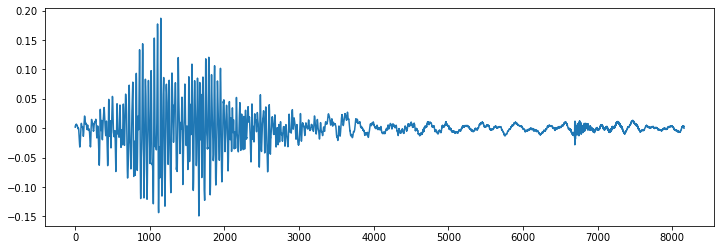

In [49]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [50]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [51]:
wave_audio

array([[ 80,  90],
       [ 85,  92],
       [105, 112],
       ...,
       [ 96,  96],
       [108, 108],
       [104, 112]], dtype=int16)

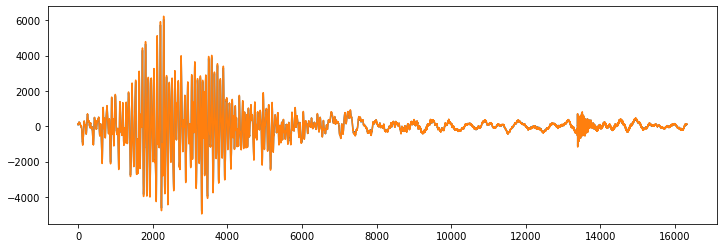

In [52]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [53]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 16)


In [54]:
mfccs


array([[-3.67407410e+02, -3.04078583e+02, -2.68751526e+02,
        -2.75998474e+02, -2.97586945e+02, -3.26940643e+02,
        -3.76806244e+02, -4.17175598e+02, -4.34154968e+02,
        -4.56230347e+02, -4.82941925e+02, -4.91816895e+02,
        -4.63262970e+02, -4.42392334e+02, -4.63161743e+02,
        -5.01264374e+02],
       [ 1.92441223e+02,  2.02539825e+02,  1.99147522e+02,
         2.00311859e+02,  2.00330902e+02,  1.95411774e+02,
         1.86974228e+02,  1.67332214e+02,  1.45237152e+02,
         1.22923370e+02,  1.10134972e+02,  1.08821754e+02,
         6.89973221e+01,  3.91817474e+01,  4.77690430e+01,
         8.70626526e+01],
       [ 3.79306335e+01,  2.26098976e+01,  2.67996049e+00,
        -6.40551519e+00,  3.70246482e+00,  2.00042000e+01,
         3.35443573e+01,  4.33535347e+01,  4.20419312e+01,
         3.98787651e+01,  4.38481064e+01,  3.70873451e+01,
         6.05332642e+01,  7.67000809e+01,  7.24783478e+01,
         5.14949112e+01],
       [-1.87710304e+01, -1.68479271e

In [1]:
import pandas as pd

metadata=pd.read_csv('G:\\enivornment sound-urban\\UrbanSound8K\\metadata\\UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [2]:
metadata['class'].value_counts()

air_conditioner     1000
dog_bark            1000
children_playing    1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [3]:
metadata['class']

0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: class, Length: 8732, dtype: object

In [4]:
metadata1=metadata.iloc[0:4]

In [5]:
audio_dataset_path='G:\\enivornment sound-urban\\UrbanSound8K\\audio\\'

In [6]:
import librosa

In [7]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [8]:
metadata.iterrows()

<generator object DataFrame.iterrows at 0x00000288F346DD58>

In [9]:
metadata1=metadata.iloc[0:300]

In [10]:
metadata1=metadata.iloc[0:874] # fold1

In [11]:
metadata1=metadata.iloc[0:5000] # fold1

In [12]:
import os
from tqdm import tqdm
import numpy as np
extracted_features=[]
for index_num,row in tqdm(metadata1.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'\\',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    print(final_class_labels)
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

dog_bark


1it [00:07,  7.40s/it]

children_playing


2it [00:07,  3.18s/it]

children_playing


4it [00:08,  1.20s/it]

children_playing
children_playing


6it [00:08,  1.44it/s]

children_playing
children_playing


7it [00:09,  1.76it/s]

children_playing


8it [00:09,  1.79it/s]

children_playing


10it [00:10,  2.65it/s]

car_horn


11it [00:10,  3.37it/s]

car_horn
car_horn
car_horn


13it [00:10,  5.21it/s]

car_horn
dog_bark


15it [00:10,  5.26it/s]

dog_bark


16it [00:11,  4.97it/s]

dog_bark


17it [00:11,  3.62it/s]

dog_bark


18it [00:11,  3.81it/s]

dog_bark


20it [00:12,  4.23it/s]

dog_bark
dog_bark


22it [00:12,  4.90it/s]

dog_bark
air_conditioner


24it [00:12,  5.08it/s]

air_conditioner
air_conditioner


25it [00:13,  4.08it/s]

air_conditioner


26it [00:13,  3.74it/s]

air_conditioner


27it [00:13,  3.78it/s]

air_conditioner


28it [00:14,  3.38it/s]

air_conditioner


29it [00:14,  2.97it/s]

air_conditioner


30it [00:15,  2.67it/s]

air_conditioner


31it [00:15,  2.93it/s]

air_conditioner


33it [00:15,  3.38it/s]

air_conditioner
air_conditioner


34it [00:16,  3.48it/s]

air_conditioner


36it [00:16,  4.07it/s]

air_conditioner
air_conditioner


38it [00:16,  5.04it/s]

air_conditioner
air_conditioner


40it [00:17,  5.25it/s]

air_conditioner
air_conditioner


41it [00:17,  4.85it/s]

air_conditioner


42it [00:17,  4.44it/s]

air_conditioner


44it [00:18,  4.86it/s]

air_conditioner
air_conditioner


46it [00:18,  5.84it/s]

air_conditioner
air_conditioner


48it [00:18,  5.11it/s]

air_conditioner
air_conditioner


50it [00:19,  4.87it/s]

air_conditioner
air_conditioner


51it [00:19,  4.69it/s]

air_conditioner


53it [00:20,  4.35it/s]

air_conditioner
dog_bark


54it [00:20,  2.54it/s]

dog_bark


55it [00:21,  2.48it/s]

dog_bark


56it [00:21,  2.75it/s]

children_playing


57it [00:22,  2.48it/s]

children_playing


58it [00:22,  2.76it/s]

children_playing


60it [00:22,  3.73it/s]

children_playing
children_playing


61it [00:22,  4.30it/s]

children_playing


63it [00:23,  5.04it/s]

children_playing
children_playing


64it [00:23,  5.51it/s]

dog_bark


66it [00:23,  5.87it/s]

dog_bark
dog_bark


67it [00:23,  6.31it/s]

air_conditioner


68it [00:24,  4.28it/s]

air_conditioner


70it [00:24,  4.49it/s]

air_conditioner
air_conditioner


72it [00:25,  5.08it/s]

air_conditioner
air_conditioner


73it [00:25,  4.97it/s]

air_conditioner


75it [00:25,  4.59it/s]

air_conditioner


76it [00:25,  5.28it/s]

air_conditioner
air_conditioner


78it [00:26,  5.68it/s]

air_conditioner


79it [00:26,  5.98it/s]

air_conditioner
air_conditioner


81it [00:26,  5.58it/s]

air_conditioner
air_conditioner


82it [00:26,  5.67it/s]

air_conditioner


84it [00:27,  5.02it/s]

air_conditioner


85it [00:27,  5.65it/s]

air_conditioner
air_conditioner


87it [00:27,  6.24it/s]

air_conditioner
air_conditioner


89it [00:28,  6.45it/s]

air_conditioner
air_conditioner


91it [00:28,  5.82it/s]

air_conditioner
air_conditioner


93it [00:28,  5.91it/s]

air_conditioner
air_conditioner


94it [00:28,  5.81it/s]

street_music


96it [00:29,  6.04it/s]

street_music
street_music


98it [00:29,  5.83it/s]

street_music
street_music


100it [00:29,  6.55it/s]

street_music
dog_bark


104it [00:30, 10.43it/s]

dog_bark
dog_bark
dog_bark
dog_bark


106it [00:30,  9.11it/s]

dog_bark
gun_shot
dog_bark


109it [00:30,  8.34it/s]

dog_bark
dog_bark


111it [00:31,  7.75it/s]

dog_bark
dog_bark


113it [00:31,  7.58it/s]

dog_bark
dog_bark


114it [00:31,  7.89it/s]

siren


116it [00:32,  5.38it/s]

siren
siren


117it [00:32,  4.93it/s]

siren


119it [00:32,  5.40it/s]

siren
siren


121it [00:32,  5.97it/s]

siren
siren


123it [00:33,  6.46it/s]

engine_idling
engine_idling


125it [00:33,  6.73it/s]

engine_idling
engine_idling


127it [00:33,  7.35it/s]

engine_idling
engine_idling


129it [00:34,  7.23it/s]

engine_idling
engine_idling


131it [00:34,  7.28it/s]

engine_idling
engine_idling


133it [00:34,  7.61it/s]

engine_idling
engine_idling


135it [00:34,  7.38it/s]

engine_idling
engine_idling


136it [00:34,  7.37it/s]

engine_idling


138it [00:35,  6.60it/s]

engine_idling
engine_idling


140it [00:35,  6.17it/s]

engine_idling


141it [00:35,  6.32it/s]

engine_idling
engine_idling


143it [00:36,  7.26it/s]

engine_idling
engine_idling


145it [00:36,  7.75it/s]

engine_idling
engine_idling


147it [00:36,  7.43it/s]

engine_idling
engine_idling


149it [00:36,  7.77it/s]

engine_idling
engine_idling


151it [00:37,  8.14it/s]

engine_idling
engine_idling


153it [00:37,  5.89it/s]

engine_idling
engine_idling


155it [00:37,  6.40it/s]

engine_idling
siren


157it [00:38,  6.92it/s]

siren
siren


159it [00:38,  7.11it/s]

siren
siren


161it [00:38,  6.94it/s]

siren
siren


163it [00:38,  7.16it/s]

siren
siren


165it [00:39,  6.96it/s]

siren
siren


166it [00:39,  6.69it/s]

siren


168it [00:39,  6.12it/s]

siren
siren


170it [00:40,  6.37it/s]

siren
siren


172it [00:40,  6.48it/s]

jackhammer
jackhammer


174it [00:40,  6.20it/s]

jackhammer
jackhammer


176it [00:41,  5.65it/s]

jackhammer
jackhammer


178it [00:41,  5.47it/s]

jackhammer
jackhammer


180it [00:41,  5.81it/s]

jackhammer
jackhammer


183it [00:42,  7.42it/s]

jackhammer
jackhammer


184it [00:42,  7.02it/s]

jackhammer
jackhammer


185it [00:42,  5.97it/s]

jackhammer


186it [00:42,  5.36it/s]

jackhammer


188it [00:43,  4.98it/s]

jackhammer
jackhammer


190it [00:43,  5.54it/s]

jackhammer
jackhammer


192it [00:43,  6.09it/s]

jackhammer
jackhammer


193it [00:44,  5.72it/s]

dog_bark


194it [00:44,  4.70it/s]

dog_bark


195it [00:44,  4.57it/s]

dog_bark
drilling


198it [00:45,  5.38it/s]

drilling
drilling


200it [00:45,  5.71it/s]

drilling
drilling


201it [00:45,  6.34it/s]

drilling
drilling


204it [00:45,  7.20it/s]

drilling
drilling


205it [00:46,  7.42it/s]

drilling


207it [00:46,  6.78it/s]

drilling
drilling


209it [00:46,  6.86it/s]

drilling
drilling


211it [00:46,  7.58it/s]

drilling
drilling


213it [00:47,  7.37it/s]

drilling
drilling


215it [00:47,  7.97it/s]

drilling
drilling
drilling

217it [00:47,  8.42it/s]


engine_idling


219it [00:48,  6.64it/s]

engine_idling
engine_idling


220it [00:48,  6.78it/s]

engine_idling


221it [00:48,  5.90it/s]

engine_idling


222it [00:48,  4.24it/s]

engine_idling


224it [00:49,  4.50it/s]

engine_idling


225it [00:49,  4.72it/s]

engine_idling


226it [00:49,  4.98it/s]

engine_idling
engine_idling


228it [00:49,  5.59it/s]

engine_idling
engine_idling


230it [00:50,  6.03it/s]

engine_idling
engine_idling


232it [00:50,  5.76it/s]

engine_idling
engine_idling


234it [00:50,  5.98it/s]

engine_idling
engine_idling


236it [00:51,  6.61it/s]

engine_idling
engine_idling


238it [00:51,  6.34it/s]

engine_idling
engine_idling


240it [00:51,  6.56it/s]

engine_idling
engine_idling


242it [00:52,  6.34it/s]

engine_idling
engine_idling


243it [00:52,  6.07it/s]

engine_idling


245it [00:52,  5.55it/s]

engine_idling
engine_idling


246it [00:52,  4.99it/s]

engine_idling


248it [00:53,  3.79it/s]

engine_idling
engine_idling


249it [00:53,  4.25it/s]

engine_idling


250it [00:54,  4.31it/s]

engine_idling


251it [00:54,  4.43it/s]

engine_idling


253it [00:54,  4.66it/s]

engine_idling


254it [00:54,  5.09it/s]

engine_idling
engine_idling


256it [00:55,  5.77it/s]

engine_idling
engine_idling


258it [00:55,  5.53it/s]

drilling
drilling


260it [00:55,  5.94it/s]

engine_idling


261it [00:55,  6.52it/s]

engine_idling
engine_idling


263it [00:56,  6.35it/s]

children_playing
children_playing


265it [00:56,  7.98it/s]

children_playing
children_playing


266it [00:56,  8.08it/s]

children_playing


268it [00:56,  7.12it/s]

children_playing
children_playing


270it [00:57,  7.82it/s]

children_playing
children_playing


272it [00:57,  6.92it/s]

children_playing
children_playing


274it [00:57,  6.97it/s]

children_playing
children_playing


276it [00:58,  7.04it/s]

children_playing
children_playing


277it [00:58,  6.15it/s]

children_playing


278it [00:58,  5.63it/s]

drilling


279it [00:58,  4.87it/s]

drilling


280it [00:58,  4.45it/s]

drilling


281it [00:59,  4.13it/s]

drilling


282it [00:59,  4.00it/s]

drilling


283it [00:59,  3.86it/s]

drilling


284it [01:00,  3.90it/s]

drilling


285it [01:00,  3.86it/s]

drilling


286it [01:00,  3.80it/s]

drilling


287it [01:00,  3.82it/s]

drilling


288it [01:01,  3.68it/s]

drilling


289it [01:01,  3.36it/s]

drilling


290it [01:01,  3.40it/s]

drilling


291it [01:02,  3.53it/s]

drilling


292it [01:02,  3.16it/s]

drilling


293it [01:02,  3.33it/s]

drilling


294it [01:03,  3.30it/s]

drilling


295it [01:03,  3.39it/s]

drilling


296it [01:03,  3.47it/s]

drilling


297it [01:03,  3.45it/s]

drilling


298it [01:04,  3.61it/s]

drilling


300it [01:04,  3.73it/s]

drilling


301it [01:04,  4.13it/s]

drilling
drilling


303it [01:05,  4.80it/s]

drilling


304it [01:05,  5.15it/s]

drilling
drilling


306it [01:05,  5.71it/s]

drilling
drilling


308it [01:05,  5.90it/s]

drilling
jackhammer


310it [01:06,  6.53it/s]

jackhammer
jackhammer


312it [01:06,  6.71it/s]

jackhammer
jackhammer


314it [01:06,  6.91it/s]

jackhammer
jackhammer


316it [01:07,  7.26it/s]

jackhammer
jackhammer


318it [01:07,  7.29it/s]

jackhammer
jackhammer


319it [01:07,  7.56it/s]

jackhammer


321it [01:07,  6.54it/s]

jackhammer
jackhammer


323it [01:08,  6.53it/s]

jackhammer
jackhammer


325it [01:08,  7.03it/s]

jackhammer
jackhammer


327it [01:08,  6.91it/s]

jackhammer
jackhammer


329it [01:09,  6.86it/s]

jackhammer
jackhammer


331it [01:09,  7.53it/s]

jackhammer
jackhammer


333it [01:09,  7.64it/s]

jackhammer
jackhammer


335it [01:09,  7.42it/s]

jackhammer
jackhammer


337it [01:10,  8.00it/s]

jackhammer
jackhammer


339it [01:10,  8.03it/s]

jackhammer
jackhammer


341it [01:10,  7.63it/s]

jackhammer
jackhammer


343it [01:10,  7.19it/s]

jackhammer
jackhammer


345it [01:11,  7.60it/s]

jackhammer
jackhammer


347it [01:11,  7.68it/s]

jackhammer
jackhammer


349it [01:11,  7.74it/s]

jackhammer
jackhammer


351it [01:11,  7.63it/s]

jackhammer
jackhammer


353it [01:12,  7.95it/s]

jackhammer
jackhammer


355it [01:12,  8.17it/s]

jackhammer
jackhammer


357it [01:12,  7.67it/s]

jackhammer
jackhammer


359it [01:12,  7.41it/s]

jackhammer
jackhammer


361it [01:13,  7.88it/s]

jackhammer
jackhammer


363it [01:13,  6.36it/s]

jackhammer
jackhammer


364it [01:13,  6.30it/s]

jackhammer


366it [01:14,  5.32it/s]

jackhammer


367it [01:14,  5.25it/s]

jackhammer


368it [01:14,  5.37it/s]

jackhammer
jackhammer


370it [01:14,  6.24it/s]

jackhammer
jackhammer


371it [01:15,  5.42it/s]

jackhammer


373it [01:15,  5.00it/s]

jackhammer
jackhammer


374it [01:15,  4.79it/s]

jackhammer


376it [01:16,  4.80it/s]

jackhammer
jackhammer


378it [01:16,  5.81it/s]

jackhammer
jackhammer


380it [01:16,  6.48it/s]

jackhammer
jackhammer


382it [01:17,  6.55it/s]

jackhammer
jackhammer


384it [01:17,  7.05it/s]

jackhammer
jackhammer


386it [01:17,  7.32it/s]

jackhammer
jackhammer


388it [01:17,  7.38it/s]

jackhammer
jackhammer


390it [01:18,  7.48it/s]

jackhammer
jackhammer


392it [01:18,  7.70it/s]

jackhammer
jackhammer


394it [01:18,  7.57it/s]

jackhammer
jackhammer


396it [01:18,  7.94it/s]

jackhammer
jackhammer


398it [01:19,  7.82it/s]

jackhammer
jackhammer


400it [01:19,  7.78it/s]

jackhammer
jackhammer


402it [01:19,  8.44it/s]

jackhammer
jackhammer


404it [01:19,  8.43it/s]

jackhammer
jackhammer


406it [01:20,  7.78it/s]

jackhammer
jackhammer


408it [01:20,  8.01it/s]

jackhammer
jackhammer


410it [01:20,  8.04it/s]

jackhammer
jackhammer


412it [01:20,  7.81it/s]

jackhammer
jackhammer


414it [01:21,  8.17it/s]

jackhammer
jackhammer


416it [01:21,  7.23it/s]

jackhammer
jackhammer


418it [01:21,  7.51it/s]

dog_bark
dog_bark


420it [01:21,  7.98it/s]

dog_bark
dog_bark


422it [01:22,  7.12it/s]

siren
siren


424it [01:22,  7.12it/s]

siren
siren


426it [01:22,  7.20it/s]

siren
siren


428it [01:23,  7.47it/s]

siren
siren


430it [01:23,  8.10it/s]

siren
siren


432it [01:23,  8.16it/s]

siren
siren


434it [01:23,  7.69it/s]

siren
siren


436it [01:24,  7.53it/s]

siren
siren


438it [01:24,  6.08it/s]

siren


439it [01:24,  6.66it/s]

siren
siren


441it [01:24,  6.21it/s]

dog_bark


442it [01:25,  6.75it/s]

dog_bark
dog_bark


444it [01:25,  6.30it/s]

children_playing


445it [01:25,  6.02it/s]

children_playing
children_playing


447it [01:25,  6.31it/s]

children_playing
children_playing


449it [01:26,  4.07it/s]

children_playing


450it [01:26,  4.74it/s]

children_playing
children_playing


452it [01:27,  5.31it/s]

street_music
street_music


454it [01:27,  5.97it/s]

street_music
street_music


456it [01:27,  6.14it/s]

street_music
street_music


458it [01:27,  6.46it/s]

engine_idling
engine_idling


460it [01:28,  6.60it/s]

engine_idling
engine_idling


462it [01:28,  7.22it/s]

engine_idling
engine_idling


464it [01:28,  7.12it/s]

engine_idling
engine_idling


466it [01:28,  7.56it/s]

engine_idling
engine_idling


468it [01:29,  7.55it/s]

engine_idling
engine_idling


470it [01:29,  6.62it/s]

engine_idling
engine_idling


472it [01:29,  7.38it/s]

engine_idling
engine_idling


473it [01:29,  7.18it/s]

engine_idling


475it [01:30,  4.88it/s]

engine_idling
engine_idling


477it [01:30,  6.08it/s]

engine_idling
engine_idling


479it [01:31,  6.51it/s]

engine_idling
engine_idling


481it [01:31,  7.00it/s]

engine_idling
engine_idling


483it [01:31,  7.22it/s]

engine_idling
engine_idling


485it [01:31,  7.35it/s]

engine_idling
engine_idling


487it [01:32,  6.85it/s]

engine_idling
engine_idling


489it [01:32,  7.35it/s]

engine_idling
engine_idling


491it [01:32,  7.38it/s]

engine_idling
engine_idling


493it [01:33,  7.30it/s]

siren
siren


495it [01:33,  7.66it/s]

siren
siren


498it [01:33,  9.92it/s]

gun_shot
car_horn
car_horn
dog_bark

500it [01:33, 12.22it/s]


engine_idling
engine_idling

502it [01:33,  9.94it/s]


engine_idling


504it [01:34,  8.28it/s]

engine_idling
engine_idling


506it [01:34,  7.68it/s]

engine_idling
engine_idling


508it [01:34,  8.06it/s]

engine_idling
siren


510it [01:35,  6.74it/s]

siren
siren


512it [01:35,  6.82it/s]

siren
siren


514it [01:35,  5.88it/s]

siren
siren


516it [01:36,  6.80it/s]

siren
siren


517it [01:36,  6.36it/s]

siren


519it [01:36,  4.55it/s]

siren


520it [01:37,  4.88it/s]

siren
siren


522it [01:37,  5.34it/s]

siren


523it [01:37,  5.48it/s]

siren
siren


525it [01:37,  6.01it/s]

siren
siren


527it [01:38,  6.47it/s]

siren
siren


529it [01:38,  6.40it/s]

siren
siren


531it [01:38,  7.27it/s]

siren
siren


533it [01:38,  7.40it/s]

siren
siren


535it [01:39,  7.20it/s]

siren
siren


537it [01:39,  6.65it/s]

street_music


538it [01:39,  7.07it/s]

street_music
street_music


540it [01:39,  7.19it/s]

street_music
street_music


542it [01:40,  7.09it/s]

street_music
drilling


544it [01:40,  7.23it/s]

drilling
drilling


546it [01:40,  7.00it/s]

drilling
drilling


547it [01:40,  6.01it/s]

drilling


549it [01:41,  4.46it/s]

drilling
drilling


551it [01:41,  5.50it/s]

drilling
drilling


553it [01:42,  6.83it/s]

street_music
street_music


555it [01:42,  6.38it/s]

street_music


556it [01:42,  6.65it/s]

street_music
street_music


558it [01:42,  6.70it/s]

street_music
street_music


561it [01:43,  9.13it/s]

dog_bark
dog_bark
dog_bark
dog_bark

563it [01:43, 10.82it/s]


street_music


565it [01:43,  8.79it/s]

street_music
street_music


567it [01:43,  8.13it/s]

street_music
street_music


569it [01:44,  7.45it/s]

street_music
children_playing


571it [01:44,  6.24it/s]

children_playing
children_playing


573it [01:44,  6.32it/s]

children_playing
children_playing


574it [01:44,  6.49it/s]

children_playing


576it [01:45,  5.88it/s]

children_playing
children_playing


578it [01:45,  5.73it/s]

street_music
street_music


580it [01:46,  6.36it/s]

street_music
street_music


582it [01:46,  6.90it/s]

street_music
street_music


584it [01:46,  7.14it/s]

dog_bark
dog_bark


586it [01:46,  6.57it/s]

dog_bark
dog_bark


588it [01:47,  6.87it/s]

street_music
street_music


590it [01:47,  6.94it/s]

street_music
street_music


591it [01:47,  7.41it/s]

street_music


593it [01:47,  6.09it/s]

children_playing
children_playing


595it [01:48,  6.53it/s]

children_playing
children_playing


597it [01:48,  6.44it/s]

children_playing


598it [01:48,  6.84it/s]

children_playing
children_playing


600it [01:48,  7.22it/s]

dog_bark
dog_bark


602it [01:49,  7.10it/s]

dog_bark
dog_bark
dog_bark


604it [01:49,  7.28it/s]

dog_bark


606it [01:49,  6.55it/s]

dog_bark
dog_bark
jackhammer

608it [01:50,  7.82it/s]


jackhammer


610it [01:50,  7.80it/s]

jackhammer
jackhammer


612it [01:50,  7.71it/s]

gun_shot
dog_bark


614it [01:50,  6.85it/s]

dog_bark
dog_bark


616it [01:51,  7.11it/s]

dog_bark
street_music


618it [01:51,  6.72it/s]

street_music
street_music


620it [01:51,  6.88it/s]

street_music
street_music


622it [01:52,  7.08it/s]

street_music
dog_bark


624it [01:52,  6.69it/s]

dog_bark
dog_bark


626it [01:52,  6.70it/s]

dog_bark
gun_shot


628it [01:52,  7.62it/s]

engine_idling
engine_idling


630it [01:53,  7.97it/s]

engine_idling
engine_idling


632it [01:53,  7.93it/s]

engine_idling
engine_idling


634it [01:53,  7.68it/s]

engine_idling
engine_idling


636it [01:53,  7.69it/s]

engine_idling
engine_idling


638it [01:54,  7.77it/s]

engine_idling
engine_idling


640it [01:54,  7.93it/s]

engine_idling
engine_idling


642it [01:54,  7.79it/s]

engine_idling
engine_idling


644it [01:54,  7.51it/s]

engine_idling
engine_idling


646it [01:55,  7.77it/s]

engine_idling
engine_idling


648it [01:55,  7.13it/s]

engine_idling
engine_idling


650it [01:55,  7.63it/s]

engine_idling
siren


652it [01:56,  7.42it/s]

siren
siren


654it [01:56,  7.20it/s]

siren
siren


656it [01:56,  7.21it/s]

siren
siren


658it [01:56,  7.15it/s]

siren
siren


660it [01:57,  7.25it/s]

siren
siren


661it [01:57,  7.61it/s]

siren


662it [01:57,  5.03it/s]

siren


664it [01:58,  5.10it/s]

siren
siren


666it [01:58,  5.65it/s]

siren
siren


668it [01:58,  6.52it/s]

siren
siren


670it [01:58,  6.43it/s]

siren
siren


672it [01:59,  6.31it/s]

siren


673it [01:59,  6.71it/s]

siren
engine_idling


675it [01:59,  6.77it/s]

engine_idling
engine_idling


677it [02:00,  6.24it/s]

dog_bark


678it [02:00,  6.63it/s]

dog_bark
dog_bark


680it [02:00,  7.26it/s]

dog_bark
siren
engine_idling


682it [02:00,  6.87it/s]

engine_idling


683it [02:00,  5.63it/s]

engine_idling


684it [02:01,  5.09it/s]

engine_idling


685it [02:01,  4.75it/s]

engine_idling


686it [02:01,  4.44it/s]

engine_idling


687it [02:01,  4.25it/s]

engine_idling


688it [02:02,  4.18it/s]

engine_idling


689it [02:02,  3.98it/s]

engine_idling


690it [02:02,  3.74it/s]

engine_idling


691it [02:03,  3.76it/s]

engine_idling


692it [02:03,  3.76it/s]

engine_idling


693it [02:03,  3.52it/s]

engine_idling


694it [02:03,  3.57it/s]

engine_idling


695it [02:04,  3.65it/s]

engine_idling


696it [02:04,  3.69it/s]

engine_idling


697it [02:04,  3.56it/s]

engine_idling


698it [02:05,  3.20it/s]

engine_idling


699it [02:05,  3.06it/s]

engine_idling


700it [02:05,  2.88it/s]

engine_idling


701it [02:06,  2.82it/s]

engine_idling


702it [02:06,  2.65it/s]

engine_idling


703it [02:08,  1.54it/s]

engine_idling


704it [02:09,  1.30it/s]

engine_idling


705it [02:10,  1.06it/s]

engine_idling


706it [02:11,  1.01it/s]

engine_idling


707it [02:11,  1.25it/s]

engine_idling


708it [02:12,  1.56it/s]

engine_idling


709it [02:12,  1.89it/s]

engine_idling


710it [02:12,  2.22it/s]

engine_idling


711it [02:12,  2.54it/s]

engine_idling


712it [02:13,  2.69it/s]

engine_idling


713it [02:13,  2.89it/s]

engine_idling


714it [02:13,  3.14it/s]

engine_idling


715it [02:14,  3.37it/s]

engine_idling


716it [02:14,  3.51it/s]

engine_idling


717it [02:14,  3.62it/s]

engine_idling


718it [02:14,  3.56it/s]

engine_idling


719it [02:15,  3.70it/s]

engine_idling


720it [02:15,  3.73it/s]

engine_idling


721it [02:15,  3.83it/s]

engine_idling


722it [02:15,  3.88it/s]

engine_idling


723it [02:16,  3.69it/s]

engine_idling


724it [02:16,  3.72it/s]

engine_idling


725it [02:16,  3.79it/s]

engine_idling


726it [02:16,  3.82it/s]

engine_idling


727it [02:17,  3.91it/s]

engine_idling


728it [02:17,  3.79it/s]

engine_idling


729it [02:17,  3.81it/s]

engine_idling


731it [02:18,  4.28it/s]

engine_idling
engine_idling


732it [02:18,  4.15it/s]

engine_idling


733it [02:18,  4.13it/s]

engine_idling


734it [02:18,  4.16it/s]

engine_idling


735it [02:19,  4.28it/s]

engine_idling


737it [02:19,  4.84it/s]

engine_idling
engine_idling


738it [02:19,  5.41it/s]

engine_idling


739it [02:19,  5.11it/s]

engine_idling


740it [02:20,  4.62it/s]

engine_idling


741it [02:20,  4.08it/s]

engine_idling


742it [02:20,  4.00it/s]

engine_idling


743it [02:20,  3.94it/s]

engine_idling


744it [02:21,  3.71it/s]

engine_idling


745it [02:21,  3.52it/s]

engine_idling


746it [02:21,  3.02it/s]

engine_idling


747it [02:22,  2.92it/s]

engine_idling


748it [02:22,  3.04it/s]

engine_idling


749it [02:22,  3.20it/s]

engine_idling


750it [02:23,  2.98it/s]

engine_idling


751it [02:23,  3.20it/s]

engine_idling


752it [02:23,  3.38it/s]

engine_idling


753it [02:24,  3.28it/s]

engine_idling


755it [02:24,  3.85it/s]

street_music
street_music


757it [02:24,  5.01it/s]

street_music
street_music


759it [02:25,  5.85it/s]

street_music
street_music


760it [02:25,  6.36it/s]

dog_bark
dog_bark
dog_bark


764it [02:25,  8.57it/s]

dog_bark
dog_bark


766it [02:25,  7.47it/s]

dog_bark
dog_bark


768it [02:26,  7.04it/s]

dog_bark
street_music


770it [02:26,  7.53it/s]

street_music
street_music


771it [02:26,  7.51it/s]

street_music


773it [02:27,  5.48it/s]

street_music
street_music


775it [02:27,  6.15it/s]

street_music
street_music


777it [02:27,  7.18it/s]

street_music
street_music


779it [02:28,  6.69it/s]

street_music


780it [02:28,  6.64it/s]

street_music
street_music


782it [02:28,  7.26it/s]

street_music
street_music


784it [02:28,  7.12it/s]

street_music
street_music


785it [02:28,  7.46it/s]

street_music


787it [02:29,  7.08it/s]

street_music
street_music


789it [02:29,  7.00it/s]

street_music
street_music


791it [02:29,  7.04it/s]

street_music
street_music


793it [02:30,  7.25it/s]

street_music
street_music


795it [02:30,  7.15it/s]

street_music
street_music


797it [02:30,  7.48it/s]

street_music
street_music


799it [02:30,  7.10it/s]

street_music
dog_bark


801it [02:31,  8.14it/s]

dog_bark
dog_bark


803it [02:31,  7.82it/s]

street_music
street_music


805it [02:31,  7.47it/s]

street_music
street_music


807it [02:31,  6.90it/s]

street_music
street_music


808it [02:32,  7.39it/s]

street_music


810it [02:32,  4.26it/s]

street_music
street_music


812it [02:33,  5.46it/s]

street_music
street_music


814it [02:33,  6.22it/s]

street_music
dog_bark
dog_bark


818it [02:33, 10.31it/s]

dog_bark
dog_bark
dog_bark
dog_bark


820it [02:33, 11.82it/s]

dog_bark
dog_bark


822it [02:33,  9.93it/s]

dog_bark
dog_bark


824it [02:34,  9.18it/s]

children_playing
children_playing


827it [02:34,  7.81it/s]

children_playing


828it [02:34,  7.77it/s]

children_playing
children_playing


830it [02:35,  7.37it/s]

dog_bark
dog_bark


832it [02:35,  7.44it/s]

dog_bark
dog_bark


834it [02:35,  7.00it/s]

dog_bark


835it [02:35,  7.40it/s]

dog_bark
dog_bark


837it [02:36,  7.43it/s]

dog_bark
dog_bark


839it [02:36,  7.45it/s]

dog_bark
dog_bark


841it [02:36,  8.27it/s]

dog_bark
dog_bark


843it [02:36,  7.42it/s]

dog_bark
dog_bark


845it [02:37,  7.85it/s]

dog_bark
dog_bark


847it [02:37,  7.03it/s]

dog_bark
dog_bark


849it [02:37,  7.23it/s]

dog_bark
siren


851it [02:37,  7.27it/s]

siren
siren


853it [02:38,  7.50it/s]

siren
siren


855it [02:38,  7.39it/s]

siren
siren


857it [02:38,  7.39it/s]

siren
siren


859it [02:39,  7.18it/s]

siren
siren


860it [02:39,  7.45it/s]

siren


862it [02:39,  6.26it/s]

siren
dog_bark


865it [02:39,  8.45it/s]

dog_bark
dog_bark
dog_bark


867it [02:40,  8.12it/s]

dog_bark
dog_bark


870it [02:40,  9.13it/s]

car_horn
street_music
street_music


872it [02:40,  8.44it/s]

street_music
street_music


874it [02:40,  8.33it/s]

street_music
street_music


877it [02:41, 10.50it/s]

car_horn
dog_bark
dog_bark


879it [02:41,  9.27it/s]

dog_bark
dog_bark


881it [02:41,  8.26it/s]

dog_bark
drilling


883it [02:41,  7.90it/s]

drilling
drilling


885it [02:42,  7.35it/s]

drilling
drilling


887it [02:42,  7.06it/s]

drilling
drilling


889it [02:42,  6.62it/s]

drilling
drilling


890it [02:43,  6.27it/s]

drilling


891it [02:43,  5.54it/s]

drilling


893it [02:43,  5.50it/s]

drilling
drilling


895it [02:43,  6.45it/s]

drilling
siren


897it [02:44,  6.72it/s]

siren
siren


899it [02:44,  6.46it/s]

siren
siren


901it [02:44,  6.74it/s]

siren
siren


903it [02:45,  6.67it/s]

siren
siren


905it [02:45,  6.76it/s]

siren
siren


907it [02:45,  6.71it/s]

siren
siren


909it [02:46,  6.40it/s]

siren
siren


912it [02:46,  9.67it/s]

drilling
drilling
drilling
drilling

914it [02:46, 10.38it/s]


drilling
drilling


918it [02:46, 14.13it/s]

drilling
drilling
drilling
car_horn
car_horn

921it [02:46, 16.25it/s]


engine_idling


923it [02:47, 12.05it/s]

engine_idling
engine_idling


925it [02:47, 11.05it/s]

engine_idling
engine_idling


927it [02:47,  9.44it/s]

engine_idling
engine_idling


929it [02:47,  9.03it/s]

engine_idling
engine_idling


931it [02:48,  8.74it/s]

engine_idling
dog_bark


933it [02:48,  7.93it/s]

dog_bark
dog_bark


934it [02:48,  7.28it/s]

drilling


937it [02:48,  7.00it/s]

dog_bark
dog_bark


939it [02:49,  8.55it/s]

dog_bark
dog_bark
air_conditioner


940it [02:49,  7.38it/s]

air_conditioner


941it [02:49,  6.04it/s]

air_conditioner


942it [02:51,  1.68it/s]

dog_bark


943it [02:52,  1.38it/s]

dog_bark


944it [02:53,  1.50it/s]

engine_idling


945it [02:54,  1.25it/s]

engine_idling


946it [02:54,  1.31it/s]

engine_idling


947it [02:55,  1.46it/s]

engine_idling


948it [02:55,  1.76it/s]

engine_idling


949it [02:56,  1.63it/s]

engine_idling


950it [02:57,  1.57it/s]

engine_idling


951it [02:57,  1.75it/s]

engine_idling


952it [02:58,  1.73it/s]

engine_idling


953it [02:58,  2.02it/s]

engine_idling


954it [02:58,  2.43it/s]

engine_idling


956it [02:59,  3.37it/s]

engine_idling
engine_idling


958it [02:59,  4.70it/s]

engine_idling
engine_idling


959it [02:59,  4.20it/s]

jackhammer


960it [03:00,  3.47it/s]

jackhammer


962it [03:00,  3.50it/s]

jackhammer
jackhammer
jackhammer


965it [03:01,  4.31it/s]

jackhammer
jackhammer


967it [03:01,  4.55it/s]

air_conditioner


968it [03:01,  5.00it/s]

air_conditioner
air_conditioner


969it [03:01,  5.64it/s]

air_conditioner


970it [03:02,  4.67it/s]

air_conditioner


971it [03:02,  2.79it/s]

air_conditioner


972it [03:03,  2.64it/s]

air_conditioner


973it [03:03,  2.33it/s]

air_conditioner


975it [03:04,  3.22it/s]

air_conditioner
air_conditioner


977it [03:04,  4.73it/s]

air_conditioner
air_conditioner


979it [03:04,  5.04it/s]

air_conditioner
air_conditioner


980it [03:05,  5.73it/s]

air_conditioner
air_conditioner


983it [03:05,  5.80it/s]

air_conditioner


984it [03:05,  6.31it/s]

air_conditioner
air_conditioner
air_conditioner


987it [03:05,  7.85it/s]

air_conditioner
air_conditioner


988it [03:06,  8.26it/s]

air_conditioner


990it [03:06,  5.97it/s]

air_conditioner
air_conditioner


993it [03:06,  8.02it/s]

air_conditioner
car_horn
siren


995it [03:07,  6.16it/s]

siren
dog_bark


996it [03:07,  6.13it/s]

dog_bark


998it [03:08,  4.83it/s]

dog_bark
dog_bark


1000it [03:08,  6.01it/s]

dog_bark
gun_shot


1001it [03:08,  6.60it/s]

street_music


1002it [03:08,  4.33it/s]

street_music
street_music


1004it [03:09,  5.63it/s]

street_music
street_music


1007it [03:09,  6.94it/s]

street_music
children_playing


1008it [03:09,  6.47it/s]

children_playing


1010it [03:09,  5.88it/s]

children_playing
children_playing


1012it [03:10,  6.87it/s]

children_playing
children_playing


1013it [03:10,  7.23it/s]

children_playing
children_playing


1016it [03:10,  7.66it/s]

engine_idling
engine_idling


1018it [03:10,  7.92it/s]

engine_idling
engine_idling


1020it [03:11,  8.54it/s]

engine_idling
engine_idling


1022it [03:11,  7.65it/s]

engine_idling
engine_idling
engine_idling


1025it [03:11,  6.58it/s]

siren
siren


1026it [03:12,  6.33it/s]

siren


1028it [03:12,  5.89it/s]

siren
siren


1030it [03:12,  6.71it/s]

siren
siren


1031it [03:12,  6.92it/s]

siren
siren


1033it [03:13,  7.06it/s]

siren


1035it [03:13,  5.30it/s]

siren


1036it [03:13,  5.58it/s]

siren
siren


1038it [03:14,  6.48it/s]

siren
siren


1040it [03:14,  6.97it/s]

siren
siren


1043it [03:14,  8.46it/s]

siren
siren


1044it [03:14,  8.58it/s]

siren
siren
siren


1046it [03:14,  9.72it/s]

siren


1048it [03:15,  7.24it/s]

siren
siren
siren


1051it [03:15,  8.39it/s]

siren
siren


1053it [03:15,  7.86it/s]

siren
siren


1055it [03:16,  7.41it/s]

siren
siren


1057it [03:16,  6.87it/s]

siren
siren


1059it [03:16,  5.80it/s]

siren
siren
siren


1062it [03:17,  7.10it/s]

siren
siren


1063it [03:17,  6.20it/s]

siren


1066it [03:17,  6.64it/s]

siren
siren
siren


1068it [03:18,  6.98it/s]

siren
siren
siren


1070it [03:18,  5.94it/s]

siren
siren


1073it [03:19,  6.03it/s]

siren


1074it [03:19,  4.60it/s]

street_music
street_music


1075it [03:20,  3.28it/s]

street_music


1076it [03:20,  3.03it/s]

street_music


1077it [03:20,  2.95it/s]

street_music


1078it [03:21,  3.17it/s]

street_music


1080it [03:21,  3.26it/s]

car_horn
car_horn


1082it [03:22,  3.80it/s]

car_horn
car_horn


1084it [03:22,  4.57it/s]

car_horn
dog_bark


1085it [03:22,  3.96it/s]

dog_bark


1086it [03:23,  3.16it/s]

dog_bark


1087it [03:23,  3.32it/s]

dog_bark


1088it [03:24,  3.09it/s]

dog_bark


1089it [03:24,  3.14it/s]

jackhammer


1090it [03:24,  3.07it/s]

jackhammer


1091it [03:25,  2.78it/s]

jackhammer


1092it [03:25,  3.06it/s]

jackhammer


1093it [03:26,  2.29it/s]

jackhammer


1094it [03:26,  2.39it/s]

jackhammer


1095it [03:26,  2.33it/s]

jackhammer


1096it [03:27,  2.42it/s]

jackhammer


1097it [03:27,  2.62it/s]

jackhammer


1098it [03:27,  2.76it/s]

jackhammer


1100it [03:28,  3.50it/s]

jackhammer
jackhammer


1101it [03:28,  3.91it/s]

jackhammer


1102it [03:28,  3.74it/s]

jackhammer
jackhammer


1105it [03:29,  5.35it/s]

jackhammer
jackhammer
jackhammer


1108it [03:29,  6.89it/s]

jackhammer
jackhammer
jackhammer


1111it [03:30,  5.70it/s]

jackhammer
jackhammer


1112it [03:30,  6.22it/s]

jackhammer
jackhammer


1115it [03:30,  6.81it/s]

jackhammer
jackhammer


1117it [03:31,  6.49it/s]

jackhammer
jackhammer


1119it [03:31,  6.01it/s]

jackhammer
jackhammer


1121it [03:31,  6.82it/s]

jackhammer
jackhammer
jackhammer


1124it [03:32,  7.87it/s]

jackhammer
jackhammer


1127it [03:32,  6.74it/s]

jackhammer
jackhammer


1128it [03:32,  7.08it/s]

jackhammer
jackhammer


1130it [03:32,  7.94it/s]

jackhammer
jackhammer
jackhammer


1132it [03:33,  8.20it/s]

jackhammer
jackhammer


1134it [03:33,  7.90it/s]

dog_bark


1135it [03:33,  6.69it/s]

dog_bark


1136it [03:34,  4.83it/s]

dog_bark


1138it [03:34,  4.52it/s]

dog_bark
street_music


1140it [03:35,  4.54it/s]

street_music
street_music


1141it [03:35,  5.16it/s]

street_music
street_music


1143it [03:35,  5.79it/s]

street_music


1145it [03:35,  5.89it/s]

street_music
dog_bark


1147it [03:35,  7.84it/s]

dog_bark
dog_bark
dog_bark


1150it [03:36,  8.41it/s]

dog_bark
dog_bark


1152it [03:36,  7.08it/s]

dog_bark
dog_bark


1154it [03:37,  5.86it/s]

drilling
drilling


1156it [03:37,  6.58it/s]

drilling
drilling


1158it [03:37,  6.26it/s]

drilling
drilling


1160it [03:37,  7.36it/s]

drilling
drilling


1162it [03:38,  7.63it/s]

drilling
drilling


1164it [03:38,  6.92it/s]

drilling
drilling


1165it [03:38,  6.96it/s]

drilling


1167it [03:39,  6.42it/s]

drilling
drilling


1170it [03:39,  8.19it/s]

drilling
air_conditioner
air_conditioner


1174it [03:39, 11.47it/s]

dog_bark
dog_bark
dog_bark


1176it [03:39, 11.00it/s]

engine_idling
engine_idling
engine_idling
street_music


1178it [03:40,  9.56it/s]

street_music
street_music


1181it [03:40,  9.27it/s]

street_music
street_music


1183it [03:40,  8.07it/s]

street_music
engine_idling


1184it [03:40,  7.46it/s]

engine_idling


1186it [03:41,  4.67it/s]

engine_idling
engine_idling


1188it [03:41,  5.81it/s]

engine_idling
engine_idling


1190it [03:42,  6.44it/s]

engine_idling
engine_idling


1191it [03:42,  6.54it/s]

engine_idling


1193it [03:42,  5.39it/s]

engine_idling
engine_idling


1195it [03:42,  6.76it/s]

engine_idling
engine_idling


1197it [03:43,  6.21it/s]

engine_idling
engine_idling


1199it [03:43,  6.75it/s]

engine_idling
dog_bark


1201it [03:43,  5.28it/s]

dog_bark


1202it [03:44,  5.26it/s]

dog_bark
dog_bark


1204it [03:44,  4.72it/s]

car_horn


1206it [03:44,  6.59it/s]

car_horn
car_horn
car_horn


1207it [03:45,  4.83it/s]

car_horn


1208it [03:45,  3.26it/s]

car_horn


1209it [03:46,  3.32it/s]

car_horn


1210it [03:46,  3.46it/s]

car_horn


1211it [03:46,  3.50it/s]

car_horn
dog_bark


1214it [03:46,  5.20it/s]

dog_bark
dog_bark
dog_bark


1216it [03:47,  6.42it/s]

drilling


1217it [03:47,  5.16it/s]

drilling


1218it [03:47,  4.88it/s]

drilling


1220it [03:48,  4.80it/s]

drilling
drilling


1221it [03:48,  4.65it/s]

drilling


1223it [03:48,  4.53it/s]

drilling
drilling


1224it [03:49,  4.23it/s]

drilling


1226it [03:49,  4.97it/s]

dog_bark
dog_bark


1228it [03:49,  5.79it/s]

dog_bark


1230it [03:49,  7.29it/s]

children_playing
children_playing
children_playing


1231it [03:50,  6.68it/s]

children_playing


1233it [03:50,  6.42it/s]

children_playing
children_playing
children_playing


1236it [03:50,  7.92it/s]

children_playing
children_playing
children_playing


1239it [03:51,  7.79it/s]

children_playing
children_playing


1241it [03:51,  7.86it/s]

children_playing
children_playing


1242it [03:51,  6.39it/s]

children_playing


1244it [03:52,  5.03it/s]

dog_bark
drilling


1246it [03:52,  6.06it/s]

drilling
drilling


1247it [03:52,  6.35it/s]

drilling


1250it [03:53,  6.63it/s]

drilling
drilling


1251it [03:53,  6.28it/s]

drilling
drilling


1252it [03:53,  6.82it/s]

drilling
drilling


1255it [03:53,  7.92it/s]

drilling
drilling
drilling


1257it [03:54,  7.68it/s]

drilling
drilling


1260it [03:54,  7.29it/s]

drilling
drilling


1263it [03:54,  8.98it/s]

dog_bark
street_music
street_music


1264it [03:54,  8.49it/s]

street_music


1265it [03:55,  6.16it/s]

street_music


1267it [03:55,  6.15it/s]

street_music
street_music
gun_shot


1270it [03:55,  8.21it/s]

jackhammer
jackhammer
jackhammer


1272it [03:55,  9.21it/s]

jackhammer
jackhammer


1274it [03:56,  8.62it/s]

jackhammer
jackhammer


1277it [03:56,  7.36it/s]

jackhammer
jackhammer


1278it [03:56,  6.39it/s]

jackhammer


1280it [03:57,  4.81it/s]

jackhammer
jackhammer


1282it [03:57,  5.92it/s]

jackhammer
jackhammer


1284it [03:58,  6.42it/s]

jackhammer


1285it [03:58,  6.30it/s]

jackhammer
jackhammer


1287it [03:58,  5.96it/s]

jackhammer
street_music


1289it [03:59,  5.11it/s]

street_music
street_music


1290it [03:59,  5.53it/s]

street_music


1292it [03:59,  5.44it/s]

street_music
street_music


1294it [03:59,  5.91it/s]

jackhammer
jackhammer


1296it [04:00,  6.11it/s]

jackhammer
jackhammer


1298it [04:00,  4.98it/s]

jackhammer


1299it [04:00,  5.39it/s]

jackhammer
jackhammer


1300it [04:00,  6.05it/s]

jackhammer
jackhammer


1302it [04:01,  6.93it/s]

jackhammer


1304it [04:01,  5.01it/s]

jackhammer
jackhammer


1305it [04:01,  5.70it/s]

jackhammer


1307it [04:02,  4.80it/s]

jackhammer


1309it [04:02,  6.92it/s]

car_horn
car_horn
car_horn
car_horn


1313it [04:03,  7.77it/s]

car_horn
car_horn
car_horn
street_music


1316it [04:03,  7.99it/s]

street_music
street_music


1318it [04:03,  8.21it/s]

street_music
street_music


1319it [04:03,  7.97it/s]

street_music


1321it [04:04,  6.90it/s]

street_music
street_music


1323it [04:04,  6.67it/s]

street_music
street_music


1325it [04:04,  6.16it/s]

street_music


1326it [04:04,  6.02it/s]

street_music
air_conditioner


1327it [04:05,  5.98it/s]

air_conditioner
air_conditioner


1329it [04:05,  6.81it/s]

air_conditioner


1331it [04:05,  6.58it/s]

air_conditioner
air_conditioner


1333it [04:05,  7.17it/s]

air_conditioner
air_conditioner


1335it [04:06,  7.33it/s]

air_conditioner
air_conditioner


1337it [04:06,  5.38it/s]

air_conditioner


1338it [04:06,  5.81it/s]

air_conditioner
air_conditioner
air_conditioner


1340it [04:07,  5.49it/s]

air_conditioner
air_conditioner


1343it [04:07,  6.38it/s]

air_conditioner
air_conditioner


1345it [04:08,  6.33it/s]

air_conditioner
air_conditioner


1347it [04:08,  7.04it/s]

air_conditioner
air_conditioner


1348it [04:08,  7.44it/s]

air_conditioner
air_conditioner


1350it [04:08,  7.00it/s]

children_playing


1352it [04:09,  6.37it/s]

children_playing
children_playing


1354it [04:09,  6.83it/s]

children_playing
children_playing


1356it [04:09,  6.90it/s]

children_playing
children_playing


1358it [04:09,  7.49it/s]

children_playing
children_playing


1359it [04:10,  5.64it/s]

children_playing


1360it [04:10,  3.74it/s]

children_playing


1361it [04:10,  3.67it/s]

children_playing


1362it [04:11,  3.58it/s]

children_playing


1363it [04:11,  3.49it/s]

children_playing


1365it [04:11,  4.21it/s]

children_playing
children_playing


1367it [04:12,  4.67it/s]

siren
siren


1369it [04:12,  6.19it/s]

siren
siren


1371it [04:12,  6.24it/s]

siren
siren


1372it [04:13,  5.41it/s]

children_playing


1374it [04:13,  5.03it/s]

children_playing
children_playing


1375it [04:13,  4.92it/s]

children_playing


1376it [04:14,  4.54it/s]

children_playing


1377it [04:14,  4.48it/s]

children_playing


1378it [04:14,  3.65it/s]

children_playing


1379it [04:14,  3.73it/s]

children_playing


1381it [04:15,  3.94it/s]

gun_shot
gun_shot


1382it [04:15,  4.69it/s]

gun_shot
air_conditioner


1385it [04:16,  4.78it/s]

air_conditioner


1386it [04:16,  5.47it/s]

air_conditioner
air_conditioner


1388it [04:16,  6.44it/s]

air_conditioner
air_conditioner
air_conditioner


1392it [04:16,  8.42it/s]

air_conditioner
air_conditioner


1393it [04:17,  8.66it/s]

air_conditioner
air_conditioner


1394it [04:17,  7.08it/s]

air_conditioner
air_conditioner


1398it [04:17,  8.20it/s]

air_conditioner
air_conditioner


1399it [04:17,  8.13it/s]

air_conditioner
air_conditioner


1401it [04:18,  8.10it/s]

air_conditioner
air_conditioner


1402it [04:18,  8.35it/s]

air_conditioner


1405it [04:18,  7.08it/s]

air_conditioner
air_conditioner
air_conditioner


1407it [04:19,  7.41it/s]

air_conditioner
air_conditioner


1410it [04:19,  7.60it/s]

siren
siren
siren


1412it [04:19,  9.01it/s]

siren
siren
siren


1416it [04:19, 10.17it/s]

siren
siren
siren


1418it [04:20, 10.83it/s]

siren
siren
siren


1420it [04:20, 11.56it/s]

gun_shot
gun_shot


1424it [04:20, 10.30it/s]

gun_shot
gun_shot


1426it [04:20, 10.90it/s]

gun_shot
gun_shot
gun_shot


1430it [04:21,  9.11it/s]

gun_shot
gun_shot
gun_shot
gun_shot
gun_shot


1432it [04:21,  9.03it/s]

gun_shot
gun_shot


1436it [04:22,  9.10it/s]

gun_shot
gun_shot


1438it [04:22, 10.04it/s]

gun_shot
gun_shot
gun_shot


1440it [04:22, 10.96it/s]

gun_shot
gun_shot
gun_shot


1443it [04:23,  6.68it/s]

gun_shot
gun_shot


1445it [04:23,  7.35it/s]

gun_shot
gun_shot
gun_shot


1447it [04:23,  7.55it/s]

gun_shot


1449it [04:24,  5.79it/s]

gun_shot
gun_shot


1450it [04:24,  5.74it/s]

gun_shot


1452it [04:24,  5.39it/s]

gun_shot
gun_shot
gun_shot


1456it [04:24,  9.56it/s]

gun_shot
gun_shot
gun_shot
gun_shot


1458it [04:25,  8.98it/s]

gun_shot
gun_shot


1462it [04:25,  9.36it/s]

gun_shot
gun_shot
gun_shot


1464it [04:25, 10.46it/s]

gun_shot
gun_shot
gun_shot


1466it [04:25, 10.48it/s]

gun_shot
gun_shot


1468it [04:26,  9.43it/s]

gun_shot


1470it [04:26,  7.73it/s]

gun_shot
gun_shot


1471it [04:26,  7.41it/s]

gun_shot


1474it [04:27,  7.50it/s]

gun_shot
gun_shot
gun_shot


1476it [04:27,  7.03it/s]

gun_shot
gun_shot
gun_shot


1478it [04:27,  9.31it/s]

gun_shot
gun_shot


1482it [04:27, 10.54it/s]

gun_shot
gun_shot
gun_shot
gun_shot


1486it [04:28, 11.49it/s]

gun_shot
gun_shot
gun_shot


1488it [04:28,  9.32it/s]

gun_shot
gun_shot
gun_shot


1490it [04:28, 10.31it/s]

gun_shot
gun_shot


1492it [04:28,  9.75it/s]

gun_shot
gun_shot
dog_bark


1495it [04:29,  8.04it/s]

dog_bark


1497it [04:30,  5.80it/s]

dog_bark
children_playing


1498it [04:30,  4.13it/s]

children_playing


1499it [04:31,  3.10it/s]

children_playing


1500it [04:31,  3.02it/s]

children_playing


1501it [04:31,  3.24it/s]

children_playing


1502it [04:31,  3.49it/s]

children_playing


1504it [04:32,  3.81it/s]

children_playing
children_playing


1506it [04:32,  4.87it/s]

children_playing
children_playing


1507it [04:33,  3.46it/s]

children_playing


1508it [04:33,  2.93it/s]

children_playing


1510it [04:34,  3.00it/s]

children_playing


1511it [04:34,  3.73it/s]

children_playing
children_playing


1512it [04:34,  3.94it/s]

children_playing


1513it [04:35,  3.76it/s]

drilling


1514it [04:35,  3.92it/s]

gun_shot


1516it [04:35,  4.79it/s]

gun_shot
gun_shot


1518it [04:35,  5.53it/s]

gun_shot
gun_shot


1520it [04:36,  5.19it/s]

gun_shot
gun_shot


1522it [04:36,  6.65it/s]

gun_shot
gun_shot
gun_shot

1524it [04:36,  8.72it/s]


street_music


1525it [04:36,  7.47it/s]

street_music


1527it [04:37,  4.69it/s]

street_music
street_music


1529it [04:37,  4.83it/s]

street_music
street_music


1531it [04:38,  5.92it/s]

street_music
street_music


1533it [04:38,  6.20it/s]

street_music
street_music


1534it [04:38,  5.50it/s]

street_music


1535it [04:39,  4.99it/s]

street_music


1536it [04:39,  4.63it/s]

dog_bark


1537it [04:39,  4.60it/s]

dog_bark


1538it [04:40,  3.31it/s]

dog_bark


1539it [04:40,  3.11it/s]

drilling


1541it [04:40,  3.70it/s]

drilling
drilling


1543it [04:41,  5.02it/s]

drilling
drilling


1544it [04:41,  4.21it/s]

drilling
drilling


1546it [04:41,  4.39it/s]

drilling


1547it [04:42,  4.05it/s]

drilling


1548it [04:42,  3.67it/s]

drilling


1550it [04:43,  3.91it/s]

drilling
children_playing


1551it [04:43,  3.38it/s]

children_playing


1553it [04:43,  4.02it/s]

children_playing
children_playing


1555it [04:44,  5.38it/s]

children_playing
children_playing


1556it [04:44,  5.81it/s]

children_playing
children_playing


1559it [04:44,  6.43it/s]

children_playing
children_playing


1561it [04:44,  6.78it/s]

children_playing
children_playing


1562it [04:45,  7.30it/s]

children_playing
children_playing


1565it [04:45,  7.80it/s]

dog_bark
dog_bark


1567it [04:45,  7.58it/s]

dog_bark
street_music


1569it [04:46,  7.01it/s]

street_music
street_music


1571it [04:46,  7.55it/s]

street_music
street_music


1573it [04:46,  7.03it/s]

street_music
children_playing


1575it [04:46,  6.54it/s]

children_playing
children_playing


1577it [04:47,  7.07it/s]

children_playing
children_playing


1579it [04:47,  7.74it/s]

children_playing
children_playing


1580it [04:47,  7.87it/s]

children_playing
car_horn


1583it [04:47,  8.33it/s]

car_horn
street_music


1584it [04:47,  8.28it/s]

street_music


1585it [04:48,  4.98it/s]

street_music


1587it [04:48,  5.35it/s]

street_music
street_music


1589it [04:49,  6.42it/s]

street_music
drilling


1590it [04:49,  5.98it/s]

drilling
drilling


1592it [04:49,  6.94it/s]

street_music


1594it [04:49,  5.94it/s]

street_music
street_music


1596it [04:50,  6.15it/s]

street_music
street_music


1598it [04:50,  5.88it/s]

street_music


1599it [04:50,  6.59it/s]

dog_bark
dog_bark
dog_bark


1601it [04:50,  6.48it/s]

dog_bark


1603it [04:51,  5.89it/s]

street_music
street_music
street_music


1606it [04:51,  5.98it/s]

street_music
street_music


1608it [04:52,  6.38it/s]

street_music
drilling


1610it [04:52,  6.72it/s]

drilling
drilling


1612it [04:52,  6.71it/s]

drilling
drilling


1614it [04:52,  7.21it/s]

drilling
drilling


1616it [04:53,  8.09it/s]

drilling
drilling


1618it [04:53,  8.54it/s]

drilling
drilling


1620it [04:53,  7.73it/s]

drilling
drilling


1621it [04:54,  3.94it/s]

drilling


1622it [04:54,  3.22it/s]

drilling


1624it [04:55,  3.73it/s]

drilling
drilling


1625it [04:55,  3.67it/s]

drilling


1628it [04:55,  5.48it/s]

drilling
engine_idling
engine_idling
children_playing


1630it [04:56,  6.44it/s]

children_playing
children_playing


1633it [04:57,  4.43it/s]

children_playing
children_playing


1635it [04:57,  4.18it/s]

children_playing
children_playing


1636it [04:57,  4.27it/s]

children_playing


1638it [04:58,  4.39it/s]

dog_bark
car_horn


1639it [04:58,  4.25it/s]

car_horn


1640it [04:58,  4.13it/s]

car_horn


1642it [04:59,  4.48it/s]

car_horn
car_horn


1643it [05:00,  1.48it/s]

dog_bark


1644it [05:01,  1.41it/s]

dog_bark


1645it [05:02,  1.47it/s]

dog_bark


1646it [05:02,  1.64it/s]

dog_bark


1647it [05:03,  1.94it/s]

engine_idling


1648it [05:03,  2.17it/s]

children_playing


1651it [05:03,  3.90it/s]

children_playing
children_playing
children_playing
children_playing


1653it [05:04,  4.86it/s]

children_playing


1655it [05:04,  4.52it/s]

children_playing
children_playing


1657it [05:05,  5.33it/s]

street_music
street_music


1658it [05:05,  4.52it/s]

street_music


1659it [05:05,  4.12it/s]

street_music


1660it [05:06,  3.76it/s]

street_music


1661it [05:06,  3.45it/s]

street_music


1663it [05:06,  3.61it/s]

street_music
street_music


1664it [05:07,  4.21it/s]

street_music
street_music


1667it [05:07,  6.15it/s]

street_music
street_music


1668it [05:07,  6.39it/s]

street_music


1669it [05:07,  4.59it/s]

street_music


1671it [05:08,  4.49it/s]

street_music
street_music
street_music


1674it [05:08,  5.83it/s]

street_music
engine_idling


1675it [05:08,  6.38it/s]

engine_idling


1677it [05:09,  6.27it/s]

engine_idling
engine_idling


1679it [05:09,  6.33it/s]

engine_idling


1680it [05:09,  6.70it/s]

engine_idling
engine_idling


1681it [05:09,  5.75it/s]

engine_idling


1683it [05:10,  4.69it/s]

engine_idling
engine_idling


1684it [05:10,  5.24it/s]

engine_idling


1686it [05:11,  2.94it/s]

engine_idling
engine_idling


1688it [05:12,  3.38it/s]

engine_idling


1689it [05:12,  4.00it/s]

engine_idling
engine_idling


1691it [05:12,  5.02it/s]

engine_idling
engine_idling


1693it [05:13,  5.77it/s]

engine_idling
engine_idling


1695it [05:13,  6.11it/s]

engine_idling
engine_idling


1697it [05:13,  6.40it/s]

engine_idling
engine_idling


1699it [05:14,  5.45it/s]

engine_idling
engine_idling


1701it [05:14,  5.30it/s]

engine_idling
engine_idling


1703it [05:14,  5.19it/s]

engine_idling
engine_idling


1704it [05:15,  4.66it/s]

engine_idling


1706it [05:15,  4.70it/s]

engine_idling
engine_idling


1708it [05:16,  3.79it/s]

engine_idling
engine_idling


1710it [05:16,  5.00it/s]

engine_idling
engine_idling


1712it [05:16,  5.61it/s]

engine_idling
dog_bark


1714it [05:17,  5.28it/s]

dog_bark
dog_bark


1716it [05:17,  5.24it/s]

engine_idling
engine_idling


1717it [05:17,  5.46it/s]

engine_idling


1719it [05:18,  5.81it/s]

engine_idling
engine_idling


1720it [05:18,  6.23it/s]

engine_idling


1722it [05:18,  5.02it/s]

engine_idling


1723it [05:19,  5.09it/s]

engine_idling


1724it [05:19,  5.63it/s]

engine_idling
engine_idling


1725it [05:19,  6.01it/s]

engine_idling


1727it [05:19,  5.60it/s]

engine_idling
engine_idling


1729it [05:20,  5.56it/s]

engine_idling
engine_idling


1730it [05:20,  4.90it/s]

engine_idling


1731it [05:20,  4.68it/s]

engine_idling


1732it [05:20,  4.17it/s]

engine_idling


1733it [05:21,  3.74it/s]

engine_idling


1735it [05:21,  4.31it/s]

engine_idling
engine_idling


1736it [05:21,  3.70it/s]

engine_idling
engine_idling


1739it [05:22,  4.99it/s]

engine_idling


1740it [05:22,  5.62it/s]

engine_idling
engine_idling


1742it [05:22,  6.23it/s]

engine_idling
engine_idling


1743it [05:22,  6.25it/s]

engine_idling
engine_idling


1745it [05:23,  7.13it/s]

engine_idling


1747it [05:23,  6.63it/s]

engine_idling
engine_idling


1749it [05:23,  7.91it/s]

engine_idling
drilling


1750it [05:23,  6.54it/s]

drilling


1751it [05:24,  5.05it/s]

drilling


1752it [05:24,  4.62it/s]

drilling


1753it [05:25,  3.67it/s]

drilling


1754it [05:25,  3.90it/s]

drilling


1755it [05:25,  3.58it/s]

drilling


1757it [05:26,  3.15it/s]

drilling
drilling


1758it [05:26,  2.93it/s]

drilling


1759it [05:27,  2.14it/s]

drilling


1760it [05:27,  2.30it/s]

drilling


1761it [05:28,  2.45it/s]

drilling


1762it [05:28,  2.35it/s]

drilling


1763it [05:29,  2.49it/s]

drilling


1765it [05:29,  3.03it/s]

drilling


1766it [05:29,  3.53it/s]

drilling
drilling


1767it [05:29,  3.76it/s]

drilling


1769it [05:30,  3.96it/s]

drilling
dog_bark


1771it [05:31,  3.76it/s]

dog_bark
dog_bark


1773it [05:31,  4.92it/s]

dog_bark
children_playing


1775it [05:31,  6.30it/s]

children_playing
children_playing


1777it [05:31,  7.51it/s]

children_playing
children_playing


1778it [05:32,  6.48it/s]

children_playing
children_playing


1780it [05:32,  6.40it/s]

children_playing


1781it [05:32,  5.50it/s]

dog_bark
gun_shot


1784it [05:33,  6.08it/s]

gun_shot
gun_shot


1787it [05:33,  8.28it/s]

gun_shot
gun_shot
gun_shot


1788it [05:33,  8.25it/s]

car_horn
street_music


1791it [05:33,  7.33it/s]

street_music
street_music


1792it [05:34,  7.74it/s]

street_music
street_music


1794it [05:34,  7.57it/s]

street_music
street_music


1796it [05:34,  6.42it/s]

street_music


1797it [05:34,  5.35it/s]

street_music
street_music


1799it [05:35,  6.08it/s]

street_music


1800it [05:35,  4.58it/s]

street_music


1801it [05:36,  4.00it/s]

street_music


1803it [05:36,  4.53it/s]

street_music
car_horn


1806it [05:36,  6.57it/s]

gun_shot
gun_shot


1808it [05:36,  8.39it/s]

gun_shot
gun_shot
gun_shot


1810it [05:37,  6.83it/s]

gun_shot
gun_shot
gun_shot


1813it [05:37,  7.15it/s]

gun_shot
gun_shot
gun_shot


1816it [05:37,  7.96it/s]

gun_shot
gun_shot


1817it [05:38,  8.22it/s]

gun_shot


1818it [05:38,  6.65it/s]

gun_shot
gun_shot


1820it [05:38,  5.03it/s]

gun_shot


1821it [05:39,  4.59it/s]

gun_shot


1822it [05:39,  4.27it/s]

gun_shot


1823it [05:39,  4.21it/s]

gun_shot


1825it [05:40,  4.60it/s]

gun_shot
engine_idling


1827it [05:40,  4.30it/s]

engine_idling
engine_idling


1829it [05:40,  5.02it/s]

engine_idling
engine_idling


1830it [05:41,  5.37it/s]

engine_idling


1832it [05:41,  4.84it/s]

engine_idling
engine_idling


1833it [05:41,  5.02it/s]

engine_idling
engine_idling


1836it [05:42,  5.15it/s]

engine_idling
engine_idling


1837it [05:42,  5.05it/s]

engine_idling


1839it [05:42,  5.19it/s]

engine_idling
drilling
drilling


1841it [05:43,  5.67it/s]

dog_bark


1842it [05:43,  4.84it/s]

air_conditioner


1843it [05:44,  3.13it/s]

air_conditioner


1845it [05:44,  3.17it/s]

air_conditioner
air_conditioner


1847it [05:45,  3.96it/s]

air_conditioner
air_conditioner


1849it [05:45,  4.25it/s]

air_conditioner
air_conditioner


1851it [05:46,  4.97it/s]

air_conditioner
air_conditioner


1853it [05:46,  5.35it/s]

air_conditioner
air_conditioner


1855it [05:46,  6.21it/s]

air_conditioner
air_conditioner


1857it [05:47,  5.75it/s]

air_conditioner
air_conditioner


1859it [05:47,  5.47it/s]

air_conditioner
air_conditioner


1860it [05:47,  6.20it/s]

air_conditioner
air_conditioner


1864it [05:47,  8.49it/s]

air_conditioner
air_conditioner


1865it [05:48,  8.15it/s]

air_conditioner
air_conditioner


1867it [05:48,  9.05it/s]

air_conditioner
air_conditioner


1869it [05:48,  7.88it/s]

air_conditioner
air_conditioner


1871it [05:48,  7.24it/s]

air_conditioner
air_conditioner


1873it [05:49,  6.76it/s]

air_conditioner
air_conditioner


1875it [05:49,  6.34it/s]

air_conditioner
air_conditioner


1877it [05:49,  7.55it/s]

air_conditioner
air_conditioner
air_conditioner


1880it [05:50,  7.11it/s]

air_conditioner
air_conditioner


1881it [05:50,  6.81it/s]

air_conditioner


1882it [05:50,  5.44it/s]

air_conditioner
air_conditioner


1886it [05:51,  7.14it/s]

air_conditioner
air_conditioner
air_conditioner


1887it [05:51,  6.15it/s]

air_conditioner


1889it [05:51,  5.99it/s]

air_conditioner
air_conditioner


1890it [05:51,  6.58it/s]

air_conditioner


1891it [05:52,  5.99it/s]

air_conditioner


1893it [05:52,  4.74it/s]

air_conditioner
air_conditioner


1895it [05:52,  6.11it/s]

air_conditioner
air_conditioner


1897it [05:53,  6.81it/s]

air_conditioner
air_conditioner
air_conditioner


1900it [05:53,  6.48it/s]

air_conditioner
air_conditioner


1902it [05:53,  6.28it/s]

air_conditioner
air_conditioner


1904it [05:54,  6.74it/s]

air_conditioner
air_conditioner


1905it [05:54,  5.13it/s]

air_conditioner
air_conditioner


1907it [05:54,  6.46it/s]

air_conditioner
air_conditioner


1910it [05:55,  7.36it/s]

air_conditioner
air_conditioner


1913it [05:55,  8.37it/s]

air_conditioner
air_conditioner


1914it [05:55,  7.51it/s]

air_conditioner
air_conditioner


1916it [05:56,  5.84it/s]

air_conditioner


1917it [05:56,  5.99it/s]

air_conditioner
air_conditioner


1918it [05:56,  6.43it/s]

air_conditioner
air_conditioner


1921it [05:56,  7.14it/s]

air_conditioner
air_conditioner


1923it [05:56,  7.97it/s]

air_conditioner
air_conditioner


1925it [05:57,  8.04it/s]

air_conditioner
air_conditioner


1928it [05:57,  9.55it/s]

air_conditioner
air_conditioner
air_conditioner


1930it [05:57,  7.71it/s]

air_conditioner
air_conditioner


1932it [05:57,  8.35it/s]

air_conditioner
air_conditioner


1935it [05:58,  9.70it/s]

air_conditioner
air_conditioner
air_conditioner


1937it [05:58,  9.34it/s]

air_conditioner
air_conditioner


1938it [05:58,  8.62it/s]

air_conditioner
air_conditioner


1942it [05:59,  9.04it/s]

air_conditioner
air_conditioner
air_conditioner


1943it [05:59,  8.14it/s]

air_conditioner


1945it [05:59,  6.16it/s]

air_conditioner
air_conditioner
air_conditioner


1947it [05:59,  7.39it/s]

drilling
gun_shot


1950it [06:00,  7.41it/s]

street_music
street_music


1952it [06:00,  6.55it/s]

street_music
street_music


1953it [06:00,  6.81it/s]

street_music
street_music


1959it [06:01, 11.50it/s]

dog_bark
dog_bark
dog_bark
jackhammer
jackhammer
jackhammer

1961it [06:01,  8.71it/s]


jackhammer
jackhammer


1963it [06:02,  6.41it/s]

jackhammer


1965it [06:02,  6.20it/s]

jackhammer
jackhammer


1967it [06:02,  6.28it/s]

jackhammer
jackhammer


1968it [06:03,  5.17it/s]

drilling
drilling


1972it [06:03,  6.37it/s]

drilling
drilling
drilling


1974it [06:03,  7.32it/s]

drilling
drilling


1976it [06:04,  7.33it/s]

drilling
drilling
drilling


1979it [06:04,  8.80it/s]

drilling
street_music


1980it [06:04,  8.58it/s]

street_music


1981it [06:04,  6.61it/s]

street_music


1983it [06:05,  5.93it/s]

air_conditioner
air_conditioner


1985it [06:05,  6.25it/s]

air_conditioner
air_conditioner


1986it [06:05,  6.79it/s]

air_conditioner
air_conditioner


1988it [06:05,  5.59it/s]

air_conditioner


1990it [06:06,  5.91it/s]

air_conditioner
air_conditioner
air_conditioner


1994it [06:06,  8.29it/s]

air_conditioner
air_conditioner


1995it [06:06,  8.19it/s]

air_conditioner
air_conditioner


1997it [06:07,  7.80it/s]

air_conditioner
air_conditioner


2000it [06:07,  8.70it/s]

air_conditioner
air_conditioner


2001it [06:07,  7.67it/s]

air_conditioner
air_conditioner


2003it [06:07,  8.02it/s]

air_conditioner
air_conditioner


2005it [06:08,  8.13it/s]

air_conditioner
air_conditioner


2007it [06:08,  8.38it/s]

gun_shot
jackhammer


2009it [06:08,  7.86it/s]

jackhammer
jackhammer


2012it [06:08,  8.39it/s]

jackhammer
jackhammer


2013it [06:09,  8.13it/s]

jackhammer
jackhammer


2014it [06:09,  8.24it/s]

jackhammer


2015it [06:09,  6.69it/s]

jackhammer


2016it [06:09,  5.17it/s]

jackhammer


2017it [06:10,  4.63it/s]

jackhammer


2018it [06:10,  4.26it/s]

jackhammer


2019it [06:10,  4.03it/s]

jackhammer
jackhammer


2021it [06:10,  4.42it/s]

siren


2023it [06:11,  4.38it/s]

siren
siren


2025it [06:11,  4.78it/s]

siren
siren


2027it [06:12,  4.37it/s]

siren
siren


2029it [06:12,  4.90it/s]

siren
siren
siren


2031it [06:12,  6.88it/s]

siren


2032it [06:13,  3.70it/s]

siren


2033it [06:13,  3.46it/s]

siren


2034it [06:14,  3.29it/s]

siren


2035it [06:14,  3.16it/s]

siren


2036it [06:15,  2.92it/s]

siren


2037it [06:15,  3.24it/s]

siren


2038it [06:15,  3.25it/s]

siren


2039it [06:15,  3.42it/s]

siren


2042it [06:16,  5.16it/s]

gun_shot
gun_shot
gun_shot


2044it [06:16,  6.05it/s]

gun_shot
gun_shot
gun_shot


2047it [06:16,  7.10it/s]

gun_shot
gun_shot


2048it [06:17,  6.81it/s]

gun_shot
gun_shot


2052it [06:17,  8.65it/s]

gun_shot
gun_shot
gun_shot


2053it [06:17,  8.31it/s]

gun_shot
gun_shot


2057it [06:17,  9.65it/s]

gun_shot
gun_shot
gun_shot
gun_shot


2059it [06:18, 11.10it/s]

gun_shot
gun_shot
gun_shot


2064it [06:18, 10.96it/s]

gun_shot
gun_shot
gun_shot


2066it [06:18,  9.18it/s]

engine_idling
engine_idling
engine_idling


2069it [06:19,  5.73it/s]

engine_idling
engine_idling


2071it [06:20,  5.35it/s]

engine_idling
street_music


2072it [06:20,  4.66it/s]

street_music


2074it [06:20,  4.36it/s]

street_music
street_music


2076it [06:21,  5.37it/s]

street_music
street_music


2078it [06:21,  5.41it/s]

street_music
street_music


2080it [06:21,  5.46it/s]

street_music
street_music


2081it [06:22,  5.72it/s]

street_music


2083it [06:22,  5.21it/s]

street_music
street_music


2085it [06:22,  5.31it/s]

street_music
street_music


2087it [06:23,  4.07it/s]

street_music


2088it [06:23,  4.80it/s]

street_music
street_music


2090it [06:24,  5.48it/s]

street_music
street_music


2091it [06:24,  5.60it/s]

street_music


2092it [06:24,  5.30it/s]

street_music


2093it [06:24,  4.24it/s]

street_music


2095it [06:25,  4.99it/s]

street_music
dog_bark


2096it [06:25,  5.78it/s]

dog_bark
drilling


2098it [06:25,  5.33it/s]

drilling


2099it [06:26,  2.88it/s]

drilling


2102it [06:26,  4.64it/s]

drilling
drilling
drilling


2103it [06:27,  4.36it/s]

drilling


2105it [06:27,  4.70it/s]

drilling
drilling
drilling


2107it [06:27,  5.40it/s]

drilling
drilling


2110it [06:28,  6.29it/s]

gun_shot
gun_shot


2113it [06:28,  7.83it/s]

gun_shot
children_playing
children_playing
children_playing


2116it [06:28,  7.58it/s]

children_playing
children_playing


2118it [06:29,  7.29it/s]

children_playing
children_playing
children_playing


2123it [06:29, 11.29it/s]

car_horn
car_horn
car_horn
car_horn
engine_idling


2126it [06:29, 12.13it/s]

engine_idling
air_conditioner


2128it [06:30, 10.00it/s]

air_conditioner
air_conditioner


2130it [06:30,  9.24it/s]

air_conditioner
air_conditioner


2132it [06:30,  7.27it/s]

air_conditioner


2133it [06:30,  7.30it/s]

air_conditioner
air_conditioner


2134it [06:31,  4.83it/s]

air_conditioner


2135it [06:31,  3.85it/s]

air_conditioner


2136it [06:32,  3.16it/s]

air_conditioner
air_conditioner


2139it [06:32,  4.05it/s]

air_conditioner
air_conditioner


2140it [06:33,  3.00it/s]

street_music


2141it [06:33,  3.09it/s]

street_music


2142it [06:34,  2.13it/s]

street_music


2143it [06:35,  2.16it/s]

street_music


2144it [06:35,  2.48it/s]

street_music


2145it [06:35,  2.60it/s]

street_music


2146it [06:35,  2.97it/s]

dog_bark


2147it [06:36,  3.11it/s]

dog_bark


2149it [06:36,  3.93it/s]

dog_bark
dog_bark


2150it [06:36,  4.76it/s]

engine_idling


2152it [06:37,  4.35it/s]

engine_idling
engine_idling


2153it [06:37,  4.68it/s]

engine_idling
engine_idling


2156it [06:37,  6.39it/s]

engine_idling
engine_idling


2158it [06:38,  5.49it/s]

engine_idling
engine_idling


2160it [06:38,  5.73it/s]

engine_idling
engine_idling


2162it [06:38,  5.94it/s]

engine_idling
engine_idling


2163it [06:38,  6.45it/s]

engine_idling


2164it [06:39,  5.43it/s]

car_horn


2166it [06:39,  5.40it/s]

air_conditioner
air_conditioner


2168it [06:39,  5.50it/s]

air_conditioner
air_conditioner


2170it [06:40,  5.73it/s]

children_playing
children_playing


2172it [06:40,  5.94it/s]

children_playing


2173it [06:40,  6.07it/s]

children_playing
children_playing


2175it [06:41,  6.93it/s]

engine_idling
engine_idling


2177it [06:41,  6.88it/s]

engine_idling
engine_idling


2179it [06:41,  7.06it/s]

engine_idling
engine_idling


2181it [06:41,  7.87it/s]

engine_idling
engine_idling


2183it [06:42,  7.78it/s]

engine_idling
engine_idling


2184it [06:42,  6.96it/s]

engine_idling


2185it [06:42,  5.57it/s]

engine_idling


2187it [06:42,  5.62it/s]

engine_idling
engine_idling


2188it [06:43,  5.47it/s]

engine_idling
engine_idling


2190it [06:43,  5.22it/s]

engine_idling


2191it [06:43,  3.94it/s]

engine_idling


2192it [06:44,  3.54it/s]

engine_idling


2194it [06:44,  3.54it/s]

engine_idling
engine_idling


2196it [06:45,  4.05it/s]

engine_idling
street_music


2198it [06:45,  4.80it/s]

street_music
street_music


2199it [06:45,  4.95it/s]

street_music


2200it [06:46,  3.96it/s]

street_music


2201it [06:46,  3.53it/s]

street_music


2202it [06:47,  3.12it/s]

street_music


2204it [06:47,  3.92it/s]

street_music
street_music


2206it [06:47,  5.21it/s]

street_music
street_music


2207it [06:47,  5.49it/s]

street_music


2209it [06:48,  4.98it/s]

car_horn
car_horn


2210it [06:48,  3.94it/s]

car_horn


2211it [06:49,  3.35it/s]

car_horn
car_horn


2213it [06:49,  4.47it/s]

street_music


2214it [06:49,  3.44it/s]

street_music


2215it [06:50,  3.47it/s]

street_music


2216it [06:50,  2.68it/s]

street_music


2217it [06:51,  2.30it/s]

street_music


2218it [06:52,  1.74it/s]

street_music


2219it [06:53,  1.28it/s]

street_music


2220it [06:54,  1.10it/s]

street_music


2221it [06:55,  1.12it/s]

street_music


2222it [06:56,  1.33it/s]

street_music


2223it [06:56,  1.54it/s]

street_music


2224it [06:57,  1.56it/s]

street_music


2225it [06:58,  1.10it/s]

street_music


2226it [06:59,  1.13it/s]

street_music


2227it [06:59,  1.32it/s]

street_music


2228it [07:00,  1.46it/s]

street_music


2229it [07:00,  1.75it/s]

street_music


2230it [07:01,  1.80it/s]

street_music


2231it [07:01,  1.87it/s]

children_playing


2232it [07:02,  1.80it/s]

children_playing


2233it [07:02,  1.86it/s]

children_playing


2234it [07:03,  1.82it/s]

children_playing


2235it [07:03,  1.87it/s]

children_playing


2236it [07:04,  1.82it/s]

children_playing


2237it [07:04,  2.05it/s]

children_playing


2239it [07:05,  2.74it/s]

children_playing
street_music


2241it [07:05,  3.50it/s]

street_music
street_music


2242it [07:05,  4.21it/s]

street_music


2243it [07:06,  3.16it/s]

street_music
street_music


2245it [07:06,  3.86it/s]

car_horn


2246it [07:07,  3.54it/s]

children_playing


2247it [07:08,  2.30it/s]

children_playing


2249it [07:08,  3.05it/s]

children_playing
children_playing


2250it [07:08,  3.73it/s]

children_playing


2251it [07:09,  3.18it/s]

children_playing


2252it [07:09,  2.92it/s]

children_playing


2253it [07:09,  2.57it/s]

children_playing


2254it [07:10,  2.56it/s]

street_music


2255it [07:10,  2.27it/s]

street_music


2256it [07:11,  2.25it/s]

street_music


2258it [07:11,  3.11it/s]

street_music
street_music


2260it [07:12,  3.71it/s]

street_music
street_music


2261it [07:13,  2.23it/s]

street_music


2262it [07:13,  2.18it/s]

street_music


2263it [07:13,  2.49it/s]

street_music


2264it [07:14,  2.67it/s]

street_music


2266it [07:14,  3.16it/s]

street_music
street_music


2267it [07:14,  3.75it/s]

street_music


2268it [07:15,  3.77it/s]

street_music


2269it [07:15,  2.80it/s]

street_music


2270it [07:16,  2.25it/s]

street_music


2271it [07:16,  2.25it/s]

street_music


2272it [07:17,  2.03it/s]

children_playing


2273it [07:17,  2.00it/s]

children_playing


2274it [07:18,  2.02it/s]

children_playing


2276it [07:18,  2.87it/s]

children_playing
children_playing


2277it [07:19,  2.55it/s]

children_playing


2278it [07:19,  2.95it/s]

children_playing


2279it [07:20,  2.58it/s]

children_playing


2280it [07:20,  2.36it/s]

children_playing


2281it [07:21,  2.35it/s]

children_playing


2282it [07:21,  2.39it/s]

children_playing


2283it [07:21,  2.62it/s]

children_playing


2284it [07:22,  2.10it/s]

children_playing


2285it [07:22,  2.02it/s]

children_playing


2286it [07:23,  2.36it/s]

children_playing


2287it [07:23,  2.15it/s]

children_playing


2288it [07:24,  1.97it/s]

children_playing


2289it [07:25,  1.62it/s]

children_playing


2290it [07:25,  1.71it/s]

children_playing


2291it [07:26,  1.39it/s]

children_playing


2292it [07:27,  1.47it/s]

children_playing


2293it [07:28,  1.43it/s]

children_playing


2294it [07:28,  1.45it/s]

children_playing


2295it [07:29,  1.32it/s]

children_playing


2297it [07:30,  2.00it/s]

car_horn
car_horn


2298it [07:30,  2.27it/s]

dog_bark


2299it [07:31,  2.09it/s]

dog_bark


2300it [07:31,  2.02it/s]

dog_bark


2302it [07:32,  2.02it/s]

dog_bark
dog_bark


2304it [07:33,  3.27it/s]

dog_bark
dog_bark
dog_bark


2306it [07:33,  4.47it/s]

dog_bark


2307it [07:33,  3.05it/s]

dog_bark
dog_bark


2309it [07:34,  4.00it/s]

dog_bark


2310it [07:34,  3.99it/s]

dog_bark


2311it [07:34,  3.89it/s]

dog_bark


2313it [07:35,  4.32it/s]

dog_bark
dog_bark


2314it [07:35,  4.67it/s]

engine_idling


2315it [07:35,  3.17it/s]

engine_idling


2316it [07:36,  3.10it/s]

engine_idling


2317it [07:37,  1.74it/s]

engine_idling


2318it [07:38,  1.68it/s]

engine_idling


2319it [07:38,  1.90it/s]

engine_idling
engine_idling


2322it [07:39,  3.02it/s]

engine_idling
engine_idling


2323it [07:39,  3.11it/s]

engine_idling


2325it [07:39,  3.83it/s]

engine_idling
engine_idling


2327it [07:40,  4.80it/s]

engine_idling
engine_idling


2329it [07:40,  5.34it/s]

engine_idling
engine_idling


2331it [07:40,  5.65it/s]

engine_idling
engine_idling


2333it [07:41,  5.74it/s]

engine_idling


2334it [07:41,  6.00it/s]

engine_idling
dog_bark


2335it [07:41,  4.05it/s]

dog_bark


2336it [07:42,  3.30it/s]

dog_bark


2337it [07:42,  3.14it/s]

dog_bark


2338it [07:42,  3.07it/s]

children_playing


2339it [07:43,  2.78it/s]

children_playing


2340it [07:43,  2.94it/s]

children_playing


2343it [07:44,  4.43it/s]

car_horn
car_horn
children_playing


2345it [07:44,  5.46it/s]

engine_idling
engine_idling


2346it [07:44,  5.85it/s]

engine_idling
engine_idling


2348it [07:44,  6.68it/s]

engine_idling


2349it [07:44,  5.84it/s]

engine_idling


2351it [07:45,  5.15it/s]

engine_idling
drilling


2352it [07:45,  3.82it/s]

drilling


2353it [07:46,  3.19it/s]

drilling


2354it [07:46,  2.84it/s]

drilling


2355it [07:47,  2.65it/s]

drilling


2356it [07:47,  2.74it/s]

drilling


2357it [07:47,  2.63it/s]

drilling


2358it [07:48,  2.54it/s]

drilling


2359it [07:48,  2.58it/s]

drilling


2360it [07:49,  2.46it/s]

drilling


2361it [07:49,  2.29it/s]

drilling


2362it [07:50,  2.54it/s]

drilling


2363it [07:50,  2.69it/s]

drilling


2365it [07:50,  3.35it/s]

drilling


2366it [07:50,  4.05it/s]

drilling
drilling


2368it [07:51,  5.25it/s]

dog_bark
dog_bark


2370it [07:51,  6.07it/s]

dog_bark
dog_bark


2371it [07:51,  6.76it/s]

engine_idling


2372it [07:52,  3.78it/s]

engine_idling


2373it [07:52,  3.38it/s]

engine_idling


2374it [07:52,  3.26it/s]

engine_idling


2375it [07:53,  3.04it/s]

engine_idling


2376it [07:53,  2.74it/s]

engine_idling


2377it [07:54,  2.15it/s]

engine_idling


2378it [07:54,  2.02it/s]

engine_idling


2379it [07:55,  1.93it/s]

engine_idling


2380it [07:56,  1.71it/s]

engine_idling


2381it [07:56,  1.81it/s]

engine_idling


2382it [07:57,  1.92it/s]

engine_idling


2384it [07:57,  2.34it/s]

engine_idling
engine_idling


2386it [07:58,  3.07it/s]

engine_idling
engine_idling


2388it [07:58,  4.50it/s]

engine_idling
engine_idling


2390it [07:58,  5.87it/s]

engine_idling
engine_idling


2391it [07:58,  6.32it/s]

engine_idling


2394it [07:59,  6.54it/s]

engine_idling
engine_idling


2396it [07:59,  7.45it/s]

siren
siren


2398it [07:59,  9.47it/s]

siren
siren
siren


2400it [08:00,  6.99it/s]

siren
siren


2401it [08:00,  6.00it/s]

siren


2403it [08:01,  4.28it/s]

siren
siren


2405it [08:01,  4.43it/s]

siren
siren


2407it [08:02,  5.05it/s]

siren
siren


2408it [08:02,  5.44it/s]

siren


2411it [08:02,  6.45it/s]

siren
siren


2412it [08:02,  6.92it/s]

jackhammer
jackhammer
jackhammer
jackhammer


2417it [08:03,  9.93it/s]

jackhammer
jackhammer
jackhammer


2419it [08:03,  8.84it/s]

jackhammer
jackhammer


2421it [08:03,  9.08it/s]

jackhammer
jackhammer
jackhammer


2423it [08:03, 10.07it/s]

gun_shot


2425it [08:04,  8.01it/s]

gun_shot
gun_shot
gun_shot


2429it [08:04, 11.01it/s]

gun_shot
gun_shot
gun_shot
gun_shot


2433it [08:04,  9.41it/s]

gun_shot
gun_shot
gun_shot


2435it [08:05, 10.01it/s]

gun_shot
dog_bark
dog_bark


2437it [08:05,  5.84it/s]

dog_bark


2438it [08:06,  5.26it/s]

dog_bark


2440it [08:06,  4.92it/s]

siren
dog_bark


2442it [08:06,  5.64it/s]

dog_bark
dog_bark


2444it [08:07,  6.62it/s]

dog_bark
dog_bark


2445it [08:07,  7.19it/s]

dog_bark
dog_bark


2447it [08:07,  5.59it/s]

dog_bark


2448it [08:07,  4.30it/s]

gun_shot


2449it [08:08,  3.67it/s]

gun_shot


2450it [08:08,  3.88it/s]

gun_shot


2451it [08:09,  2.97it/s]

siren


2452it [08:09,  2.97it/s]

siren


2453it [08:09,  2.69it/s]

siren


2454it [08:10,  2.59it/s]

siren


2455it [08:10,  2.50it/s]

siren


2456it [08:11,  2.40it/s]

siren


2457it [08:11,  2.41it/s]

siren


2458it [08:12,  2.27it/s]

siren


2459it [08:12,  2.49it/s]

siren
siren


2461it [08:12,  3.15it/s]

siren


2463it [08:13,  3.86it/s]

siren
siren


2465it [08:13,  5.34it/s]

siren
siren


2467it [08:13,  6.72it/s]

siren
siren


2468it [08:13,  6.51it/s]

siren


2470it [08:14,  6.21it/s]

siren
siren


2471it [08:14,  5.73it/s]

siren
siren


2474it [08:14,  6.17it/s]

siren
siren


2476it [08:15,  6.19it/s]

siren
siren


2478it [08:15,  6.99it/s]

siren
siren


2480it [08:15,  7.31it/s]

siren
siren


2482it [08:16,  7.52it/s]

siren
siren


2484it [08:16,  7.46it/s]

siren
siren


2486it [08:16,  8.52it/s]

siren
siren


2487it [08:16,  7.74it/s]

siren
siren


2490it [08:17,  7.94it/s]

siren
siren


2492it [08:17,  7.88it/s]

siren
siren


2494it [08:17,  8.72it/s]

siren
siren


2496it [08:17,  5.99it/s]

siren
siren
siren

2498it [08:18,  7.03it/s]


siren


2500it [08:18,  6.22it/s]

siren
siren


2501it [08:18,  6.49it/s]

siren


2502it [08:19,  5.14it/s]

siren


2503it [08:19,  4.98it/s]

siren
siren


2506it [08:19,  6.66it/s]

siren
siren


2508it [08:19,  7.68it/s]

siren
siren


2510it [08:20,  7.50it/s]

siren
siren


2511it [08:20,  6.55it/s]

siren


2514it [08:20,  7.45it/s]

siren
siren
siren


2517it [08:20,  8.66it/s]

siren
siren
siren


2518it [08:21,  7.66it/s]

siren
siren


2520it [08:21,  7.61it/s]

siren


2522it [08:21,  6.29it/s]

siren
siren


2524it [08:22,  7.05it/s]

siren
siren


2526it [08:22,  7.61it/s]

siren
siren


2527it [08:22,  7.99it/s]

siren
siren


2530it [08:22,  7.16it/s]

siren
siren


2532it [08:23,  8.19it/s]

siren
siren


2535it [08:23,  9.33it/s]

siren
siren
siren


2537it [08:23,  8.03it/s]

street_music
street_music


2539it [08:24,  6.71it/s]

street_music
street_music


2540it [08:24,  5.24it/s]

street_music


2542it [08:24,  4.63it/s]

street_music


2544it [08:25,  6.17it/s]

dog_bark
children_playing


2545it [08:25,  6.20it/s]

children_playing
children_playing


2546it [08:25,  5.14it/s]

children_playing


2547it [08:25,  5.00it/s]

children_playing


2549it [08:26,  4.91it/s]

children_playing
children_playing


2550it [08:26,  5.53it/s]

children_playing


2552it [08:26,  5.94it/s]

children_playing
children_playing


2553it [08:26,  6.71it/s]

children_playing


2554it [08:27,  5.01it/s]

children_playing


2555it [08:27,  3.18it/s]

children_playing


2557it [08:28,  3.84it/s]

children_playing
children_playing


2560it [08:28,  6.05it/s]

dog_bark
dog_bark
dog_bark


2562it [08:28,  6.34it/s]

siren
siren


2563it [08:28,  6.40it/s]

siren


2564it [08:29,  5.20it/s]

siren


2565it [08:29,  4.62it/s]

siren


2567it [08:29,  4.79it/s]

siren
siren


2569it [08:30,  5.62it/s]

siren


2570it [08:30,  5.65it/s]

siren
siren


2572it [08:30,  5.58it/s]

siren
gun_shot


2574it [08:30,  6.34it/s]

gun_shot
gun_shot


2576it [08:31,  8.48it/s]

dog_bark
children_playing


2578it [08:31,  8.16it/s]

children_playing
children_playing


2579it [08:31,  8.20it/s]

children_playing
children_playing


2581it [08:31,  8.06it/s]

children_playing


2582it [08:32,  6.45it/s]

children_playing


2584it [08:32,  5.96it/s]

gun_shot
gun_shot


2585it [08:32,  6.36it/s]

gun_shot
gun_shot


2587it [08:32,  6.24it/s]

gun_shot


2589it [08:33,  4.08it/s]

gun_shot
gun_shot
gun_shot


2591it [08:33,  5.10it/s]

gun_shot
gun_shot


2594it [08:34,  5.80it/s]

gun_shot
gun_shot


2595it [08:34,  4.99it/s]

gun_shot


2596it [08:34,  4.67it/s]

gun_shot


2597it [08:35,  2.84it/s]

gun_shot
gun_shot


2601it [08:36,  5.36it/s]

gun_shot
gun_shot
gun_shot


2604it [08:36,  7.19it/s]

gun_shot
gun_shot
gun_shot


2609it [08:36, 11.61it/s]

gun_shot
gun_shot
gun_shot
gun_shot
gun_shot
gun_shot


2613it [08:37,  8.44it/s]

dog_bark
dog_bark
children_playing
children_playing


2616it [08:37,  7.50it/s]

children_playing
children_playing


2618it [08:38,  6.29it/s]

children_playing


2619it [08:38,  6.57it/s]

children_playing
children_playing


2620it [08:38,  6.93it/s]

children_playing


2621it [08:39,  3.53it/s]

siren


2622it [08:39,  2.56it/s]

siren


2624it [08:40,  3.35it/s]

siren
siren


2626it [08:40,  4.24it/s]

siren
siren


2627it [08:40,  3.27it/s]

siren


2629it [08:41,  3.76it/s]

siren


2630it [08:41,  4.18it/s]

siren
siren


2632it [08:41,  5.31it/s]

siren
siren


2634it [08:42,  6.30it/s]

siren
siren


2636it [08:42,  6.75it/s]

siren
siren


2638it [08:42,  6.73it/s]

siren
siren


2640it [08:43,  5.08it/s]

siren
siren


2641it [08:43,  5.01it/s]

siren


2643it [08:43,  5.22it/s]

siren
siren


2645it [08:44,  5.69it/s]

siren
siren


2647it [08:44,  5.01it/s]

siren
siren


2649it [08:45,  4.76it/s]

siren
siren


2650it [08:45,  4.99it/s]

siren


2652it [08:45,  4.07it/s]

siren


2653it [08:46,  4.28it/s]

siren


2654it [08:46,  4.51it/s]

siren


2655it [08:46,  5.00it/s]

siren
siren


2656it [08:46,  4.61it/s]

siren


2657it [08:46,  4.15it/s]

siren


2659it [08:47,  4.74it/s]

siren
siren


2661it [08:47,  5.37it/s]

siren
siren


2663it [08:47,  5.56it/s]

siren
siren


2665it [08:48,  5.68it/s]

siren
siren


2666it [08:48,  6.06it/s]

siren


2668it [08:48,  5.57it/s]

siren
siren


2669it [08:49,  4.69it/s]

siren


2670it [08:49,  4.12it/s]

siren


2672it [08:49,  4.88it/s]

siren
siren


2674it [08:50,  4.39it/s]

siren


2675it [08:50,  4.65it/s]

siren
siren


2677it [08:50,  5.65it/s]

siren
siren


2679it [08:51,  5.25it/s]

siren
siren


2681it [08:51,  4.66it/s]

siren
siren


2682it [08:51,  5.22it/s]

siren


2683it [08:52,  4.78it/s]

siren


2684it [08:52,  4.25it/s]

siren


2685it [08:52,  3.02it/s]

siren


2686it [08:53,  2.68it/s]

siren


2687it [08:54,  2.21it/s]

siren


2688it [08:54,  2.10it/s]

siren


2689it [08:55,  1.96it/s]

siren


2690it [08:55,  1.89it/s]

siren


2692it [08:56,  2.43it/s]

siren
siren
siren


2695it [08:57,  3.64it/s]

siren
siren


2696it [08:57,  3.87it/s]

siren
siren


2698it [08:57,  5.15it/s]

siren


2700it [08:57,  4.75it/s]

siren
siren


2702it [08:58,  5.13it/s]

siren
siren


2703it [08:58,  4.99it/s]

siren


2704it [08:58,  4.98it/s]

siren


2706it [08:59,  5.02it/s]

siren
siren


2707it [08:59,  4.87it/s]

siren


2708it [08:59,  4.48it/s]

siren


2710it [09:00,  4.63it/s]

siren
siren


2711it [09:00,  5.08it/s]

siren


2712it [09:00,  4.84it/s]

siren
siren


2715it [09:00,  6.09it/s]

siren
siren


2716it [09:00,  6.11it/s]

siren


2718it [09:01,  5.24it/s]

siren


2719it [09:01,  5.27it/s]

siren
siren


2721it [09:01,  5.56it/s]

siren


2722it [09:02,  5.48it/s]

siren


2723it [09:02,  5.56it/s]

siren
siren


2725it [09:02,  5.96it/s]

siren
siren


2726it [09:02,  6.38it/s]

siren


2728it [09:03,  5.56it/s]

siren
siren


2730it [09:03,  5.52it/s]

siren
siren


2732it [09:03,  5.79it/s]

siren


2733it [09:04,  6.17it/s]

siren
siren


2734it [09:04,  6.15it/s]

siren


2735it [09:04,  4.79it/s]

siren


2737it [09:04,  4.70it/s]

siren
siren


2739it [09:05,  5.36it/s]

siren
siren


2741it [09:05,  5.31it/s]

siren
siren


2743it [09:06,  5.36it/s]

siren
siren


2744it [09:06,  5.23it/s]

siren


2746it [09:06,  4.89it/s]

siren
siren


2747it [09:07,  3.98it/s]

siren


2749it [09:07,  4.35it/s]

siren
siren


2751it [09:07,  5.08it/s]

siren
siren


2752it [09:08,  4.98it/s]

siren


2754it [09:08,  3.28it/s]

siren
siren


2755it [09:09,  3.42it/s]

siren


2756it [09:09,  3.36it/s]

siren


2758it [09:10,  3.76it/s]

siren
siren


2760it [09:10,  4.11it/s]

siren
siren


2761it [09:11,  2.60it/s]

siren


2762it [09:11,  2.99it/s]

siren


2763it [09:11,  3.36it/s]

siren


2764it [09:11,  3.34it/s]

siren


2766it [09:12,  3.87it/s]

siren
siren


2768it [09:12,  4.99it/s]

siren
siren


2770it [09:13,  5.44it/s]

siren
siren


2771it [09:13,  5.39it/s]

siren


2772it [09:13,  5.20it/s]

siren


2773it [09:13,  4.34it/s]

siren


2774it [09:14,  3.80it/s]

siren


2775it [09:17,  1.12s/it]

siren


2776it [09:18,  1.05s/it]

siren


2777it [09:19,  1.20s/it]

siren


2778it [09:21,  1.35s/it]

siren


2779it [09:22,  1.14s/it]

siren


2780it [09:23,  1.34s/it]

siren


2781it [09:24,  1.17s/it]

siren


2782it [09:25,  1.08s/it]

siren


2783it [09:26,  1.00s/it]

siren


2784it [09:27,  1.04s/it]

siren


2785it [09:28,  1.08it/s]

siren


2786it [09:28,  1.19it/s]

siren


2787it [09:29,  1.31it/s]

air_conditioner


2788it [09:29,  1.45it/s]

air_conditioner


2789it [09:30,  1.67it/s]

air_conditioner


2790it [09:30,  1.86it/s]

air_conditioner


2791it [09:31,  1.93it/s]

air_conditioner


2792it [09:31,  1.98it/s]

air_conditioner


2793it [09:32,  2.04it/s]

air_conditioner


2794it [09:32,  1.87it/s]

air_conditioner


2795it [09:33,  1.87it/s]

air_conditioner


2796it [09:33,  2.01it/s]

children_playing


2797it [09:34,  1.79it/s]

children_playing


2798it [09:34,  1.73it/s]

children_playing


2799it [09:35,  1.53it/s]

children_playing


2800it [09:36,  1.27it/s]

children_playing


2801it [09:39,  1.20s/it]

children_playing


2802it [09:40,  1.39s/it]

children_playing


2803it [09:42,  1.33s/it]

children_playing


2804it [09:42,  1.20s/it]

children_playing


2805it [09:44,  1.18s/it]

children_playing


2806it [09:47,  1.75s/it]

children_playing


2807it [09:49,  1.90s/it]

children_playing


2808it [09:50,  1.58s/it]

children_playing


2809it [09:50,  1.27s/it]

children_playing


2810it [09:51,  1.08s/it]

children_playing


2811it [09:52,  1.02it/s]

children_playing


2812it [09:52,  1.13it/s]

children_playing


2813it [09:54,  1.03s/it]

children_playing


2814it [09:56,  1.40s/it]

children_playing


2815it [09:57,  1.21s/it]

children_playing


2816it [09:57,  1.08it/s]

children_playing


2817it [09:58,  1.12it/s]

children_playing


2818it [09:59,  1.19it/s]

children_playing


2819it [10:00,  1.11it/s]

children_playing


2820it [10:01,  1.04s/it]

children_playing


2821it [10:02,  1.10s/it]

children_playing


2822it [10:03,  1.05s/it]

children_playing


2823it [10:04,  1.11s/it]

children_playing


2824it [10:05,  1.08it/s]

children_playing


2825it [10:05,  1.27it/s]

children_playing


2826it [10:06,  1.29it/s]

children_playing


2827it [10:07,  1.25it/s]

dog_bark
dog_bark


2829it [10:07,  1.92it/s]

dog_bark


2830it [10:08,  2.14it/s]

dog_bark


2831it [10:10,  1.07it/s]

dog_bark


2832it [10:12,  1.37s/it]

dog_bark


2833it [10:15,  1.81s/it]

dog_bark


2834it [10:21,  2.80s/it]

dog_bark


2835it [10:22,  2.27s/it]

dog_bark


2836it [10:23,  1.88s/it]

dog_bark


2837it [10:23,  1.56s/it]

dog_bark


2838it [10:24,  1.29s/it]

children_playing


2839it [10:25,  1.07s/it]

children_playing


2840it [10:26,  1.29s/it]

children_playing


2841it [10:27,  1.23s/it]

children_playing


2842it [10:28,  1.01s/it]

children_playing


2843it [10:29,  1.12s/it]

children_playing


2844it [10:32,  1.68s/it]

children_playing


2845it [10:33,  1.42s/it]

children_playing


2846it [10:34,  1.40s/it]

car_horn


2847it [10:35,  1.21s/it]

car_horn


2848it [10:36,  1.18s/it]

car_horn


2849it [10:37,  1.05it/s]

car_horn


2850it [10:39,  1.22s/it]

drilling


2851it [10:40,  1.20s/it]

drilling


2852it [10:41,  1.12s/it]

drilling


2853it [10:41,  1.05it/s]

drilling


2854it [10:42,  1.12it/s]

drilling


2855it [10:43,  1.29it/s]

drilling


2856it [10:45,  1.18s/it]

drilling


2857it [10:45,  1.07s/it]

drilling


2858it [10:46,  1.04it/s]

drilling


2859it [10:47,  1.09it/s]

drilling


2860it [10:49,  1.13s/it]

drilling


2861it [10:49,  1.00s/it]

drilling


2862it [10:50,  1.04s/it]

drilling


2863it [10:51,  1.12it/s]

drilling


2864it [10:52,  1.04it/s]

drilling


2865it [10:53,  1.19it/s]

drilling


2866it [10:53,  1.35it/s]

drilling


2868it [10:54,  1.99it/s]

gun_shot
street_music


2869it [10:54,  1.86it/s]

street_music


2870it [10:55,  2.02it/s]

street_music


2871it [10:57,  1.10it/s]

street_music


2872it [10:59,  1.22s/it]

street_music


2873it [11:00,  1.30s/it]

street_music


2874it [11:01,  1.16s/it]

dog_bark


2875it [11:02,  1.10s/it]

dog_bark


2876it [11:03,  1.01it/s]

dog_bark


2877it [11:05,  1.29s/it]

dog_bark


2878it [11:06,  1.16s/it]

dog_bark


2879it [11:08,  1.44s/it]

dog_bark


2880it [11:09,  1.29s/it]

dog_bark


2881it [11:10,  1.40s/it]

dog_bark


2882it [11:11,  1.33s/it]

air_conditioner


2883it [11:13,  1.27s/it]

air_conditioner


2884it [11:14,  1.26s/it]

air_conditioner


2885it [11:15,  1.33s/it]

air_conditioner


2886it [11:17,  1.36s/it]

air_conditioner


2887it [11:18,  1.31s/it]

air_conditioner


2888it [11:20,  1.47s/it]

air_conditioner


2889it [11:22,  1.61s/it]

air_conditioner


2890it [11:23,  1.40s/it]

air_conditioner


2891it [11:24,  1.29s/it]

air_conditioner


2892it [11:25,  1.42s/it]

air_conditioner


2893it [11:27,  1.49s/it]

air_conditioner


2894it [11:29,  1.55s/it]

air_conditioner


2895it [11:30,  1.53s/it]

air_conditioner


2896it [11:32,  1.57s/it]

air_conditioner


2897it [11:34,  1.74s/it]

air_conditioner


2898it [11:35,  1.46s/it]

air_conditioner


2899it [11:37,  1.70s/it]

air_conditioner


2900it [11:38,  1.49s/it]

jackhammer


2901it [11:40,  1.64s/it]

jackhammer


2902it [11:41,  1.57s/it]

jackhammer


2903it [11:43,  1.47s/it]

jackhammer


2904it [11:44,  1.37s/it]

jackhammer


2905it [11:44,  1.16s/it]

jackhammer


2906it [11:46,  1.14s/it]

jackhammer


2907it [11:46,  1.03it/s]

jackhammer


2908it [11:48,  1.13s/it]

jackhammer


2909it [11:51,  1.67s/it]

jackhammer


2910it [11:53,  2.00s/it]

jackhammer


2911it [11:56,  2.10s/it]

jackhammer


2912it [11:57,  1.85s/it]

jackhammer


2913it [11:58,  1.64s/it]

jackhammer


2914it [11:59,  1.54s/it]

jackhammer


2915it [12:01,  1.48s/it]

jackhammer


2916it [12:02,  1.29s/it]

jackhammer


2917it [12:03,  1.39s/it]

jackhammer


2918it [12:03,  1.06s/it]

jackhammer


2919it [12:04,  1.16it/s]

jackhammer


2920it [12:04,  1.36it/s]

jackhammer


2921it [12:08,  1.67s/it]

jackhammer


2922it [12:09,  1.50s/it]

jackhammer


2923it [12:11,  1.53s/it]

jackhammer


2924it [12:12,  1.35s/it]

jackhammer


2925it [12:13,  1.21s/it]

jackhammer


2926it [12:14,  1.14s/it]

jackhammer


2927it [12:15,  1.09s/it]

jackhammer


2928it [12:16,  1.06s/it]

jackhammer


2929it [12:16,  1.18it/s]

jackhammer


2930it [12:16,  1.44it/s]

jackhammer


2931it [12:17,  1.71it/s]

jackhammer


2932it [12:17,  2.00it/s]

jackhammer


2933it [12:17,  2.10it/s]

jackhammer


2934it [12:18,  1.96it/s]

jackhammer


2935it [12:19,  1.84it/s]

jackhammer


2936it [12:19,  2.08it/s]

jackhammer


2937it [12:19,  2.03it/s]

jackhammer


2938it [12:20,  1.56it/s]

jackhammer


2939it [12:21,  1.89it/s]

jackhammer


2941it [12:21,  2.54it/s]

jackhammer
jackhammer


2942it [12:22,  2.65it/s]

jackhammer


2944it [12:22,  3.26it/s]

jackhammer
jackhammer


2946it [12:22,  4.32it/s]

jackhammer
jackhammer


2947it [12:23,  3.03it/s]

jackhammer


2948it [12:24,  1.53it/s]

jackhammer


2950it [12:25,  2.25it/s]

jackhammer
jackhammer


2951it [12:25,  2.50it/s]

jackhammer


2952it [12:25,  2.75it/s]

jackhammer


2953it [12:26,  2.83it/s]

jackhammer


2954it [12:26,  3.09it/s]

jackhammer


2955it [12:26,  3.13it/s]

jackhammer


2956it [12:27,  3.36it/s]

jackhammer


2957it [12:27,  3.20it/s]

jackhammer


2958it [12:27,  3.34it/s]

jackhammer


2959it [12:28,  3.24it/s]

jackhammer


2960it [12:28,  3.39it/s]

jackhammer


2961it [12:28,  3.10it/s]

dog_bark


2962it [12:29,  3.01it/s]

children_playing


2963it [12:30,  1.39it/s]

children_playing


2964it [12:31,  1.30it/s]

children_playing


2965it [12:32,  1.23it/s]

children_playing


2966it [12:33,  1.21it/s]

children_playing


2967it [12:34,  1.14it/s]

children_playing


2968it [12:35,  1.16it/s]

children_playing


2969it [12:35,  1.36it/s]

children_playing


2970it [12:36,  1.53it/s]

gun_shot


2971it [12:36,  1.64it/s]

gun_shot


2972it [12:36,  1.82it/s]

gun_shot


2973it [12:37,  2.19it/s]

gun_shot


2974it [12:38,  1.77it/s]

gun_shot


2975it [12:38,  1.51it/s]

gun_shot


2976it [12:39,  1.63it/s]

gun_shot


2977it [12:39,  1.82it/s]

gun_shot


2978it [12:40,  1.65it/s]

gun_shot


2979it [12:41,  1.71it/s]

gun_shot


2980it [12:41,  1.95it/s]

gun_shot


2981it [12:41,  2.29it/s]

gun_shot


2982it [12:42,  2.48it/s]

gun_shot


2983it [12:42,  2.56it/s]

gun_shot


2984it [12:42,  2.76it/s]

gun_shot


2985it [12:42,  2.95it/s]

gun_shot


2986it [12:43,  3.02it/s]

gun_shot


2987it [12:43,  2.83it/s]

gun_shot


2988it [12:44,  2.70it/s]

gun_shot


2989it [12:44,  3.02it/s]

gun_shot


2991it [12:44,  3.71it/s]

gun_shot
gun_shot


2992it [12:45,  3.73it/s]

gun_shot


2994it [12:45,  4.00it/s]

gun_shot
gun_shot
gun_shot


2996it [12:46,  2.82it/s]

gun_shot


2997it [12:47,  2.42it/s]

gun_shot


2998it [12:47,  2.60it/s]

gun_shot


2999it [12:47,  2.33it/s]

gun_shot


3001it [12:48,  2.87it/s]

gun_shot
gun_shot


3002it [12:49,  2.29it/s]

gun_shot


3004it [12:49,  2.73it/s]

gun_shot
gun_shot
gun_shot


3006it [12:50,  2.43it/s]

car_horn


3007it [12:51,  2.57it/s]

car_horn


3008it [12:51,  2.40it/s]

car_horn


3010it [12:53,  1.75it/s]

car_horn
car_horn


3011it [12:53,  1.70it/s]

car_horn


3012it [12:54,  1.44it/s]

car_horn


3013it [12:55,  1.67it/s]

car_horn


3014it [12:55,  1.91it/s]

car_horn


3016it [12:56,  2.44it/s]

car_horn
dog_bark


3017it [12:56,  2.70it/s]

gun_shot
siren


3019it [12:56,  3.13it/s]

siren


3020it [12:58,  1.55it/s]

siren


3021it [12:58,  1.74it/s]

siren


3022it [12:59,  1.89it/s]

siren


3023it [12:59,  2.24it/s]

siren


3024it [12:59,  2.34it/s]

siren


3025it [13:00,  2.41it/s]

children_playing


3026it [13:00,  2.30it/s]

children_playing


3028it [13:01,  3.21it/s]

children_playing
children_playing


3029it [13:01,  2.72it/s]

children_playing


3030it [13:02,  2.70it/s]

children_playing


3031it [13:02,  2.48it/s]

children_playing


3032it [13:02,  2.67it/s]

children_playing


3033it [13:03,  1.90it/s]

dog_bark


3034it [13:04,  1.74it/s]

dog_bark


3035it [13:04,  1.81it/s]

dog_bark


3036it [13:05,  1.77it/s]

dog_bark


3038it [13:06,  2.26it/s]

dog_bark
dog_bark
street_music


3040it [13:06,  2.71it/s]

street_music


3041it [13:07,  2.44it/s]

street_music


3042it [13:07,  2.31it/s]

street_music


3043it [13:08,  2.19it/s]

street_music


3044it [13:08,  2.13it/s]

street_music


3045it [13:09,  1.98it/s]

street_music


3046it [13:10,  1.78it/s]

street_music


3047it [13:10,  1.60it/s]

street_music


3048it [13:11,  1.71it/s]

street_music


3049it [13:12,  1.76it/s]

street_music


3050it [13:12,  1.86it/s]

street_music


3051it [13:12,  1.91it/s]

street_music


3052it [13:13,  1.94it/s]

car_horn


3054it [13:14,  2.28it/s]

car_horn


3055it [13:14,  2.73it/s]

car_horn


3056it [13:14,  3.21it/s]

gun_shot
gun_shot
siren


3058it [13:15,  3.97it/s]

siren


3059it [13:15,  3.81it/s]

siren


3060it [13:15,  3.62it/s]

siren


3061it [13:15,  3.59it/s]

siren


3062it [13:16,  3.64it/s]

siren


3063it [13:16,  3.30it/s]

siren


3064it [13:17,  2.54it/s]

siren


3065it [13:17,  2.76it/s]

children_playing


3066it [13:17,  2.64it/s]

children_playing


3067it [13:18,  2.55it/s]

children_playing


3068it [13:18,  2.57it/s]

children_playing


3069it [13:18,  2.77it/s]

children_playing


3070it [13:19,  2.50it/s]

children_playing


3071it [13:19,  2.46it/s]

children_playing


3072it [13:20,  2.25it/s]

jackhammer


3073it [13:20,  2.53it/s]

jackhammer


3074it [13:21,  2.65it/s]

jackhammer


3075it [13:21,  2.66it/s]

jackhammer


3076it [13:21,  2.83it/s]

jackhammer


3077it [13:22,  2.92it/s]

jackhammer


3078it [13:22,  2.95it/s]

jackhammer


3080it [13:22,  3.38it/s]

jackhammer
jackhammer


3082it [13:23,  3.85it/s]

jackhammer
jackhammer


3084it [13:23,  5.22it/s]

jackhammer
jackhammer


3085it [13:23,  5.58it/s]

jackhammer
jackhammer


3087it [13:24,  6.01it/s]

jackhammer


3089it [13:24,  5.37it/s]

jackhammer
jackhammer


3090it [13:24,  4.76it/s]

jackhammer
jackhammer


3092it [13:25,  4.32it/s]

jackhammer


3094it [13:25,  3.90it/s]

jackhammer
jackhammer


3096it [13:26,  4.85it/s]

jackhammer
jackhammer


3099it [13:26,  7.02it/s]

jackhammer
jackhammer


3100it [13:26,  6.29it/s]

jackhammer


3101it [13:26,  6.72it/s]

jackhammer
children_playing


3102it [13:27,  4.79it/s]

children_playing


3103it [13:27,  3.67it/s]

children_playing


3104it [13:28,  3.32it/s]

children_playing


3105it [13:28,  2.41it/s]

children_playing


3106it [13:29,  2.57it/s]

children_playing


3107it [13:29,  2.48it/s]

children_playing


3108it [13:29,  2.59it/s]

siren


3109it [13:30,  2.61it/s]

siren


3110it [13:30,  2.54it/s]

siren


3111it [13:30,  2.63it/s]

siren


3112it [13:31,  2.33it/s]

siren


3113it [13:31,  2.33it/s]

siren


3114it [13:32,  2.63it/s]

siren


3115it [13:33,  1.76it/s]

siren


3116it [13:33,  1.83it/s]

siren


3117it [13:34,  1.92it/s]

street_music


3118it [13:34,  2.03it/s]

street_music


3119it [13:35,  1.89it/s]

street_music


3120it [13:35,  1.85it/s]

street_music


3121it [13:36,  1.82it/s]

street_music


3122it [13:36,  1.91it/s]

street_music


3123it [13:37,  1.53it/s]

air_conditioner


3124it [13:38,  1.35it/s]

air_conditioner


3125it [13:39,  1.49it/s]

air_conditioner


3126it [13:40,  1.27it/s]

air_conditioner


3127it [13:42,  1.11s/it]

air_conditioner


3128it [13:42,  1.02it/s]

air_conditioner


3129it [13:45,  1.41s/it]

air_conditioner


3130it [13:46,  1.47s/it]

air_conditioner


3131it [13:47,  1.24s/it]

air_conditioner


3132it [13:48,  1.04s/it]

air_conditioner


3133it [13:50,  1.51s/it]

air_conditioner


3134it [13:52,  1.49s/it]

air_conditioner


3135it [13:53,  1.31s/it]

air_conditioner


3137it [13:53,  1.29it/s]

children_playing
children_playing


3138it [13:54,  1.53it/s]

children_playing


3139it [13:54,  1.78it/s]

children_playing


3140it [13:54,  2.07it/s]

children_playing


3141it [13:54,  2.38it/s]

children_playing


3142it [13:55,  2.59it/s]

children_playing


3143it [13:55,  2.49it/s]

dog_bark


3144it [13:56,  1.73it/s]

dog_bark


3146it [13:57,  2.20it/s]

dog_bark
dog_bark


3147it [13:57,  2.73it/s]

drilling


3148it [13:58,  2.27it/s]

drilling


3149it [14:00,  1.15it/s]

drilling


3150it [14:01,  1.12it/s]

drilling


3151it [14:01,  1.16it/s]

drilling


3152it [14:02,  1.42it/s]

drilling


3153it [14:02,  1.65it/s]

drilling


3154it [14:02,  1.96it/s]

drilling


3155it [14:03,  2.24it/s]

drilling


3156it [14:03,  1.92it/s]

drilling


3157it [14:04,  2.11it/s]

drilling


3158it [14:04,  1.76it/s]

drilling


3159it [14:06,  1.35it/s]

drilling


3160it [14:07,  1.21it/s]

drilling


3162it [14:08,  1.55it/s]

drilling
jackhammer


3164it [14:08,  2.23it/s]

jackhammer
jackhammer


3165it [14:09,  2.11it/s]

jackhammer


3166it [14:10,  1.57it/s]

jackhammer


3167it [14:12,  1.03s/it]

jackhammer


3168it [14:13,  1.16s/it]

jackhammer


3169it [14:15,  1.22s/it]

jackhammer


3170it [14:15,  1.08s/it]

jackhammer


3171it [14:16,  1.12it/s]

jackhammer


3172it [14:16,  1.42it/s]

jackhammer


3174it [14:16,  2.26it/s]

drilling
drilling


3175it [14:17,  2.66it/s]

drilling


3177it [14:17,  3.60it/s]

drilling
drilling


3178it [14:18,  2.68it/s]

drilling


3179it [14:18,  2.42it/s]

engine_idling


3180it [14:19,  2.23it/s]

engine_idling


3181it [14:19,  2.06it/s]

engine_idling


3182it [14:20,  2.32it/s]

engine_idling


3183it [14:20,  2.24it/s]

engine_idling


3184it [14:20,  2.44it/s]

engine_idling


3185it [14:21,  2.20it/s]

engine_idling


3186it [14:21,  2.16it/s]

engine_idling


3187it [14:22,  2.37it/s]

engine_idling


3188it [14:22,  2.32it/s]

engine_idling


3189it [14:23,  2.23it/s]

engine_idling


3190it [14:23,  2.50it/s]

dog_bark


3191it [14:23,  2.81it/s]

dog_bark


3193it [14:24,  3.35it/s]

dog_bark
dog_bark


3194it [14:24,  2.66it/s]

dog_bark


3195it [14:25,  2.57it/s]

dog_bark


3196it [14:25,  2.36it/s]

dog_bark


3197it [14:26,  2.00it/s]

dog_bark


3198it [14:27,  1.72it/s]

dog_bark


3199it [14:28,  1.40it/s]

engine_idling


3200it [14:28,  1.46it/s]

engine_idling


3201it [14:29,  1.53it/s]

engine_idling


3202it [14:29,  1.69it/s]

engine_idling


3203it [14:30,  1.86it/s]

engine_idling


3204it [14:30,  1.95it/s]

engine_idling


3205it [14:31,  1.60it/s]

engine_idling


3206it [14:32,  1.60it/s]

engine_idling


3207it [14:32,  1.66it/s]

engine_idling


3208it [14:33,  1.70it/s]

engine_idling


3209it [14:33,  1.66it/s]

engine_idling


3210it [14:34,  1.66it/s]

drilling


3211it [14:35,  1.62it/s]

drilling


3212it [14:35,  1.61it/s]

drilling


3213it [14:36,  1.83it/s]

drilling


3214it [14:36,  1.87it/s]

drilling


3215it [14:37,  1.97it/s]

drilling


3216it [14:37,  2.01it/s]

drilling


3217it [14:38,  1.63it/s]

drilling


3218it [14:39,  1.63it/s]

drilling


3219it [14:39,  1.71it/s]

drilling


3220it [14:39,  2.04it/s]

drilling


3222it [14:40,  2.36it/s]

drilling
drilling


3223it [14:40,  2.96it/s]

drilling


3225it [14:41,  3.72it/s]

drilling
drilling


3227it [14:41,  5.49it/s]

drilling
air_conditioner


3228it [14:41,  4.43it/s]

air_conditioner


3229it [14:42,  3.51it/s]

air_conditioner


3230it [14:42,  2.92it/s]

air_conditioner


3231it [14:43,  2.98it/s]

air_conditioner


3232it [14:43,  3.08it/s]

air_conditioner


3233it [14:43,  2.82it/s]

air_conditioner


3234it [14:44,  2.83it/s]

air_conditioner


3235it [14:44,  2.78it/s]

air_conditioner


3236it [14:44,  2.77it/s]

air_conditioner


3237it [14:45,  2.64it/s]

air_conditioner


3238it [14:45,  2.97it/s]

air_conditioner


3239it [14:45,  2.84it/s]

air_conditioner


3241it [14:46,  3.08it/s]

air_conditioner
air_conditioner


3243it [14:46,  4.37it/s]

air_conditioner
air_conditioner


3245it [14:47,  3.11it/s]

air_conditioner
air_conditioner


3246it [14:48,  2.31it/s]

air_conditioner


3247it [14:49,  1.74it/s]

air_conditioner


3248it [14:50,  1.41it/s]

air_conditioner


3249it [14:50,  1.73it/s]

air_conditioner


3250it [14:51,  1.63it/s]

air_conditioner


3251it [14:52,  1.53it/s]

air_conditioner


3252it [14:52,  1.48it/s]

air_conditioner


3253it [14:53,  1.63it/s]

air_conditioner


3254it [14:53,  1.83it/s]

air_conditioner


3257it [14:54,  3.48it/s]

air_conditioner
air_conditioner
air_conditioner


3259it [14:54,  4.27it/s]

air_conditioner
air_conditioner


3261it [14:54,  5.33it/s]

air_conditioner
air_conditioner


3263it [14:54,  6.74it/s]

air_conditioner
air_conditioner
air_conditioner


3266it [14:55,  7.41it/s]

air_conditioner
air_conditioner


3267it [14:55,  7.21it/s]

air_conditioner
drilling


3270it [14:55,  7.22it/s]

drilling
drilling


3271it [14:56,  6.71it/s]

drilling


3272it [14:56,  5.63it/s]

drilling


3273it [14:56,  4.88it/s]

drilling


3275it [14:57,  4.75it/s]

drilling


3276it [14:57,  5.52it/s]

drilling
drilling
drilling


3278it [14:57,  4.82it/s]

drilling


3279it [14:58,  4.16it/s]

drilling


3280it [14:58,  3.74it/s]

drilling


3281it [14:58,  3.01it/s]

drilling


3282it [14:59,  2.91it/s]

drilling


3283it [14:59,  3.13it/s]

drilling


3284it [15:00,  2.66it/s]

drilling


3285it [15:00,  2.34it/s]

drilling


3286it [15:01,  1.67it/s]

drilling


3287it [15:02,  1.72it/s]

drilling


3288it [15:02,  1.84it/s]

drilling


3289it [15:02,  2.11it/s]

drilling


3290it [15:03,  2.41it/s]

drilling


3291it [15:03,  2.66it/s]

drilling


3292it [15:03,  2.44it/s]

drilling


3293it [15:04,  2.36it/s]

drilling


3294it [15:04,  2.39it/s]

drilling


3295it [15:05,  2.32it/s]

drilling


3296it [15:05,  2.46it/s]

siren


3297it [15:05,  2.65it/s]

drilling


3298it [15:06,  2.45it/s]

drilling


3299it [15:07,  2.04it/s]

drilling


3300it [15:07,  2.07it/s]

drilling


3301it [15:07,  2.31it/s]

drilling


3302it [15:08,  2.33it/s]

drilling


3303it [15:08,  2.28it/s]

drilling


3304it [15:09,  2.56it/s]

drilling


3305it [15:09,  2.94it/s]

drilling


3307it [15:09,  3.82it/s]

drilling
drilling


3309it [15:09,  4.77it/s]

drilling


3310it [15:10,  5.33it/s]

drilling
drilling


3312it [15:10,  6.87it/s]

drilling
drilling
drilling
drilling


3315it [15:10,  9.64it/s]

street_music
street_music


3317it [15:10,  8.45it/s]

street_music


3318it [15:11,  6.79it/s]

street_music


3320it [15:11,  5.14it/s]

street_music
street_music

3321it [15:11,  5.69it/s]


street_music


3322it [15:12,  3.46it/s]

street_music


3323it [15:12,  3.09it/s]

street_music


3324it [15:13,  1.84it/s]

street_music


3325it [15:14,  2.00it/s]

street_music


3326it [15:15,  1.65it/s]

street_music


3327it [15:15,  1.86it/s]

engine_idling


3328it [15:15,  2.10it/s]

engine_idling


3329it [15:16,  2.26it/s]

engine_idling


3330it [15:16,  2.33it/s]

engine_idling


3331it [15:17,  1.86it/s]

engine_idling


3332it [15:17,  1.81it/s]

engine_idling


3333it [15:18,  1.65it/s]

engine_idling


3334it [15:19,  1.53it/s]

engine_idling
engine_idling


3336it [15:19,  2.12it/s]

engine_idling
engine_idling


3338it [15:20,  2.64it/s]

engine_idling


3339it [15:21,  2.12it/s]

engine_idling


3340it [15:22,  1.82it/s]

engine_idling


3341it [15:22,  1.70it/s]

engine_idling


3343it [15:23,  2.44it/s]

engine_idling
engine_idling
engine_idling


3345it [15:24,  1.63it/s]

street_music


3346it [15:25,  1.45it/s]

street_music


3347it [15:27,  1.21it/s]

street_music


3348it [15:28,  1.06s/it]

street_music


3349it [15:29,  1.06it/s]

street_music


3350it [15:30,  1.17it/s]

street_music


3351it [15:30,  1.32it/s]

children_playing


3352it [15:31,  1.28it/s]

children_playing


3353it [15:32,  1.19it/s]

children_playing


3354it [15:32,  1.33it/s]

children_playing


3355it [15:33,  1.34it/s]

children_playing


3356it [15:33,  1.65it/s]

children_playing


3357it [15:34,  1.42it/s]

children_playing


3358it [15:35,  1.44it/s]

children_playing


3359it [15:36,  1.32it/s]

children_playing


3360it [15:37,  1.34it/s]

children_playing


3361it [15:38,  1.29it/s]

children_playing


3362it [15:39,  1.02s/it]

children_playing


3363it [15:40,  1.11s/it]

children_playing


3364it [15:41,  1.01s/it]

children_playing


3365it [15:42,  1.19it/s]

children_playing


3366it [15:43,  1.01it/s]

children_playing


3367it [15:43,  1.22it/s]

children_playing


3368it [15:44,  1.33it/s]

children_playing


3369it [15:45,  1.45it/s]

children_playing


3370it [15:45,  1.44it/s]

children_playing


3371it [15:46,  1.60it/s]

children_playing


3372it [15:46,  1.77it/s]

jackhammer


3373it [15:47,  1.90it/s]

jackhammer


3374it [15:47,  1.81it/s]

jackhammer


3375it [15:48,  1.88it/s]

jackhammer


3376it [15:48,  1.74it/s]

jackhammer


3377it [15:49,  1.64it/s]

jackhammer


3378it [15:50,  1.71it/s]

jackhammer


3379it [15:50,  1.78it/s]

jackhammer


3380it [15:50,  2.03it/s]

jackhammer


3381it [15:51,  2.07it/s]

jackhammer


3382it [15:51,  2.01it/s]

jackhammer


3384it [15:52,  2.74it/s]

jackhammer
jackhammer


3386it [15:52,  3.96it/s]

jackhammer
jackhammer


3388it [15:53,  2.82it/s]

jackhammer
jackhammer


3390it [15:54,  2.57it/s]

jackhammer
jackhammer


3391it [15:56,  1.48it/s]

jackhammer


3392it [15:58,  1.06s/it]

jackhammer


3393it [15:59,  1.12s/it]

jackhammer


3394it [15:59,  1.08it/s]

jackhammer


3395it [16:00,  1.07it/s]

jackhammer


3396it [16:01,  1.06it/s]

jackhammer


3397it [16:02,  1.11it/s]

jackhammer


3398it [16:03,  1.17it/s]

gun_shot


3399it [16:03,  1.49it/s]

drilling


3400it [16:05,  1.04s/it]

drilling


3401it [16:06,  1.10s/it]

drilling


3402it [16:08,  1.40s/it]

drilling


3403it [16:09,  1.31s/it]

drilling


3404it [16:10,  1.00s/it]

drilling


3405it [16:11,  1.03s/it]

drilling


3406it [16:12,  1.05s/it]

drilling


3407it [16:12,  1.13it/s]

drilling


3408it [16:13,  1.25it/s]

drilling


3409it [16:14,  1.12it/s]

drilling


3410it [16:16,  1.18s/it]

drilling


3411it [16:18,  1.49s/it]

drilling


3412it [16:20,  1.57s/it]

drilling


3413it [16:21,  1.44s/it]

drilling


3414it [16:22,  1.35s/it]

drilling


3415it [16:23,  1.31s/it]

drilling


3416it [16:24,  1.20s/it]

drilling


3417it [16:25,  1.17s/it]

drilling


3418it [16:26,  1.10s/it]

drilling


3419it [16:27,  1.04s/it]

drilling


3420it [16:28,  1.10it/s]

dog_bark


3421it [16:28,  1.20it/s]

air_conditioner


3422it [16:30,  1.10it/s]

air_conditioner


3423it [16:30,  1.08it/s]

children_playing


3424it [16:31,  1.11it/s]

children_playing


3425it [16:32,  1.36it/s]

children_playing


3426it [16:32,  1.44it/s]

children_playing


3427it [16:33,  1.50it/s]

children_playing


3428it [16:33,  1.63it/s]

children_playing


3430it [16:34,  2.43it/s]

children_playing
car_horn


3431it [16:34,  3.05it/s]

air_conditioner


3432it [16:34,  2.92it/s]

children_playing


3433it [16:35,  2.09it/s]

children_playing


3434it [16:36,  1.99it/s]

children_playing


3435it [16:36,  1.98it/s]

children_playing


3436it [16:37,  1.98it/s]

children_playing


3437it [16:37,  1.92it/s]

children_playing


3438it [16:38,  2.12it/s]

children_playing


3439it [16:38,  1.98it/s]

children_playing


3440it [16:39,  1.46it/s]

car_horn


3441it [16:40,  1.56it/s]

street_music


3442it [16:40,  1.61it/s]

street_music


3443it [16:41,  1.69it/s]

street_music


3444it [16:41,  1.83it/s]

street_music


3445it [16:42,  1.85it/s]

street_music


3446it [16:42,  2.02it/s]

street_music


3447it [16:43,  2.00it/s]

street_music


3448it [16:44,  1.78it/s]

street_music


3449it [16:44,  1.63it/s]

street_music


3450it [16:45,  1.57it/s]

street_music


3451it [16:46,  1.53it/s]

street_music


3452it [16:46,  1.42it/s]

street_music


3454it [16:47,  1.85it/s]

car_horn
street_music


3455it [16:48,  1.69it/s]

street_music


3456it [16:49,  1.55it/s]

street_music


3458it [16:49,  2.33it/s]

street_music
street_music


3459it [16:50,  2.36it/s]

street_music


3461it [16:50,  2.87it/s]

street_music
car_horn


3463it [16:51,  3.89it/s]

car_horn
car_horn
jackhammer


3465it [16:51,  3.72it/s]

jackhammer


3466it [16:54,  1.27it/s]

jackhammer


3467it [16:54,  1.43it/s]

jackhammer


3468it [16:54,  1.65it/s]

jackhammer


3469it [16:57,  1.05s/it]

jackhammer


3470it [16:57,  1.04it/s]

jackhammer


3471it [16:58,  1.31it/s]

jackhammer


3472it [16:58,  1.28it/s]

jackhammer


3473it [16:59,  1.56it/s]

jackhammer


3476it [16:59,  3.09it/s]

jackhammer
jackhammer
jackhammer
jackhammer


3478it [17:00,  2.75it/s]

jackhammer


3479it [17:01,  2.44it/s]

jackhammer


3480it [17:02,  1.77it/s]

jackhammer


3481it [17:03,  1.54it/s]

jackhammer


3482it [17:04,  1.18it/s]

jackhammer


3483it [17:05,  1.08it/s]

jackhammer


3484it [17:06,  1.17it/s]

jackhammer


3485it [17:06,  1.36it/s]

jackhammer


3486it [17:07,  1.58it/s]

jackhammer


3487it [17:07,  1.83it/s]

jackhammer


3488it [17:07,  2.13it/s]

jackhammer


3489it [17:08,  1.78it/s]

jackhammer


3491it [17:09,  2.05it/s]

jackhammer
jackhammer


3492it [17:10,  1.82it/s]

jackhammer


3493it [17:10,  1.75it/s]

jackhammer


3494it [17:11,  1.59it/s]

jackhammer
street_music


3496it [17:14,  1.07it/s]

street_music


3497it [17:16,  1.20s/it]

street_music


3498it [17:18,  1.44s/it]

street_music


3499it [17:19,  1.45s/it]

street_music


3500it [17:22,  1.72s/it]

street_music


3501it [17:22,  1.47s/it]

street_music


3502it [17:23,  1.21s/it]

street_music


3503it [17:24,  1.03s/it]

street_music


3504it [17:24,  1.05it/s]

street_music


3505it [17:25,  1.22it/s]

street_music


3506it [17:26,  1.29it/s]

street_music


3507it [17:26,  1.44it/s]

dog_bark


3509it [17:27,  2.16it/s]

dog_bark
dog_bark


3510it [17:27,  2.51it/s]

street_music


3511it [17:29,  1.27it/s]

street_music


3512it [17:30,  1.14it/s]

street_music


3513it [17:30,  1.32it/s]

street_music


3515it [17:31,  1.71it/s]

street_music
street_music


3516it [17:32,  1.69it/s]

street_music


3517it [17:32,  1.75it/s]

street_music


3518it [17:33,  1.51it/s]

street_music


3519it [17:34,  1.62it/s]

street_music


3520it [17:34,  1.54it/s]

street_music


3521it [17:35,  1.77it/s]

street_music


3522it [17:35,  1.74it/s]

street_music


3523it [17:36,  1.66it/s]

street_music


3524it [17:37,  1.60it/s]

street_music


3525it [17:37,  1.55it/s]

street_music


3526it [17:38,  1.76it/s]

street_music


3527it [17:38,  2.01it/s]

street_music


3528it [17:38,  2.11it/s]

street_music


3529it [17:39,  1.69it/s]

street_music


3530it [17:40,  2.04it/s]

street_music


3531it [17:40,  2.17it/s]

street_music


3532it [17:40,  2.48it/s]

street_music


3533it [17:41,  2.64it/s]

street_music


3534it [17:41,  2.94it/s]

street_music


3535it [17:41,  3.19it/s]

street_music


3536it [17:42,  2.40it/s]

street_music


3537it [17:42,  2.26it/s]

street_music


3538it [17:43,  2.18it/s]

street_music


3539it [17:43,  2.23it/s]

street_music


3540it [17:44,  2.02it/s]

street_music


3541it [17:45,  1.43it/s]

street_music


3542it [17:46,  1.42it/s]

street_music


3543it [17:46,  1.36it/s]

street_music


3544it [17:47,  1.51it/s]

street_music


3545it [17:47,  1.63it/s]

street_music


3546it [17:48,  1.70it/s]

street_music


3547it [17:48,  1.74it/s]

children_playing


3548it [17:49,  1.62it/s]

children_playing


3549it [17:50,  1.69it/s]

children_playing


3550it [17:50,  1.74it/s]

children_playing


3551it [17:51,  1.76it/s]

children_playing


3552it [17:52,  1.64it/s]

children_playing


3554it [17:52,  2.30it/s]

children_playing
children_playing


3555it [17:52,  2.49it/s]

car_horn


g:\new folder\envs\annota\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
3556it [17:53,  2.91it/s]

street_music


3557it [17:53,  2.74it/s]

street_music


3558it [17:53,  2.58it/s]

street_music


3559it [17:54,  2.71it/s]

street_music


3560it [17:54,  2.19it/s]

street_music


3561it [17:56,  1.23it/s]

street_music


3562it [17:57,  1.36it/s]

dog_bark


3563it [17:57,  1.49it/s]

dog_bark


3564it [17:58,  1.60it/s]

dog_bark


3565it [17:58,  1.69it/s]

dog_bark


3566it [17:59,  1.42it/s]

dog_bark


3567it [18:00,  1.39it/s]

dog_bark


3568it [18:01,  1.35it/s]

dog_bark


3569it [18:01,  1.62it/s]

dog_bark


3570it [18:02,  1.42it/s]

dog_bark


3571it [18:04,  1.03s/it]

dog_bark


3572it [18:05,  1.24s/it]

dog_bark


3573it [18:07,  1.29s/it]

dog_bark


3574it [18:08,  1.14s/it]

dog_bark


3575it [18:09,  1.20s/it]

dog_bark


3576it [18:10,  1.04s/it]

dog_bark


3577it [18:14,  2.11s/it]

dog_bark


3578it [18:19,  2.80s/it]

children_playing


3579it [18:23,  3.14s/it]

children_playing


3580it [18:24,  2.63s/it]

children_playing


3581it [18:25,  2.09s/it]

children_playing


3582it [18:26,  1.71s/it]

children_playing


3583it [18:26,  1.37s/it]

children_playing


3584it [18:27,  1.05s/it]

children_playing


3585it [18:27,  1.18it/s]

jackhammer


3586it [18:27,  1.50it/s]

jackhammer


3587it [18:27,  1.82it/s]

jackhammer


3588it [18:28,  2.19it/s]

jackhammer


3589it [18:28,  1.97it/s]

jackhammer


3590it [18:29,  1.72it/s]

jackhammer
jackhammer


3592it [18:30,  2.41it/s]

gun_shot


3593it [18:30,  2.58it/s]

gun_shot


3594it [18:30,  2.83it/s]

gun_shot


3596it [18:31,  3.19it/s]

gun_shot
gun_shot


3597it [18:31,  3.50it/s]

gun_shot


3598it [18:31,  3.47it/s]

gun_shot


3599it [18:31,  3.57it/s]

gun_shot


3600it [18:32,  3.46it/s]

gun_shot


3601it [18:32,  3.14it/s]

gun_shot


3602it [18:32,  3.36it/s]

gun_shot


3603it [18:33,  3.52it/s]

gun_shot


3604it [18:33,  3.61it/s]

gun_shot


3605it [18:33,  3.75it/s]

gun_shot


3606it [18:34,  2.82it/s]

gun_shot


3607it [18:34,  2.34it/s]

gun_shot


3608it [18:35,  2.57it/s]

gun_shot


3609it [18:35,  2.96it/s]

gun_shot


3610it [18:35,  3.25it/s]

gun_shot


3611it [18:36,  2.62it/s]

gun_shot


3612it [18:36,  2.71it/s]

gun_shot


3613it [18:36,  3.06it/s]

gun_shot


3614it [18:37,  3.01it/s]

gun_shot


3615it [18:37,  2.79it/s]

gun_shot


3616it [18:37,  2.52it/s]

gun_shot


3617it [18:38,  2.64it/s]

gun_shot


3618it [18:38,  2.58it/s]

gun_shot


3619it [18:38,  2.79it/s]

gun_shot


3620it [18:39,  1.85it/s]

gun_shot


3621it [18:41,  1.43it/s]

gun_shot


3622it [18:41,  1.68it/s]

children_playing


3623it [18:42,  1.61it/s]

children_playing


3624it [18:42,  1.90it/s]

children_playing


3625it [18:42,  1.90it/s]

children_playing


3626it [18:43,  1.85it/s]

children_playing


3627it [18:43,  1.96it/s]

children_playing


3628it [18:44,  1.92it/s]

children_playing


3629it [18:44,  1.93it/s]

children_playing


3630it [18:45,  1.93it/s]

children_playing


3631it [18:45,  2.15it/s]

children_playing


3632it [18:46,  2.22it/s]

children_playing


3633it [18:46,  2.31it/s]

children_playing


3634it [18:46,  2.48it/s]

children_playing


3635it [18:47,  2.51it/s]

children_playing


3636it [18:47,  2.75it/s]

children_playing


3637it [18:47,  2.72it/s]

children_playing


3638it [18:48,  2.70it/s]

car_horn


3639it [18:48,  2.73it/s]

car_horn


3641it [18:49,  3.46it/s]

dog_bark
dog_bark


3642it [18:49,  3.07it/s]

dog_bark


3643it [18:50,  1.71it/s]

dog_bark


3644it [18:52,  1.28it/s]

dog_bark


3645it [18:52,  1.26it/s]

dog_bark


3646it [18:53,  1.44it/s]

dog_bark


3647it [18:53,  1.59it/s]

children_playing


3648it [18:54,  1.52it/s]

children_playing


3649it [18:54,  1.65it/s]

children_playing


3650it [18:55,  1.60it/s]

children_playing


3651it [18:56,  1.66it/s]

children_playing


3652it [18:56,  1.60it/s]

children_playing


3653it [18:57,  1.63it/s]

children_playing
children_playing


3655it [18:57,  2.28it/s]

dog_bark


3656it [18:58,  2.37it/s]

dog_bark


3657it [18:58,  2.46it/s]

dog_bark


3658it [18:59,  2.54it/s]

dog_bark


3659it [18:59,  2.10it/s]

children_playing


3660it [19:00,  2.10it/s]

children_playing


3661it [19:01,  1.73it/s]

children_playing


3662it [19:01,  1.45it/s]

children_playing


3663it [19:02,  1.65it/s]

children_playing


3664it [19:03,  1.42it/s]

children_playing


3665it [19:03,  1.70it/s]

children_playing


3666it [19:04,  1.68it/s]

children_playing


3667it [19:04,  1.99it/s]

engine_idling


3668it [19:05,  1.97it/s]

engine_idling


3669it [19:05,  2.24it/s]

engine_idling


3670it [19:05,  2.35it/s]

engine_idling


3671it [19:06,  2.34it/s]

engine_idling


3672it [19:06,  2.69it/s]

engine_idling
engine_idling


3674it [19:07,  2.09it/s]

engine_idling


3675it [19:08,  2.13it/s]

engine_idling


3676it [19:08,  2.00it/s]

engine_idling


3677it [19:09,  2.06it/s]

engine_idling


3678it [19:09,  1.98it/s]

engine_idling


3679it [19:10,  1.86it/s]

engine_idling


3680it [19:10,  1.90it/s]

engine_idling


3682it [19:11,  2.54it/s]

engine_idling
engine_idling


3683it [19:11,  3.22it/s]

engine_idling


3685it [19:11,  3.97it/s]

engine_idling
engine_idling


3687it [19:12,  4.74it/s]

engine_idling
engine_idling


3689it [19:12,  5.11it/s]

engine_idling
engine_idling


3692it [19:13,  5.33it/s]

engine_idling
engine_idling


3693it [19:13,  5.45it/s]

engine_idling
engine_idling


3694it [19:13,  6.07it/s]

engine_idling
engine_idling


3698it [19:13,  7.62it/s]

engine_idling
engine_idling
engine_idling
car_horn


3701it [19:14,  7.23it/s]

car_horn
car_horn


3702it [19:14,  6.33it/s]

car_horn


3703it [19:14,  5.62it/s]

car_horn


3705it [19:15,  4.90it/s]

car_horn
car_horn


3707it [19:15,  5.79it/s]

car_horn
car_horn


3708it [19:15,  5.10it/s]

car_horn


3710it [19:16,  4.84it/s]

car_horn


3711it [19:16,  5.55it/s]

car_horn
car_horn


3713it [19:16,  5.51it/s]

car_horn
car_horn


3715it [19:17,  6.33it/s]

car_horn
car_horn


3716it [19:17,  5.71it/s]

children_playing


3717it [19:17,  3.77it/s]

children_playing


3718it [19:18,  2.90it/s]

children_playing


3719it [19:19,  1.61it/s]

children_playing


3720it [19:19,  1.89it/s]

children_playing


3721it [19:20,  1.88it/s]

children_playing


3722it [19:20,  2.09it/s]

children_playing


3723it [19:21,  1.94it/s]

children_playing


3724it [19:21,  2.12it/s]

dog_bark


3725it [19:22,  2.11it/s]

dog_bark


3726it [19:22,  1.85it/s]

dog_bark


3727it [19:23,  1.72it/s]

dog_bark


3728it [19:24,  1.73it/s]

dog_bark


3729it [19:24,  1.59it/s]

dog_bark


3730it [19:25,  1.73it/s]

dog_bark


3731it [19:26,  1.66it/s]

dog_bark


3732it [19:26,  1.62it/s]

engine_idling


3733it [19:27,  1.74it/s]

engine_idling


3734it [19:27,  1.80it/s]

engine_idling


3735it [19:28,  1.98it/s]

engine_idling


3736it [19:28,  2.08it/s]

engine_idling


3738it [19:28,  2.90it/s]

car_horn
dog_bark


3739it [19:29,  2.83it/s]

dog_bark


3740it [19:29,  2.72it/s]

dog_bark


3741it [19:29,  3.10it/s]

dog_bark


3742it [19:30,  2.90it/s]

dog_bark


3743it [19:32,  1.30it/s]

dog_bark


3744it [19:32,  1.31it/s]

dog_bark


3745it [19:33,  1.20it/s]

dog_bark


3746it [19:34,  1.15it/s]

dog_bark


3747it [19:35,  1.12it/s]

car_horn


3749it [19:36,  1.87it/s]

car_horn
car_horn


3751it [19:36,  3.01it/s]

car_horn
engine_idling


3752it [19:36,  2.80it/s]

engine_idling


3753it [19:37,  2.59it/s]

engine_idling


3754it [19:37,  2.53it/s]

children_playing


3755it [19:38,  2.45it/s]

children_playing


3756it [19:38,  2.44it/s]

children_playing


3757it [19:38,  2.39it/s]

children_playing


3758it [19:39,  2.23it/s]

children_playing


3759it [19:40,  2.05it/s]

children_playing


3760it [19:41,  1.33it/s]

children_playing


3761it [19:41,  1.51it/s]

children_playing


3762it [19:42,  1.60it/s]

dog_bark


3763it [19:42,  1.91it/s]

dog_bark


3764it [19:42,  2.23it/s]

dog_bark


3765it [19:43,  2.65it/s]

dog_bark


3766it [19:43,  2.90it/s]

engine_idling


3767it [19:43,  2.51it/s]

engine_idling


3768it [19:44,  2.86it/s]

engine_idling


3770it [19:44,  3.58it/s]

engine_idling
engine_idling


3772it [19:45,  2.96it/s]

engine_idling
engine_idling


3773it [19:45,  2.69it/s]

engine_idling


3774it [19:46,  3.09it/s]

engine_idling


3775it [19:46,  2.66it/s]

engine_idling


3776it [19:46,  3.04it/s]

engine_idling


3777it [19:47,  3.39it/s]

engine_idling


3778it [19:47,  2.67it/s]

engine_idling


3779it [19:47,  3.07it/s]

engine_idling


3781it [19:48,  3.75it/s]

engine_idling
engine_idling


3782it [19:48,  2.64it/s]

engine_idling


3783it [19:49,  2.74it/s]

engine_idling


3784it [19:51,  1.14it/s]

engine_idling


3785it [19:51,  1.29it/s]

engine_idling


3786it [19:52,  1.50it/s]

engine_idling


3787it [19:52,  1.75it/s]

engine_idling


3788it [19:53,  1.94it/s]

engine_idling


3789it [19:53,  1.73it/s]

engine_idling


3790it [19:54,  1.99it/s]

engine_idling


3791it [19:54,  1.67it/s]

engine_idling


3792it [19:55,  1.48it/s]

engine_idling


3793it [19:56,  1.35it/s]

engine_idling


3794it [19:56,  1.66it/s]

engine_idling


3795it [19:57,  1.98it/s]

engine_idling


3796it [19:57,  2.34it/s]

engine_idling


3797it [19:57,  2.77it/s]

jackhammer


3798it [19:58,  2.21it/s]

jackhammer


3799it [19:58,  2.01it/s]

jackhammer


3800it [19:59,  2.15it/s]

jackhammer


3801it [19:59,  2.30it/s]

jackhammer


3802it [20:00,  2.19it/s]

jackhammer


3803it [20:00,  2.23it/s]

jackhammer


3804it [20:01,  2.14it/s]

jackhammer


3805it [20:01,  1.96it/s]

jackhammer


3806it [20:02,  1.82it/s]

jackhammer


3808it [20:02,  2.55it/s]

jackhammer


3809it [20:03,  3.15it/s]

jackhammer
jackhammer


3811it [20:03,  4.24it/s]

jackhammer
jackhammer


3813it [20:03,  4.89it/s]

jackhammer
jackhammer


3814it [20:04,  4.29it/s]

jackhammer


3815it [20:04,  3.54it/s]

jackhammer


3816it [20:07,  1.03s/it]

jackhammer


3817it [20:08,  1.14s/it]

jackhammer


3818it [20:10,  1.30s/it]

jackhammer


3819it [20:11,  1.33s/it]

jackhammer


3820it [20:12,  1.22s/it]

jackhammer


3821it [20:13,  1.06s/it]

jackhammer


3822it [20:14,  1.03it/s]

jackhammer


3823it [20:14,  1.20it/s]

jackhammer


3824it [20:15,  1.38it/s]

jackhammer


3825it [20:15,  1.54it/s]

jackhammer


3826it [20:15,  1.85it/s]

jackhammer


3828it [20:16,  2.25it/s]

jackhammer
jackhammer


3829it [20:17,  2.27it/s]

jackhammer


3830it [20:17,  2.15it/s]

jackhammer


3832it [20:18,  1.89it/s]

jackhammer


3833it [20:19,  2.35it/s]

jackhammer


3834it [20:19,  2.87it/s]

jackhammer
jackhammer


3836it [20:19,  3.73it/s]

jackhammer
jackhammer

3837it [20:19,  4.09it/s]

3838it [20:19,  4.55it/s]

jackhammer
jackhammer


3839it [20:20,  4.73it/s]

jackhammer


3841it [20:20,  4.11it/s]

jackhammer
jackhammer


3842it [20:20,  4.59it/s]

engine_idling


3843it [20:21,  4.07it/s]

engine_idling


3844it [20:21,  3.24it/s]

engine_idling


3845it [20:22,  3.01it/s]

engine_idling


3846it [20:22,  2.53it/s]

engine_idling


3847it [20:23,  2.52it/s]

engine_idling
engine_idling


3849it [20:23,  2.86it/s]

engine_idling


3850it [20:24,  2.70it/s]

engine_idling


3851it [20:24,  2.52it/s]

engine_idling


3852it [20:24,  2.50it/s]

engine_idling


3853it [20:25,  2.71it/s]

dog_bark


3854it [20:25,  2.17it/s]

dog_bark


3855it [20:26,  2.00it/s]

dog_bark


3856it [20:27,  1.57it/s]

dog_bark


3857it [20:28,  1.53it/s]

air_conditioner


3858it [20:29,  1.39it/s]

air_conditioner


3859it [20:29,  1.42it/s]

air_conditioner


3860it [20:30,  1.67it/s]

air_conditioner


3861it [20:30,  1.79it/s]

air_conditioner


3862it [20:31,  1.69it/s]

air_conditioner


3863it [20:31,  1.82it/s]

air_conditioner


3864it [20:32,  1.78it/s]

air_conditioner


3865it [20:33,  1.33it/s]

air_conditioner


3866it [20:34,  1.15it/s]

air_conditioner


3867it [20:35,  1.23it/s]

air_conditioner


3868it [20:35,  1.33it/s]

air_conditioner


3869it [20:36,  1.48it/s]

air_conditioner


3870it [20:36,  1.63it/s]

air_conditioner


3871it [20:37,  1.76it/s]

air_conditioner


3872it [20:37,  1.76it/s]

air_conditioner


3873it [20:38,  1.79it/s]

air_conditioner


3874it [20:39,  1.29it/s]

air_conditioner


3875it [20:40,  1.48it/s]

air_conditioner
air_conditioner


3877it [20:40,  2.30it/s]

air_conditioner


3879it [20:40,  3.10it/s]

air_conditioner
air_conditioner


3881it [20:41,  3.75it/s]

air_conditioner
air_conditioner


3882it [20:41,  3.77it/s]

air_conditioner


3883it [20:42,  2.51it/s]

air_conditioner


3884it [20:42,  2.08it/s]

air_conditioner


3885it [20:43,  1.81it/s]

air_conditioner


3886it [20:44,  1.73it/s]

air_conditioner


3887it [20:44,  1.71it/s]

air_conditioner


3888it [20:45,  1.78it/s]

air_conditioner


3889it [20:45,  1.80it/s]

air_conditioner


3890it [20:46,  1.89it/s]

air_conditioner


3891it [20:46,  1.83it/s]

air_conditioner


3892it [20:47,  1.84it/s]

air_conditioner


3894it [20:47,  2.72it/s]

air_conditioner
air_conditioner


3896it [20:48,  3.61it/s]

air_conditioner
air_conditioner


3897it [20:48,  4.11it/s]

air_conditioner


3899it [20:49,  3.62it/s]

air_conditioner


3900it [20:49,  4.13it/s]

air_conditioner
air_conditioner


3901it [20:49,  4.45it/s]

air_conditioner


3902it [20:50,  3.14it/s]

air_conditioner


3903it [20:51,  1.70it/s]

air_conditioner


3904it [20:51,  1.94it/s]

air_conditioner
air_conditioner


3906it [20:52,  2.59it/s]

air_conditioner


3908it [20:52,  3.35it/s]

air_conditioner
air_conditioner


3909it [20:52,  3.78it/s]

air_conditioner


3910it [20:52,  4.00it/s]

air_conditioner


3912it [20:53,  4.11it/s]

air_conditioner
air_conditioner


3913it [20:54,  2.21it/s]

air_conditioner


3914it [20:54,  1.88it/s]

air_conditioner


3915it [20:56,  1.15it/s]

air_conditioner


3916it [20:57,  1.08it/s]

air_conditioner


3917it [20:58,  1.17it/s]

air_conditioner


3918it [20:59,  1.22it/s]

air_conditioner


3919it [20:59,  1.46it/s]

air_conditioner


3920it [20:59,  1.78it/s]

air_conditioner


3921it [21:00,  1.74it/s]

air_conditioner


3922it [21:00,  1.84it/s]

air_conditioner


3923it [21:01,  1.71it/s]

air_conditioner


3924it [21:02,  1.65it/s]

air_conditioner


3926it [21:03,  1.56it/s]

air_conditioner


3927it [21:03,  1.98it/s]

air_conditioner


3928it [21:04,  2.50it/s]

air_conditioner
air_conditioner


3930it [21:04,  3.68it/s]

air_conditioner
air_conditioner


3932it [21:04,  4.77it/s]

air_conditioner
air_conditioner


3934it [21:05,  5.11it/s]

air_conditioner


3935it [21:05,  5.68it/s]

air_conditioner
air_conditioner


3937it [21:05,  5.78it/s]

air_conditioner
air_conditioner
air_conditioner


3939it [21:05,  5.45it/s]

air_conditioner


3940it [21:07,  2.21it/s]

air_conditioner


3941it [21:08,  1.35it/s]

air_conditioner


3942it [21:09,  1.38it/s]

air_conditioner


3943it [21:10,  1.47it/s]

air_conditioner


3944it [21:10,  1.50it/s]

air_conditioner


3945it [21:11,  1.61it/s]

air_conditioner


3946it [21:11,  1.49it/s]

air_conditioner


3947it [21:12,  1.48it/s]

air_conditioner


3948it [21:13,  1.50it/s]

air_conditioner


3949it [21:13,  1.51it/s]

air_conditioner


3950it [21:15,  1.16it/s]

air_conditioner


3951it [21:15,  1.47it/s]

air_conditioner


3952it [21:16,  1.49it/s]

air_conditioner


3953it [21:16,  1.61it/s]

air_conditioner


3954it [21:17,  1.72it/s]

air_conditioner


3955it [21:17,  1.99it/s]

air_conditioner


3957it [21:17,  2.91it/s]

air_conditioner
air_conditioner


3959it [21:18,  3.78it/s]

air_conditioner
air_conditioner


3961it [21:18,  4.24it/s]

air_conditioner
air_conditioner


3963it [21:19,  4.82it/s]

air_conditioner
air_conditioner


3965it [21:19,  5.46it/s]

air_conditioner
air_conditioner


3966it [21:19,  5.44it/s]

air_conditioner


3967it [21:19,  4.25it/s]

air_conditioner


3968it [21:20,  2.61it/s]

air_conditioner


3969it [21:21,  2.21it/s]

children_playing


3970it [21:22,  1.67it/s]

children_playing


3971it [21:23,  1.23it/s]

children_playing


3972it [21:25,  1.05s/it]

children_playing


3973it [21:27,  1.50s/it]

children_playing


3974it [21:30,  1.82s/it]

children_playing


3975it [21:31,  1.78s/it]

children_playing


3976it [21:32,  1.42s/it]

children_playing


3977it [21:33,  1.21s/it]

street_music


3979it [21:33,  1.42it/s]

street_music


3980it [21:33,  1.81it/s]

street_music
street_music


3982it [21:34,  2.56it/s]

street_music
street_music


3983it [21:34,  2.87it/s]

dog_bark


3984it [21:34,  3.27it/s]

dog_bark


3985it [21:35,  3.61it/s]

car_horn
dog_bark


3987it [21:35,  4.83it/s]

dog_bark


3988it [21:35,  3.74it/s]

dog_bark


3989it [21:35,  3.92it/s]

jackhammer


3990it [21:36,  2.61it/s]

jackhammer


3991it [21:38,  1.10it/s]

jackhammer


3992it [21:39,  1.35it/s]

jackhammer


3993it [21:39,  1.61it/s]

jackhammer


3994it [21:40,  1.60it/s]

jackhammer


3995it [21:40,  1.88it/s]

jackhammer


3996it [21:40,  2.15it/s]

jackhammer


3997it [21:41,  2.11it/s]

jackhammer


3998it [21:41,  1.98it/s]

jackhammer


3999it [21:42,  1.80it/s]

jackhammer


4000it [21:43,  1.40it/s]

jackhammer


4002it [21:44,  1.82it/s]

jackhammer
jackhammer


4004it [21:45,  2.56it/s]

jackhammer


4005it [21:45,  3.04it/s]

jackhammer


4006it [21:45,  3.47it/s]

jackhammer
jackhammer


4007it [21:45,  3.61it/s]

jackhammer


4008it [21:45,  3.86it/s]

jackhammer


4010it [21:46,  4.32it/s]

jackhammer
jackhammer


4011it [21:46,  3.73it/s]

jackhammer


4012it [21:46,  3.65it/s]

jackhammer


4014it [21:47,  3.83it/s]

jackhammer
jackhammer


4016it [21:47,  4.67it/s]

jackhammer
jackhammer


4017it [21:47,  4.97it/s]

jackhammer


4018it [21:48,  4.36it/s]

jackhammer


4019it [21:48,  3.04it/s]

jackhammer


4020it [21:49,  2.94it/s]

jackhammer


4021it [21:49,  3.02it/s]

jackhammer
jackhammer


4023it [21:49,  3.87it/s]

jackhammer


4024it [21:50,  3.09it/s]

jackhammer


4025it [21:50,  3.35it/s]

jackhammer


4026it [21:50,  3.38it/s]

jackhammer


4027it [21:51,  2.75it/s]

jackhammer


4028it [21:51,  2.38it/s]

jackhammer


4029it [21:52,  2.23it/s]

jackhammer


4030it [21:53,  2.13it/s]

jackhammer


4031it [21:53,  2.10it/s]

jackhammer


4032it [21:54,  1.70it/s]

car_horn


4033it [21:55,  1.50it/s]

dog_bark


4034it [21:55,  1.83it/s]

dog_bark


4035it [21:55,  2.15it/s]

dog_bark


4036it [21:55,  2.59it/s]

dog_bark


4037it [21:56,  2.80it/s]

children_playing


4038it [21:57,  1.96it/s]

children_playing


4039it [21:57,  1.83it/s]

children_playing


4040it [21:58,  1.76it/s]

children_playing


4041it [21:59,  1.56it/s]

children_playing


4042it [22:00,  1.28it/s]

children_playing


4043it [22:01,  1.02it/s]

children_playing


4044it [22:02,  1.18it/s]

children_playing


4045it [22:02,  1.34it/s]

children_playing


4046it [22:03,  1.64it/s]

children_playing


4047it [22:03,  1.76it/s]

children_playing


4048it [22:03,  1.89it/s]

children_playing


4049it [22:04,  1.56it/s]

children_playing
children_playing


4051it [22:05,  2.32it/s]

children_playing


4053it [22:05,  2.86it/s]

children_playing
engine_idling


4054it [22:06,  2.87it/s]

engine_idling


4055it [22:06,  2.57it/s]

engine_idling


4056it [22:06,  2.73it/s]

engine_idling


4057it [22:07,  2.80it/s]

engine_idling


4058it [22:07,  2.77it/s]

engine_idling


4059it [22:07,  2.91it/s]

engine_idling


4060it [22:08,  3.12it/s]

engine_idling


4061it [22:08,  3.08it/s]

engine_idling


4062it [22:08,  3.17it/s]

engine_idling


4063it [22:09,  3.13it/s]

engine_idling


4064it [22:09,  3.13it/s]

engine_idling


4065it [22:09,  3.12it/s]

engine_idling


4066it [22:10,  2.98it/s]

engine_idling


4067it [22:10,  2.88it/s]

engine_idling


4068it [22:11,  2.64it/s]

engine_idling


4069it [22:11,  2.26it/s]

air_conditioner


4070it [22:12,  1.80it/s]

air_conditioner


4071it [22:13,  1.26it/s]

air_conditioner


4072it [22:14,  1.41it/s]

air_conditioner
air_conditioner


4074it [22:15,  1.73it/s]

air_conditioner


4075it [22:15,  1.71it/s]

air_conditioner


4076it [22:16,  1.67it/s]

air_conditioner


4077it [22:17,  1.29it/s]

air_conditioner


4078it [22:18,  1.24it/s]

air_conditioner


4079it [22:18,  1.56it/s]

air_conditioner


4081it [22:19,  2.37it/s]

air_conditioner
air_conditioner


4083it [22:19,  3.41it/s]

air_conditioner
air_conditioner


4085it [22:19,  4.39it/s]

air_conditioner
air_conditioner


4087it [22:20,  5.06it/s]

air_conditioner
air_conditioner


4089it [22:20,  5.33it/s]

air_conditioner
air_conditioner


4091it [22:20,  5.35it/s]

air_conditioner


4092it [22:21,  5.61it/s]

air_conditioner
air_conditioner


4093it [22:21,  5.83it/s]

air_conditioner


4095it [22:21,  5.85it/s]

air_conditioner
air_conditioner


4097it [22:21,  5.76it/s]

air_conditioner
air_conditioner


4099it [22:22,  5.51it/s]

air_conditioner
air_conditioner


4101it [22:22,  4.32it/s]

air_conditioner
air_conditioner


4102it [22:23,  4.63it/s]

air_conditioner


4103it [22:23,  3.82it/s]

air_conditioner


4104it [22:23,  3.44it/s]

air_conditioner


4105it [22:24,  3.25it/s]

air_conditioner


4107it [22:24,  3.71it/s]

air_conditioner
children_playing


4108it [22:24,  3.98it/s]

children_playing
children_playing


4110it [22:25,  4.58it/s]

children_playing


4112it [22:25,  5.27it/s]

children_playing
children_playing


4114it [22:25,  5.71it/s]

children_playing
children_playing


4115it [22:26,  3.98it/s]

children_playing


4116it [22:26,  3.66it/s]

children_playing


4117it [22:27,  3.35it/s]

children_playing


4118it [22:27,  2.97it/s]

children_playing


4119it [22:27,  2.88it/s]

children_playing


4120it [22:28,  2.64it/s]

children_playing


4122it [22:28,  3.45it/s]

children_playing
street_music


4123it [22:29,  2.93it/s]

street_music


4124it [22:29,  2.12it/s]

street_music


4125it [22:30,  1.93it/s]

street_music


4126it [22:31,  1.83it/s]

street_music


4127it [22:31,  2.09it/s]

street_music


4128it [22:31,  2.17it/s]

dog_bark


4129it [22:32,  1.90it/s]

dog_bark


4130it [22:33,  1.84it/s]

dog_bark


4131it [22:33,  1.99it/s]

dog_bark


4132it [22:34,  2.13it/s]

drilling


4133it [22:34,  2.34it/s]

drilling


4134it [22:34,  2.49it/s]

drilling


4135it [22:35,  2.51it/s]

drilling


4136it [22:35,  2.91it/s]

drilling


4137it [22:35,  3.12it/s]

drilling


4138it [22:35,  2.90it/s]

dog_bark


4139it [22:36,  2.42it/s]

dog_bark


4140it [22:37,  2.24it/s]

dog_bark


4141it [22:37,  2.18it/s]

dog_bark


4142it [22:37,  2.19it/s]

drilling


4143it [22:38,  2.43it/s]

children_playing


4144it [22:38,  2.54it/s]

children_playing


4145it [22:38,  2.66it/s]

children_playing


4146it [22:39,  2.70it/s]

children_playing


4147it [22:39,  2.74it/s]

children_playing


4148it [22:40,  2.71it/s]

children_playing


4149it [22:40,  2.79it/s]

children_playing


4150it [22:40,  2.88it/s]

children_playing


4151it [22:41,  2.72it/s]

car_horn


4153it [22:41,  3.49it/s]

car_horn


4154it [22:41,  4.25it/s]

car_horn
car_horn


4155it [22:41,  4.93it/s]

car_horn


4157it [22:42,  5.66it/s]

car_horn
car_horn


4159it [22:42,  5.35it/s]

car_horn
car_horn


4161it [22:42,  5.78it/s]

car_horn
car_horn


4162it [22:43,  3.49it/s]

drilling


4163it [22:43,  3.55it/s]

drilling


4164it [22:44,  2.58it/s]

drilling


4165it [22:44,  2.89it/s]

drilling


4166it [22:44,  3.20it/s]

drilling


4167it [22:45,  2.89it/s]

drilling


4168it [22:45,  2.86it/s]

drilling


4169it [22:45,  3.04it/s]

drilling


4170it [22:46,  2.11it/s]

drilling


4171it [22:47,  2.09it/s]

drilling


4172it [22:47,  1.85it/s]

drilling


4173it [22:48,  1.69it/s]

drilling


4174it [22:49,  1.66it/s]

drilling


4175it [22:49,  1.93it/s]

drilling


4176it [22:49,  2.30it/s]

drilling


4178it [22:50,  3.11it/s]

drilling
drilling


4179it [22:50,  3.34it/s]

dog_bark


4180it [22:51,  1.78it/s]

dog_bark


4181it [22:52,  1.44it/s]

dog_bark


4182it [22:53,  1.30it/s]

dog_bark


4183it [22:53,  1.60it/s]

street_music


4184it [22:54,  1.64it/s]

street_music


4185it [22:54,  1.90it/s]

street_music


4186it [22:55,  2.00it/s]

street_music


4188it [22:55,  2.82it/s]

street_music
street_music


4189it [22:55,  3.55it/s]

drilling


4190it [22:56,  3.24it/s]

drilling


4191it [22:56,  2.72it/s]

drilling


4192it [22:57,  2.66it/s]

drilling


4194it [22:57,  3.09it/s]

drilling


4195it [22:57,  3.84it/s]

drilling
drilling


4197it [22:58,  4.07it/s]

drilling
drilling


4198it [22:58,  4.70it/s]

drilling
drilling


4200it [22:58,  5.67it/s]

drilling


4202it [22:58,  5.81it/s]

drilling
drilling


4203it [22:59,  6.33it/s]

drilling


4204it [22:59,  4.16it/s]

drilling


4206it [22:59,  4.61it/s]

drilling
drilling


4207it [23:00,  4.51it/s]

drilling


4208it [23:00,  3.53it/s]

drilling


4209it [23:01,  2.93it/s]

drilling


4210it [23:01,  2.30it/s]

drilling


4213it [23:02,  3.95it/s]

drilling
drilling
drilling


4214it [23:02,  3.11it/s]

drilling


4215it [23:03,  2.83it/s]

drilling


4216it [23:03,  2.25it/s]

drilling


4218it [23:04,  2.90it/s]

drilling
drilling


4221it [23:05,  3.83it/s]

drilling
drilling
drilling


4222it [23:05,  3.24it/s]

drilling


4223it [23:05,  3.02it/s]

drilling


4224it [23:06,  2.97it/s]

drilling


4225it [23:06,  3.02it/s]

drilling


4226it [23:06,  2.99it/s]

drilling


4227it [23:07,  2.85it/s]

drilling


4228it [23:07,  2.95it/s]

drilling


4230it [23:08,  3.42it/s]

drilling
drilling


4232it [23:08,  3.99it/s]

drilling
drilling
drilling


4235it [23:09,  5.40it/s]

drilling
drilling
drilling


4238it [23:09,  5.65it/s]

drilling
drilling


4239it [23:10,  3.27it/s]

drilling


4240it [23:10,  3.02it/s]

drilling
drilling


4242it [23:10,  4.08it/s]

drilling


4244it [23:11,  3.52it/s]

drilling
drilling


4246it [23:12,  3.85it/s]

drilling
drilling


4247it [23:12,  4.25it/s]

drilling
drilling


4250it [23:12,  5.66it/s]

drilling
drilling


4251it [23:12,  6.13it/s]

drilling


4253it [23:13,  3.95it/s]

drilling
drilling
drilling


4256it [23:14,  5.57it/s]

drilling
drilling


4257it [23:14,  6.08it/s]

drilling


4258it [23:14,  4.10it/s]

drilling


4259it [23:15,  3.43it/s]

drilling


4260it [23:15,  2.50it/s]

drilling


4261it [23:16,  2.47it/s]

drilling


4262it [23:16,  2.11it/s]

drilling


4264it [23:17,  2.37it/s]

drilling
drilling


4265it [23:18,  2.03it/s]

drilling


4266it [23:19,  1.76it/s]

drilling


4267it [23:19,  1.81it/s]

drilling


4268it [23:20,  1.89it/s]

drilling


4269it [23:20,  1.97it/s]

drilling


4270it [23:21,  1.58it/s]

drilling


4272it [23:22,  2.03it/s]

drilling
drilling


4273it [23:22,  2.62it/s]

drilling


4274it [23:22,  2.38it/s]

drilling


4276it [23:23,  3.00it/s]

drilling
drilling


4278it [23:24,  3.11it/s]

drilling
car_horn


4279it [23:24,  2.43it/s]

car_horn


4280it [23:25,  2.04it/s]

car_horn


4281it [23:25,  2.15it/s]

car_horn


4282it [23:26,  2.45it/s]

car_horn
car_horn


4284it [23:27,  2.47it/s]

car_horn


4285it [23:27,  2.38it/s]

car_horn


4286it [23:27,  2.27it/s]

car_horn


4287it [23:28,  2.38it/s]

car_horn


4288it [23:30,  1.30it/s]

car_horn


4289it [23:30,  1.49it/s]

car_horn


4290it [23:30,  1.58it/s]

car_horn


4291it [23:31,  1.94it/s]

dog_bark


4292it [23:32,  1.47it/s]

dog_bark


4293it [23:32,  1.51it/s]

dog_bark


4295it [23:33,  2.04it/s]

dog_bark
dog_bark


4296it [23:34,  1.58it/s]

dog_bark


4297it [23:35,  1.66it/s]

dog_bark


4298it [23:35,  1.80it/s]

dog_bark


4299it [23:36,  1.83it/s]

drilling


4300it [23:37,  1.42it/s]

drilling


4301it [23:38,  1.23it/s]

drilling


4302it [23:38,  1.33it/s]

drilling


4303it [23:39,  1.31it/s]

drilling


4304it [23:40,  1.43it/s]

drilling


4305it [23:41,  1.32it/s]

drilling


4306it [23:41,  1.58it/s]

drilling


4307it [23:41,  1.91it/s]

drilling


4308it [23:42,  1.84it/s]

drilling


4309it [23:42,  2.18it/s]

drilling


4310it [23:42,  2.36it/s]

drilling


4311it [23:43,  2.66it/s]

drilling


4312it [23:43,  2.11it/s]

drilling


4313it [23:44,  1.50it/s]

drilling


4314it [23:45,  1.47it/s]

drilling


4315it [23:45,  1.84it/s]

jackhammer


4316it [23:47,  1.26it/s]

jackhammer


4317it [23:48,  1.06s/it]

jackhammer


4318it [23:49,  1.05s/it]

jackhammer


4319it [23:50,  1.00s/it]

jackhammer


4320it [23:51,  1.13it/s]

jackhammer


4321it [23:52,  1.13it/s]

jackhammer


4322it [23:53,  1.12it/s]

jackhammer


4323it [23:54,  1.05s/it]

jackhammer


4324it [23:55,  1.14it/s]

jackhammer


4325it [23:55,  1.44it/s]

jackhammer


4326it [23:55,  1.64it/s]

jackhammer


4327it [23:56,  1.56it/s]

jackhammer


4328it [23:57,  1.71it/s]

jackhammer


4330it [23:57,  2.29it/s]

jackhammer
jackhammer


4331it [23:57,  2.53it/s]

jackhammer


4332it [23:58,  2.82it/s]

jackhammer


4333it [23:58,  3.02it/s]

jackhammer


4334it [23:59,  2.20it/s]

jackhammer


4335it [23:59,  1.96it/s]

jackhammer


4336it [24:00,  1.52it/s]

jackhammer


4337it [24:02,  1.08s/it]

jackhammer


4338it [24:04,  1.16s/it]

jackhammer


4339it [24:05,  1.23s/it]

jackhammer


4340it [24:06,  1.04s/it]

jackhammer


4341it [24:06,  1.19it/s]

jackhammer


4342it [24:07,  1.40it/s]

jackhammer


4343it [24:07,  1.55it/s]

jackhammer


4344it [24:07,  1.75it/s]

jackhammer


4345it [24:08,  1.97it/s]

jackhammer


4346it [24:08,  1.88it/s]

jackhammer


4347it [24:09,  2.09it/s]

jackhammer


4348it [24:09,  2.27it/s]

jackhammer


4349it [24:10,  2.20it/s]

jackhammer


4350it [24:10,  2.38it/s]

jackhammer


4351it [24:10,  2.27it/s]

jackhammer


4352it [24:11,  1.92it/s]

jackhammer


4353it [24:12,  1.55it/s]

jackhammer


4354it [24:13,  1.71it/s]

jackhammer


4355it [24:13,  1.81it/s]

jackhammer


4356it [24:14,  1.46it/s]

jackhammer


4357it [24:15,  1.32it/s]

jackhammer


4358it [24:15,  1.60it/s]

jackhammer


4359it [24:16,  1.80it/s]

jackhammer


4360it [24:16,  1.91it/s]

jackhammer


4361it [24:17,  1.91it/s]

jackhammer


4362it [24:17,  1.95it/s]

jackhammer


4363it [24:17,  2.25it/s]

jackhammer


4364it [24:18,  1.97it/s]

jackhammer


4365it [24:19,  1.42it/s]

jackhammer


4366it [24:20,  1.38it/s]

jackhammer


4367it [24:20,  1.62it/s]

jackhammer


4368it [24:21,  1.81it/s]

jackhammer


4369it [24:21,  2.08it/s]

jackhammer


4370it [24:22,  1.97it/s]

jackhammer


4371it [24:23,  1.58it/s]

jackhammer


4372it [24:23,  1.40it/s]

jackhammer


4373it [24:24,  1.39it/s]

jackhammer


4374it [24:25,  1.30it/s]

jackhammer


4375it [24:26,  1.16it/s]

jackhammer


4376it [24:26,  1.48it/s]

jackhammer


4377it [24:27,  1.80it/s]

jackhammer


4378it [24:27,  1.70it/s]

jackhammer


4379it [24:29,  1.23it/s]

jackhammer


4380it [24:29,  1.31it/s]

jackhammer


4381it [24:31,  1.01it/s]

jackhammer


4382it [24:32,  1.05s/it]

jackhammer


4383it [24:33,  1.12s/it]

jackhammer


4384it [24:35,  1.17s/it]

jackhammer


4385it [24:35,  1.08it/s]

jackhammer


4386it [24:35,  1.34it/s]

jackhammer


4387it [24:36,  1.59it/s]

jackhammer


4388it [24:36,  1.85it/s]

jackhammer


4389it [24:36,  2.07it/s]

jackhammer


4390it [24:37,  1.64it/s]

jackhammer


4391it [24:38,  1.52it/s]

jackhammer


4392it [24:39,  1.36it/s]

jackhammer


4393it [24:40,  1.42it/s]

jackhammer


4394it [24:41,  1.01it/s]

gun_shot


4395it [24:42,  1.06s/it]

dog_bark


4396it [24:44,  1.20s/it]

dog_bark


4397it [24:45,  1.06s/it]

dog_bark


4398it [24:46,  1.22s/it]

street_music


4399it [24:48,  1.44s/it]

street_music


4400it [24:49,  1.29s/it]

street_music


4401it [24:50,  1.05s/it]

street_music


4402it [24:51,  1.09s/it]

street_music


4403it [24:52,  1.25s/it]

street_music


4404it [24:54,  1.31s/it]

drilling


4405it [24:55,  1.13s/it]

drilling


4407it [24:55,  1.46it/s]

drilling
drilling


4409it [24:56,  2.31it/s]

drilling
drilling


4412it [24:56,  4.42it/s]

drilling
drilling
drilling


4413it [24:56,  4.99it/s]

drilling


4414it [24:56,  3.74it/s]

drilling


4415it [24:57,  3.24it/s]

dog_bark


4416it [24:58,  1.78it/s]

dog_bark


4417it [24:59,  1.84it/s]

dog_bark


4418it [24:59,  1.97it/s]

street_music


4419it [25:00,  1.96it/s]

street_music


4420it [25:00,  1.93it/s]

street_music


4421it [25:00,  2.09it/s]

street_music


4422it [25:01,  2.19it/s]

street_music
street_music


4424it [25:01,  3.26it/s]

car_horn


4425it [25:01,  3.33it/s]

children_playing


4426it [25:02,  2.13it/s]

children_playing


4427it [25:03,  2.01it/s]

children_playing


4428it [25:03,  1.98it/s]

children_playing


4429it [25:05,  1.42it/s]

children_playing


4430it [25:05,  1.58it/s]

children_playing


4431it [25:06,  1.53it/s]

children_playing


4432it [25:06,  1.82it/s]

children_playing


4433it [25:06,  2.20it/s]

children_playing


4434it [25:07,  1.85it/s]

children_playing


4435it [25:07,  2.11it/s]

children_playing


4436it [25:08,  2.27it/s]

children_playing


4437it [25:08,  2.22it/s]

children_playing


4438it [25:09,  2.01it/s]

children_playing


4439it [25:09,  2.29it/s]

children_playing


4440it [25:10,  2.23it/s]

children_playing


4442it [25:10,  2.68it/s]

car_horn
car_horn


4443it [25:10,  3.02it/s]

car_horn


4445it [25:11,  3.47it/s]

car_horn
car_horn


4446it [25:11,  3.47it/s]

dog_bark


4447it [25:12,  3.27it/s]

dog_bark


4448it [25:12,  3.08it/s]

dog_bark


4449it [25:12,  2.94it/s]

dog_bark


4450it [25:13,  2.85it/s]

dog_bark


4451it [25:13,  2.86it/s]

dog_bark


4452it [25:14,  2.72it/s]

dog_bark


4453it [25:14,  2.53it/s]

dog_bark


4455it [25:15,  3.14it/s]

car_horn
children_playing


4456it [25:17,  1.01s/it]

children_playing


4457it [25:19,  1.15s/it]

children_playing


4458it [25:19,  1.02s/it]

children_playing


4459it [25:20,  1.06it/s]

children_playing


4460it [25:21,  1.06it/s]

children_playing


4461it [25:22,  1.20it/s]

children_playing


4462it [25:22,  1.39it/s]

children_playing


4464it [25:23,  2.02it/s]

dog_bark
dog_bark


4465it [25:23,  2.20it/s]

dog_bark


4466it [25:23,  2.36it/s]

dog_bark


4468it [25:24,  2.79it/s]

dog_bark
siren


4469it [25:24,  2.66it/s]

siren


4470it [25:25,  2.92it/s]

siren


4471it [25:25,  2.79it/s]

siren


4472it [25:25,  2.81it/s]

siren


4473it [25:26,  2.16it/s]

dog_bark


4474it [25:27,  2.09it/s]

dog_bark


4475it [25:27,  2.40it/s]

dog_bark


4477it [25:28,  2.93it/s]

dog_bark
air_conditioner


4478it [25:28,  2.58it/s]

air_conditioner


4479it [25:29,  1.97it/s]

air_conditioner


4481it [25:30,  2.25it/s]

air_conditioner


4482it [25:30,  2.92it/s]

air_conditioner
air_conditioner


4483it [25:30,  3.34it/s]

air_conditioner


4484it [25:30,  3.21it/s]

air_conditioner


4485it [25:31,  2.61it/s]

air_conditioner


4486it [25:32,  2.19it/s]

air_conditioner


4487it [25:32,  2.00it/s]

air_conditioner


4488it [25:33,  1.89it/s]

air_conditioner


4489it [25:33,  1.84it/s]

air_conditioner


4490it [25:34,  1.69it/s]

air_conditioner


4491it [25:35,  1.71it/s]

air_conditioner


4493it [25:35,  2.60it/s]

air_conditioner
air_conditioner


4495it [25:35,  3.81it/s]

air_conditioner
air_conditioner


4498it [25:36,  5.49it/s]

air_conditioner
air_conditioner


4499it [25:36,  5.31it/s]

air_conditioner


4501it [25:36,  6.64it/s]

air_conditioner
air_conditioner


4502it [25:36,  6.95it/s]

air_conditioner
air_conditioner


4504it [25:37,  3.37it/s]

air_conditioner
air_conditioner


4505it [25:38,  2.72it/s]

air_conditioner


4506it [25:38,  2.73it/s]

air_conditioner


4507it [25:39,  2.60it/s]

air_conditioner


4510it [25:39,  4.09it/s]

air_conditioner
air_conditioner
street_music


4511it [25:40,  3.20it/s]

street_music


4512it [25:40,  2.99it/s]

street_music


4513it [25:41,  2.60it/s]

street_music


4514it [25:41,  2.41it/s]

street_music


4515it [25:42,  2.19it/s]

street_music


4516it [25:42,  2.34it/s]

street_music


4517it [25:43,  2.10it/s]

street_music


4518it [25:43,  2.43it/s]

street_music


4519it [25:43,  2.44it/s]

street_music


4520it [25:44,  2.39it/s]

street_music


4521it [25:44,  2.18it/s]

street_music


4522it [25:45,  1.88it/s]

street_music


4523it [25:46,  1.74it/s]

street_music


4524it [25:48,  1.04it/s]

street_music


4525it [25:49,  1.05s/it]

street_music


4526it [25:50,  1.24s/it]

street_music


4527it [25:51,  1.04s/it]

street_music


4528it [25:52,  1.15it/s]

street_music


4529it [25:52,  1.46it/s]

car_horn


4530it [25:52,  1.82it/s]

car_horn


4531it [25:52,  2.00it/s]

car_horn


4532it [25:53,  2.22it/s]

car_horn


4533it [25:53,  2.42it/s]

car_horn


4535it [25:54,  2.90it/s]

car_horn
car_horn


4536it [25:54,  2.78it/s]

car_horn


4537it [25:54,  3.15it/s]

air_conditioner


4538it [25:55,  2.84it/s]

air_conditioner


4540it [25:55,  3.45it/s]

air_conditioner
air_conditioner
air_conditioner


4542it [25:56,  4.12it/s]

air_conditioner


4543it [25:56,  3.36it/s]

air_conditioner


4544it [25:56,  3.12it/s]

air_conditioner


4545it [25:57,  2.88it/s]

air_conditioner


4546it [25:57,  2.68it/s]

drilling


4547it [25:58,  2.65it/s]

drilling


4549it [25:58,  3.08it/s]

drilling


4550it [25:58,  3.83it/s]

drilling
drilling


4551it [25:59,  4.46it/s]

drilling


4552it [25:59,  4.21it/s]

drilling


4553it [25:59,  2.75it/s]

drilling


4554it [26:02,  1.08it/s]

drilling


4555it [26:02,  1.31it/s]

dog_bark


4556it [26:03,  1.41it/s]

dog_bark


4557it [26:03,  1.75it/s]

dog_bark


4558it [26:03,  1.98it/s]

dog_bark


4559it [26:04,  2.32it/s]

children_playing


4560it [26:04,  2.66it/s]

children_playing


4561it [26:04,  2.58it/s]

children_playing


4562it [26:05,  2.67it/s]

children_playing


4564it [26:05,  3.26it/s]

children_playing
children_playing


4565it [26:05,  3.35it/s]

children_playing


4566it [26:06,  3.07it/s]

children_playing


4567it [26:06,  3.16it/s]

engine_idling


4568it [26:06,  3.13it/s]

engine_idling


4569it [26:07,  2.89it/s]

engine_idling


4570it [26:07,  2.74it/s]

engine_idling


4571it [26:07,  2.81it/s]

engine_idling


4573it [26:08,  3.81it/s]

car_horn
car_horn


4576it [26:08,  6.40it/s]

car_horn
car_horn
car_horn


4578it [26:08,  7.99it/s]

car_horn
car_horn


4579it [26:08,  7.75it/s]

children_playing


4580it [26:09,  4.65it/s]

children_playing


4581it [26:09,  4.10it/s]

children_playing


4582it [26:10,  3.29it/s]

children_playing


4584it [26:10,  3.93it/s]

children_playing
children_playing
children_playing


4586it [26:10,  5.09it/s]

children_playing
street_music


4588it [26:11,  4.65it/s]

street_music


4589it [26:11,  4.17it/s]

street_music


4590it [26:12,  2.30it/s]

street_music


4591it [26:13,  2.04it/s]

street_music


4592it [26:13,  2.19it/s]

street_music


4593it [26:14,  2.53it/s]

street_music


4596it [26:14,  4.05it/s]

street_music
street_music
street_music


4597it [26:14,  4.59it/s]

street_music


4598it [26:14,  4.50it/s]

engine_idling


4599it [26:15,  4.05it/s]

engine_idling


4600it [26:15,  3.82it/s]

engine_idling


4601it [26:16,  2.73it/s]

engine_idling


4602it [26:16,  2.35it/s]

engine_idling


4603it [26:17,  2.52it/s]

engine_idling


4604it [26:17,  2.38it/s]

engine_idling


4605it [26:18,  2.08it/s]

engine_idling


4606it [26:18,  2.03it/s]

engine_idling


4607it [26:19,  1.89it/s]

engine_idling


4608it [26:19,  2.24it/s]

engine_idling


4610it [26:20,  3.05it/s]

engine_idling
engine_idling


4611it [26:20,  2.95it/s]

engine_idling


4612it [26:20,  2.85it/s]

engine_idling


4613it [26:21,  2.83it/s]

children_playing


4614it [26:21,  2.86it/s]

children_playing


4615it [26:21,  2.83it/s]

children_playing


4616it [26:22,  2.77it/s]

children_playing


4617it [26:22,  3.04it/s]

children_playing


4618it [26:22,  3.08it/s]

children_playing


4619it [26:23,  2.77it/s]

children_playing


4620it [26:23,  2.60it/s]

children_playing


4621it [26:24,  2.62it/s]

car_horn


4622it [26:24,  2.97it/s]

car_horn


4623it [26:24,  2.98it/s]

car_horn


4624it [26:25,  1.98it/s]

car_horn


4625it [26:26,  1.66it/s]

car_horn


4626it [26:27,  1.42it/s]

car_horn


4627it [26:27,  1.41it/s]

car_horn


4628it [26:28,  1.59it/s]

drilling


4629it [26:28,  1.79it/s]

drilling


4630it [26:29,  1.59it/s]

dog_bark


4631it [26:30,  1.54it/s]

dog_bark


4632it [26:31,  1.40it/s]

dog_bark


4633it [26:31,  1.54it/s]

dog_bark


4635it [26:32,  2.05it/s]

drilling
drilling


4637it [26:32,  2.69it/s]

drilling


4638it [26:33,  3.20it/s]

drilling
drilling


4639it [26:33,  3.44it/s]

drilling


4640it [26:33,  3.42it/s]

jackhammer


4641it [26:34,  2.90it/s]

jackhammer


4642it [26:34,  2.32it/s]

jackhammer


4643it [26:35,  2.24it/s]

jackhammer


4645it [26:35,  2.81it/s]

jackhammer
siren


4646it [26:36,  2.61it/s]

siren


4647it [26:36,  2.59it/s]

siren


4648it [26:36,  2.64it/s]

children_playing


4649it [26:37,  2.73it/s]

children_playing


4650it [26:37,  2.76it/s]

children_playing


4651it [26:37,  2.88it/s]

children_playing


4652it [26:38,  2.71it/s]

children_playing


4653it [26:38,  2.83it/s]

children_playing


4654it [26:39,  2.88it/s]

children_playing


4655it [26:39,  3.04it/s]

children_playing


4656it [26:39,  2.80it/s]

jackhammer


4657it [26:40,  2.91it/s]

jackhammer


4658it [26:40,  2.71it/s]

jackhammer


4659it [26:41,  1.71it/s]

jackhammer


4660it [26:42,  1.44it/s]

jackhammer


4661it [26:42,  1.74it/s]

jackhammer


4662it [26:43,  2.02it/s]

jackhammer


4663it [26:43,  2.29it/s]

jackhammer


4664it [26:43,  2.51it/s]

jackhammer
jackhammer


4667it [26:44,  4.43it/s]

jackhammer
jackhammer


4668it [26:44,  4.61it/s]

jackhammer


4670it [26:44,  4.62it/s]

jackhammer
jackhammer


4671it [26:44,  4.46it/s]

jackhammer


4672it [26:46,  1.71it/s]

jackhammer


4673it [26:47,  1.45it/s]

jackhammer


4674it [26:48,  1.42it/s]

jackhammer


4675it [26:49,  1.15it/s]

jackhammer


4676it [26:50,  1.24it/s]

jackhammer


4677it [26:50,  1.32it/s]

jackhammer


4678it [26:51,  1.21it/s]

jackhammer


4679it [26:52,  1.15it/s]

jackhammer


4680it [26:53,  1.10it/s]

jackhammer


4681it [26:53,  1.40it/s]

jackhammer


4682it [26:54,  1.67it/s]

jackhammer


4683it [26:54,  1.97it/s]

jackhammer


4684it [26:54,  2.29it/s]

jackhammer


4685it [26:55,  2.55it/s]

jackhammer


4686it [26:55,  2.63it/s]

jackhammer


4688it [26:55,  3.33it/s]

jackhammer


4689it [26:56,  3.67it/s]

jackhammer
jackhammer


4690it [26:56,  3.30it/s]

jackhammer


4691it [26:56,  2.74it/s]

jackhammer


4692it [26:57,  2.94it/s]

jackhammer


4693it [26:57,  2.88it/s]

jackhammer


4694it [26:57,  2.97it/s]

jackhammer


4695it [26:58,  2.79it/s]

jackhammer


4696it [26:59,  1.95it/s]

jackhammer


4697it [26:59,  1.76it/s]

jackhammer


4698it [27:00,  2.00it/s]

jackhammer


4699it [27:00,  1.90it/s]

jackhammer


4700it [27:02,  1.04it/s]

jackhammer


4701it [27:03,  1.02s/it]

jackhammer


4702it [27:04,  1.02it/s]

jackhammer


4703it [27:05,  1.01s/it]

jackhammer


4704it [27:06,  1.06it/s]

air_conditioner


4705it [27:07,  1.31it/s]

air_conditioner


4706it [27:07,  1.54it/s]

air_conditioner


4707it [27:07,  1.73it/s]

air_conditioner


4708it [27:08,  1.91it/s]

air_conditioner


4709it [27:08,  1.97it/s]

air_conditioner


4710it [27:09,  2.12it/s]

air_conditioner


4711it [27:09,  2.23it/s]

air_conditioner


4712it [27:09,  2.18it/s]

air_conditioner


4713it [27:10,  2.28it/s]

air_conditioner


4714it [27:10,  2.39it/s]

air_conditioner


4715it [27:11,  2.43it/s]

air_conditioner


4716it [27:11,  2.44it/s]

air_conditioner


4717it [27:11,  2.67it/s]

air_conditioner


4719it [27:12,  3.65it/s]

car_horn
street_music


4720it [27:12,  2.39it/s]

street_music


4721it [27:14,  1.44it/s]

street_music


4722it [27:14,  1.50it/s]

street_music


4723it [27:15,  1.77it/s]

street_music


4724it [27:15,  1.83it/s]

street_music


4726it [27:16,  2.40it/s]

dog_bark
dog_bark


4727it [27:16,  2.19it/s]

dog_bark


4728it [27:17,  2.34it/s]

dog_bark


4729it [27:17,  2.48it/s]

dog_bark


4730it [27:18,  1.49it/s]

air_conditioner


4731it [27:19,  1.60it/s]

air_conditioner


4732it [27:20,  1.61it/s]

air_conditioner


4733it [27:20,  1.65it/s]

air_conditioner


4734it [27:21,  1.78it/s]

air_conditioner


4735it [27:21,  2.10it/s]

air_conditioner


4736it [27:21,  2.29it/s]

air_conditioner


4737it [27:22,  2.28it/s]

air_conditioner


4738it [27:22,  2.39it/s]

air_conditioner


4739it [27:22,  2.42it/s]

air_conditioner


4740it [27:23,  2.37it/s]

air_conditioner


4741it [27:23,  2.33it/s]

air_conditioner


4742it [27:24,  2.26it/s]

air_conditioner


4743it [27:24,  2.37it/s]

air_conditioner


4744it [27:24,  2.57it/s]

air_conditioner


4745it [27:25,  1.78it/s]

air_conditioner


4747it [27:26,  2.28it/s]

air_conditioner
air_conditioner


4748it [27:26,  2.93it/s]

air_conditioner


4749it [27:27,  2.83it/s]

air_conditioner


4750it [27:27,  2.59it/s]

air_conditioner


4751it [27:27,  2.63it/s]

air_conditioner


4752it [27:28,  2.64it/s]

air_conditioner


4753it [27:28,  2.65it/s]

air_conditioner


4754it [27:29,  2.60it/s]

air_conditioner


4755it [27:29,  2.59it/s]

air_conditioner


4756it [27:29,  2.58it/s]

air_conditioner


4757it [27:30,  2.56it/s]

air_conditioner


4758it [27:30,  2.18it/s]

air_conditioner


4759it [27:31,  2.16it/s]

air_conditioner


4760it [27:31,  2.05it/s]

air_conditioner


4761it [27:32,  2.07it/s]

air_conditioner


4762it [27:33,  1.63it/s]

air_conditioner


4763it [27:33,  1.61it/s]

air_conditioner


4764it [27:34,  1.72it/s]

air_conditioner


4765it [27:34,  1.90it/s]

air_conditioner


4766it [27:35,  2.06it/s]

air_conditioner


4767it [27:35,  2.15it/s]

air_conditioner


4768it [27:36,  2.32it/s]

air_conditioner


4769it [27:36,  2.31it/s]

air_conditioner


4770it [27:37,  2.07it/s]

air_conditioner


4771it [27:37,  2.26it/s]

air_conditioner


4772it [27:37,  2.42it/s]

air_conditioner


4773it [27:38,  2.54it/s]

air_conditioner


4774it [27:38,  2.51it/s]

air_conditioner


4776it [27:39,  2.97it/s]

air_conditioner
air_conditioner


4778it [27:39,  4.19it/s]

air_conditioner
air_conditioner


4779it [27:39,  4.89it/s]

air_conditioner


4780it [27:39,  4.81it/s]

air_conditioner


4781it [27:40,  3.55it/s]

air_conditioner


4782it [27:40,  3.24it/s]

air_conditioner


4783it [27:40,  2.93it/s]

air_conditioner


4784it [27:41,  2.81it/s]

air_conditioner


4785it [27:41,  3.01it/s]

air_conditioner


4786it [27:42,  2.06it/s]

air_conditioner


4787it [27:42,  2.14it/s]

air_conditioner


4788it [27:43,  2.35it/s]

air_conditioner


4789it [27:43,  2.62it/s]

air_conditioner


4790it [27:43,  2.67it/s]

air_conditioner


4791it [27:44,  2.32it/s]

air_conditioner


4792it [27:44,  2.26it/s]

air_conditioner


4793it [27:45,  2.15it/s]

air_conditioner


4794it [27:45,  2.33it/s]

air_conditioner


4795it [27:46,  2.65it/s]

air_conditioner


4796it [27:46,  2.31it/s]

air_conditioner


4797it [27:47,  2.21it/s]

air_conditioner


4798it [27:47,  2.05it/s]

air_conditioner


4799it [27:49,  1.18it/s]

air_conditioner


4800it [27:49,  1.36it/s]

air_conditioner


4801it [27:50,  1.44it/s]

air_conditioner


4802it [27:50,  1.69it/s]

air_conditioner


4803it [27:51,  1.94it/s]

drilling


4805it [27:51,  2.91it/s]

car_horn
dog_bark


4806it [27:51,  2.91it/s]

dog_bark


4807it [27:52,  2.78it/s]

dog_bark


4808it [27:52,  2.76it/s]

children_playing


4809it [27:52,  2.67it/s]

children_playing


4810it [27:53,  2.40it/s]

children_playing


4811it [27:53,  2.55it/s]

children_playing


4813it [27:54,  3.54it/s]

children_playing
children_playing
children_playing


4815it [27:54,  4.04it/s]

children_playing


4816it [27:54,  3.63it/s]

children_playing


4817it [27:55,  3.10it/s]

children_playing


4818it [27:56,  2.40it/s]

children_playing


4819it [27:56,  2.63it/s]

children_playing


4821it [27:56,  3.40it/s]

children_playing
children_playing


4822it [27:57,  3.40it/s]

children_playing


4823it [27:57,  2.70it/s]

children_playing


4824it [27:57,  3.04it/s]

dog_bark


4825it [27:58,  2.05it/s]

dog_bark


4826it [27:59,  1.88it/s]

dog_bark


4827it [28:00,  1.23it/s]

dog_bark


4828it [28:02,  1.02s/it]

dog_bark


4830it [28:03,  1.36it/s]

dog_bark
dog_bark


4831it [28:03,  1.69it/s]

street_music


4832it [28:04,  1.43it/s]

street_music


4833it [28:05,  1.55it/s]

street_music


4835it [28:05,  2.25it/s]

street_music
street_music


4836it [28:06,  2.26it/s]

street_music


4837it [28:06,  2.09it/s]

gun_shot


4838it [28:07,  2.12it/s]

dog_bark


4839it [28:07,  2.43it/s]

dog_bark


4840it [28:08,  2.14it/s]

dog_bark


4841it [28:08,  2.32it/s]

dog_bark


4842it [28:09,  1.95it/s]

children_playing


4843it [28:09,  1.84it/s]

children_playing


4844it [28:12,  1.35s/it]

children_playing


4845it [28:14,  1.29s/it]

children_playing


4846it [28:14,  1.04s/it]

children_playing


4847it [28:15,  1.03it/s]

children_playing


4848it [28:16,  1.05it/s]

children_playing


4850it [28:16,  1.70it/s]

children_playing
children_playing


4851it [28:17,  1.70it/s]

children_playing


4852it [28:17,  1.79it/s]

children_playing


4853it [28:18,  2.02it/s]

children_playing


4854it [28:18,  2.01it/s]

children_playing


4855it [28:19,  1.91it/s]

children_playing


4856it [28:19,  1.95it/s]

children_playing


4857it [28:20,  1.99it/s]

children_playing


4858it [28:21,  1.60it/s]

dog_bark


4859it [28:21,  1.89it/s]

dog_bark


4860it [28:22,  1.48it/s]

dog_bark


4861it [28:22,  1.79it/s]

dog_bark


4862it [28:23,  2.08it/s]

dog_bark


4863it [28:23,  2.23it/s]

children_playing


4864it [28:24,  1.94it/s]

children_playing


4865it [28:24,  1.89it/s]

children_playing


4866it [28:25,  2.12it/s]

children_playing


4868it [28:25,  2.74it/s]

children_playing
children_playing


4870it [28:26,  2.83it/s]

children_playing


4871it [28:26,  3.42it/s]

children_playing
children_playing


4873it [28:27,  2.66it/s]

children_playing
children_playing


4874it [28:28,  2.43it/s]

children_playing


4875it [28:28,  2.24it/s]

children_playing


4876it [28:29,  2.14it/s]

children_playing


4877it [28:29,  2.12it/s]

children_playing


4878it [28:29,  2.22it/s]

children_playing


4879it [28:30,  2.17it/s]

engine_idling


4880it [28:30,  2.39it/s]

engine_idling


4881it [28:31,  2.68it/s]

engine_idling


4883it [28:31,  3.28it/s]

engine_idling
dog_bark


4884it [28:32,  1.75it/s]

dog_bark


4885it [28:33,  1.67it/s]

dog_bark


4886it [28:34,  1.58it/s]

dog_bark


4887it [28:34,  1.54it/s]

children_playing


4888it [28:35,  1.41it/s]

children_playing


4889it [28:36,  1.61it/s]

children_playing


4890it [28:36,  1.81it/s]

children_playing


4891it [28:36,  2.05it/s]

children_playing


4892it [28:37,  2.30it/s]

children_playing


4893it [28:37,  2.36it/s]

children_playing


4894it [28:37,  2.57it/s]

children_playing


4895it [28:38,  2.13it/s]

children_playing


4896it [28:38,  2.35it/s]

children_playing


4897it [28:39,  2.75it/s]

children_playing


4898it [28:39,  3.09it/s]

children_playing


4899it [28:39,  2.98it/s]

children_playing


4900it [28:40,  2.55it/s]

children_playing


4901it [28:40,  2.26it/s]

children_playing


4902it [28:41,  2.15it/s]

children_playing


4904it [28:42,  2.36it/s]

children_playing
children_playing


4905it [28:42,  2.59it/s]

children_playing


4906it [28:42,  2.34it/s]

children_playing


4908it [28:43,  3.20it/s]

children_playing
children_playing


4909it [28:43,  3.60it/s]

children_playing


4911it [28:44,  3.42it/s]

street_music
street_music


4912it [28:44,  3.39it/s]

street_music


4913it [28:44,  3.17it/s]

street_music


4914it [28:45,  3.00it/s]

street_music


4915it [28:45,  2.98it/s]

street_music


4916it [28:45,  2.88it/s]

street_music


4917it [28:46,  2.37it/s]

street_music


4918it [28:47,  2.01it/s]

street_music


4919it [28:47,  1.87it/s]

street_music


4920it [28:48,  1.63it/s]

street_music


4921it [28:49,  1.63it/s]

street_music


4922it [28:49,  1.55it/s]

street_music


4923it [28:50,  1.37it/s]

street_music


4924it [28:51,  1.56it/s]

street_music


4925it [28:51,  1.78it/s]

street_music


4926it [28:51,  2.10it/s]

street_music


4927it [28:52,  2.28it/s]

street_music


4928it [28:53,  1.88it/s]

street_music


4929it [28:54,  1.46it/s]

street_music


4930it [28:54,  1.41it/s]

street_music


4931it [28:55,  1.73it/s]

street_music


4932it [28:56,  1.52it/s]

street_music


4933it [28:56,  1.74it/s]

street_music


4934it [28:56,  1.87it/s]

street_music


4935it [28:57,  1.39it/s]

street_music


4936it [28:58,  1.39it/s]

street_music


4937it [28:59,  1.65it/s]

street_music


4938it [28:59,  1.75it/s]

street_music


4939it [28:59,  1.85it/s]

street_music


4940it [29:00,  2.02it/s]

street_music


4941it [29:00,  2.15it/s]

dog_bark


4942it [29:01,  2.38it/s]

dog_bark


4943it [29:01,  1.95it/s]

dog_bark


4944it [29:02,  2.31it/s]

dog_bark


4945it [29:02,  2.06it/s]

dog_bark


4946it [29:03,  1.39it/s]

dog_bark


4947it [29:04,  1.54it/s]

dog_bark


4948it [29:04,  1.62it/s]

street_music


4949it [29:06,  1.19it/s]

street_music


4950it [29:06,  1.32it/s]

street_music


4951it [29:07,  1.56it/s]

street_music


4952it [29:07,  1.75it/s]

street_music


4953it [29:08,  1.99it/s]

street_music


4954it [29:08,  1.85it/s]

street_music


4955it [29:09,  1.42it/s]

street_music


4956it [29:10,  1.67it/s]

street_music


4957it [29:10,  1.83it/s]

street_music


4958it [29:10,  1.99it/s]

street_music


4959it [29:11,  2.17it/s]

dog_bark


4961it [29:12,  2.45it/s]

dog_bark
dog_bark


4962it [29:12,  2.77it/s]

engine_idling


4963it [29:12,  2.54it/s]

engine_idling


4964it [29:13,  2.88it/s]

engine_idling


4966it [29:13,  3.89it/s]

dog_bark
dog_bark


4969it [29:13,  6.28it/s]

dog_bark
drilling
drilling


4971it [29:14,  5.85it/s]

engine_idling
engine_idling


4972it [29:14,  3.86it/s]

engine_idling


4974it [29:14,  4.30it/s]

engine_idling
engine_idling


4975it [29:15,  4.92it/s]

engine_idling


4977it [29:15,  5.00it/s]

engine_idling
engine_idling


4979it [29:16,  4.93it/s]

engine_idling
engine_idling


4980it [29:16,  4.22it/s]

engine_idling


4981it [29:16,  3.95it/s]

engine_idling


4982it [29:16,  3.46it/s]

engine_idling


4983it [29:17,  2.90it/s]

engine_idling


4984it [29:17,  2.86it/s]

engine_idling


4986it [29:18,  3.52it/s]

engine_idling
engine_idling
engine_idling


4988it [29:18,  5.02it/s]

engine_idling
engine_idling


4992it [29:18,  6.86it/s]

engine_idling
engine_idling
air_conditioner


4993it [29:19,  4.70it/s]

air_conditioner


4994it [29:19,  3.65it/s]

air_conditioner


4995it [29:20,  2.95it/s]

air_conditioner


4996it [29:20,  2.66it/s]

air_conditioner


4997it [29:21,  2.90it/s]

air_conditioner


4998it [29:21,  2.51it/s]

air_conditioner


4999it [29:22,  2.35it/s]

air_conditioner


5000it [29:22,  2.84it/s]


In [13]:
extracted_features

[[array([-2.1579301e+02,  7.1666122e+01, -1.3181377e+02, -5.2091335e+01,
         -2.2115967e+01, -2.1764179e+01, -1.1183746e+01,  1.8912683e+01,
          6.7266383e+00,  1.4556894e+01, -1.1782045e+01,  2.3010368e+00,
         -1.7251303e+01,  1.0052423e+01, -6.0094995e+00, -1.3153188e+00,
         -1.7693510e+01,  1.1171225e+00, -4.3699460e+00,  7.2629538e+00,
         -1.1815969e+01, -7.4952612e+00,  5.4577127e+00, -2.9442446e+00,
         -5.8693881e+00, -9.8653689e-02, -3.2121704e+00,  4.6092515e+00,
         -5.8293266e+00, -5.3475080e+00,  1.3341197e+00,  7.1307821e+00,
         -7.9449996e-02,  1.7109245e+00, -5.6941991e+00, -2.9041710e+00,
          3.0366950e+00, -1.6827590e+00, -8.8585860e-01,  3.5438877e-01],
        dtype=float32),
  'dog_bark'],
 [array([-4.2468677e+02,  1.1056227e+02, -5.4148235e+01,  6.2010738e+01,
         -7.0951563e-01,  1.8157396e+01,  1.4451563e+00,  1.1161132e+01,
         -1.7058901e+00,  1.2360451e+01, -1.1055476e+01,  2.0736568e+01,
         -8

In [14]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091335,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265697,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [41]:
extracted_features_df["class"].value_counts()

air_conditioner     656
engine_idling       641
jackhammer          640
children_playing    605
street_music        550
siren               528
drilling            507
dog_bark            442
gun_shot            269
car_horn            162
Name: class, dtype: int64

In [42]:
extracted_features_df["class"].shape

(5000,)

In [43]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [44]:
X.shape

(5000, 40)

In [45]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'air_conditioner', 'air_conditioner', 'air_conditioner'],
      dtype='<U16')

In [57]:
#5000 samples
import pickle

In [58]:
X_val = "G:\\enivornment sound-urban\\UrbanSound8K\\X_val_5000_samples.pkl"
pickle.dump(X, open(X_val, 'wb'))

In [59]:
y_val = "G:\\enivornment sound-urban\\UrbanSound8K\\y_val_5000_samples.pkl"
pickle.dump(y, open(y_val, 'wb'))

In [60]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [61]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
y_val = "G:\\enivornment sound-urban\\UrbanSound8K\\y_val_5000_samples_label_encoded.pkl"
pickle.dump(y, open(y_val, 'wb'))

In [22]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
X_train

array([[-4.70257797e+01,  5.88617554e+01, -2.27683678e+01, ...,
        -2.75462747e+00, -3.78790784e+00, -1.07084416e-01],
       [-1.83694885e+02,  1.26184883e+02, -5.33693771e+01, ...,
        -3.46105456e+00, -4.53602552e+00, -4.10160208e+00],
       [-4.11455078e+02,  2.16366104e+02,  3.71530485e+00, ...,
        -4.56470907e-01, -3.20948052e+00, -4.11830568e+00],
       ...,
       [-3.69360474e+02,  9.97044907e+01, -1.26674242e+01, ...,
        -5.55669188e-01, -8.65667239e-02,  2.29903722e+00],
       [-3.53892708e+01,  5.81931343e+01, -3.09300194e+01, ...,
         2.36109471e+00,  1.65340722e+00,  4.01866531e+00],
       [-4.21674500e+02,  2.11690323e+02,  2.68203044e+00, ...,
        -5.14849520e+00, -3.64008617e+00, -1.33216059e+00]], dtype=float32)

In [24]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
X_train.shape

(4000, 40)

In [26]:
X_test.shape

(1000, 40)

In [27]:
y_train.shape

(4000, 10)

In [28]:
y_test.shape

(1000, 10)

In [29]:
import tensorflow as tf
print(tf.__version__)

2.3.2


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics


In [31]:
### No of classes
num_labels=y.shape[1]

In [32]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [34]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [35]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='C:\\Users\\Venkatesan R\\Github_files\\Sound_audio_classification_krish\\audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
100/125 [=======================>......] - ETA: 0s - loss: 21.3188 - accuracy: 0.1169
Epoch 00001: val_loss improved from inf to 2.24881, saving model to C:\Users\Venkatesan R\Github_files\Sound_audio_classification_krish\audio_classification.hdf5
125/125 [==============================] - 9s 69ms/step - loss: 18.3269 - accuracy: 0.1175 - val_loss: 2.2488 - val_accuracy: 0.1760
Epoch 2/100
115/125 [==========================>...] - ETA: 0s - loss: 4.0268 - accuracy: 0.1272
Epoch 00002: val_loss did not improve from 2.24881
125/125 [==============================] - 0s 2ms/step - loss: 3.9365 - accuracy: 0.1275 - val_loss: 2.2810 - val_accuracy: 0.1560
Epoch 3/100
108/125 [========================>.....] - ETA: 0s - loss: 2.6513 - accuracy: 0.1470
Epoch 00003: val_loss did not improve from 2.24881
125/125 [==============================] - 0s 2ms/step - loss: 2.6267 - accuracy: 0.1480 - val_loss: 2.2760 - val_accuracy: 0.1300
Epoch 4/100
114/125 [==========================>.

In [36]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.824999988079071


In [37]:
X_test[1]

array([-129.58951   ,  126.17086   ,   -5.0902624 ,   21.822279  ,
        -20.624102  ,   40.45601   ,  -17.100332  ,   22.60222   ,
        -15.161786  ,   10.813353  ,   -9.480892  ,    5.038195  ,
        -12.79178   ,    3.8724248 ,   -8.1575775 ,    3.0735562 ,
        -11.876609  ,    8.252017  ,  -10.154675  ,    8.488787  ,
         -4.9174323 ,    2.4733288 ,   -1.9205114 ,   -0.38138416,
         -1.353342  ,   -1.429769  ,   -5.271654  ,   -2.466058  ,
         -5.898467  ,   -1.3372316 ,   -7.2509556 ,   -2.2212982 ,
         -3.7308385 ,   -2.7121139 ,   -2.5600152 ,   -4.252306  ,
         -2.6068769 ,   -4.2558155 ,   -2.5257938 ,   -3.591483  ],
      dtype=float32)

In [38]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 7, 2, 1, 5, 2, 4, 9, 5, 8, 0, 3, 7, 7, 8, 7, 2, 0, 2, 8, 8, 2,
       7, 9, 0, 7, 1, 4, 1, 9, 0, 0, 7, 0, 7, 2, 5, 7, 0, 4, 0, 5, 0, 2,
       7, 2, 5, 2, 7, 1, 0, 9, 5, 2, 0, 7, 8, 0, 9, 3, 9, 3, 8, 9, 3, 5,
       3, 2, 9, 8, 7, 0, 3, 5, 9, 7, 9, 5, 2, 4, 0, 7, 2, 4, 7, 3, 7, 0,
       7, 2, 5, 5, 9, 5, 4, 7, 2, 4, 3, 9, 5, 2, 0, 0, 7, 5, 5, 0, 2, 5,
       2, 2, 3, 6, 6, 8, 1, 7, 7, 6, 8, 7, 6, 7, 0, 8, 4, 8, 0, 2, 3, 2,
       1, 2, 8, 2, 4, 3, 5, 4, 9, 5, 7, 3, 5, 5, 2, 5, 0, 9, 7, 8, 9, 2,
       4, 5, 7, 3, 0, 0, 3, 2, 3, 8, 2, 6, 0, 5, 1, 7, 0, 4, 2, 3, 8, 8,
       7, 8, 9, 5, 7, 0, 7, 5, 0, 4, 2, 4, 0, 8, 0, 7, 5, 9, 0, 8, 0, 1,
       7, 0, 9, 5, 4, 4, 8, 2, 7, 3, 7, 5, 2, 7, 4, 0, 5, 2, 5, 2, 5, 5,
       3, 7, 8, 7, 3, 2, 9, 9, 7, 6, 3, 0, 4, 5, 2, 7, 8, 0, 3, 9, 7, 2,
       0, 5, 2, 5, 3, 9, 8, 2, 5, 2, 9, 5, 0, 3, 9, 0, 2, 2, 3, 2, 2, 9,
       2, 0, 3, 4, 3, 8, 0, 8, 0, 8, 9, 2, 5, 8, 9, 2, 5, 2, 2, 4, 2, 7,
       8, 9, 7, 5, 1, 0, 4, 4, 0, 2, 9, 2, 0, 4, 2,

In [55]:
filename="G:\\enivornment sound-urban\\UrbanSound8K\\audio\\fold4\\344-3-4-0.wav" #dog bark 
filename="G:\\enivornment sound-urban\\UrbanSound8K\\audio\\fold8\\4918-3-0-0.wav" #dog bark 
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-4.0232184e+02  1.4805737e+02  3.0570614e+01  2.7763338e+00
 -1.8349298e+01  1.7398788e+01 -4.3682909e-01  2.4763653e+01
 -1.3067479e+01  6.0959101e-02 -6.9644654e-01  1.2643301e+01
 -3.4705453e+00  1.3335670e+01 -7.0590854e-01  6.8614244e+00
 -5.9366159e+00  2.1623998e+00 -9.2743015e+00 -6.2268085e+00
 -4.3345842e+00  2.3866551e+00 -2.0364397e+00  1.2280108e+00
  6.2020674e+00 -1.3221233e+00  6.8573403e+00  1.5050704e+00
 -1.4310836e+00 -4.7153311e+00 -2.1598954e+00 -9.1820154e+00
  1.1980474e+00  2.7216065e+00 -1.5386820e-01  9.9641037e-01
  2.7889316e+00 -4.3485889e+00 -1.0125642e+00 -4.6874824e+00]
[[-4.0232184e+02  1.4805737e+02  3.0570614e+01  2.7763338e+00
  -1.8349298e+01  1.7398788e+01 -4.3682909e-01  2.4763653e+01
  -1.3067479e+01  6.0959101e-02 -6.9644654e-01  1.2643301e+01
  -3.4705453e+00  1.3335670e+01 -7.0590854e-01  6.8614244e+00
  -5.9366159e+00  2.1623998e+00 -9.2743015e+00 -6.2268085e+00
  -4.3345842e+00  2.3866551e+00 -2.0364397e+00  1.2280108e+00
   6.2020674e+00 

array(['dog_bark'], dtype='<U16')